In [6]:
#import libraries
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns; sns.set()
import nxviz as nxv
%matplotlib inline

In [10]:
with open('CAENode.csv', 'r') as nodecsv: # Open the file
    nodereader = csv.reader(nodecsv) # Read the csv
    # Retrieve the data (using Python list comprhension and list slicing to remove the header row, see footnote 3)
    nodes = [n for n in nodereader][1:]

node_names = [n[0] for n in nodes] # Get a list of only the node names

df=pd.read_csv('cae-edge-all.csv')
df=df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)




In [12]:
G=nx.from_pandas_edgelist(df,source="Local",target="Remote")
#G = nx.Graph() # Initialize a Graph object
G.add_nodes_from(node_names) # Add nodes to the Graph
#G.add_edges_from(edges) # Add edges to the Graph
print(nx.info(G)) # Print information about the Graph

Name: 
Type: Graph
Number of nodes: 19989
Number of edges: 720471
Average degree:  72.0867


In [19]:
ncs_dict = {}
bu_dict = {}
level_dict = {}
country_dict = {}
title_dict = {}
deg_dict = {}

In [20]:
for node in nodes: # Loop through the list, one row at a time
    bu_dict[node[0]] = node[1]
    level_dict[node[0]] = node[3]
    country_dict[node[0]] = node[4]
    title_dict[node[0]] = node[2]
    ncs_dict[node[0]] = node[16]
    deg_dict = nx.degree_centrality(G)

In [21]:
nx.set_node_attributes(G, bu_dict,'bu')
nx.set_node_attributes(G, level_dict, 'level')
nx.set_node_attributes(G, country_dict, 'country')
nx.set_node_attributes(G, title_dict, 'title')
nx.set_node_attributes(G, ncs_dict, 'ncs')
nx.set_node_attributes(G, deg_dict, 'deg_cen')

In [32]:
import community
deg_cen = nx.degree_centrality(G)
a = nxv.ArcPlot(G, node_color='level', node_grouping='level', 
                node_size=[20*G.nodes[n]['deg_cen'] for n in G.nodes], 
                #edge_width=(edges['Weight'] / edges['Weight'].quantile(.95)).tolist(),
                figsize=(20,20))
a.draw()

KeyError: 'level'

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


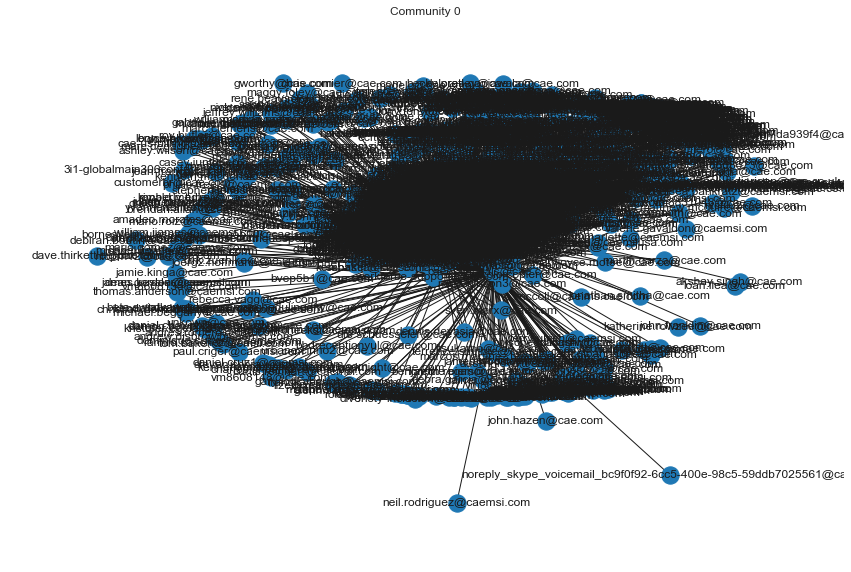

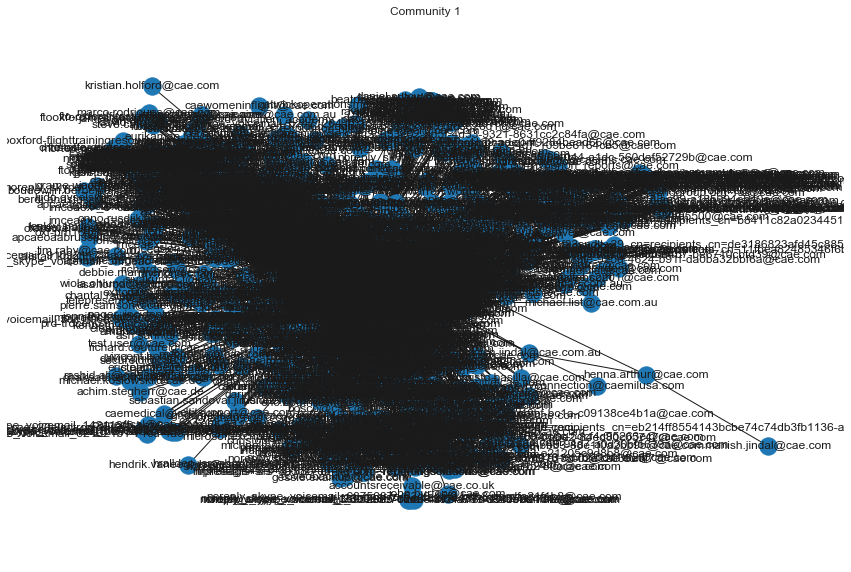

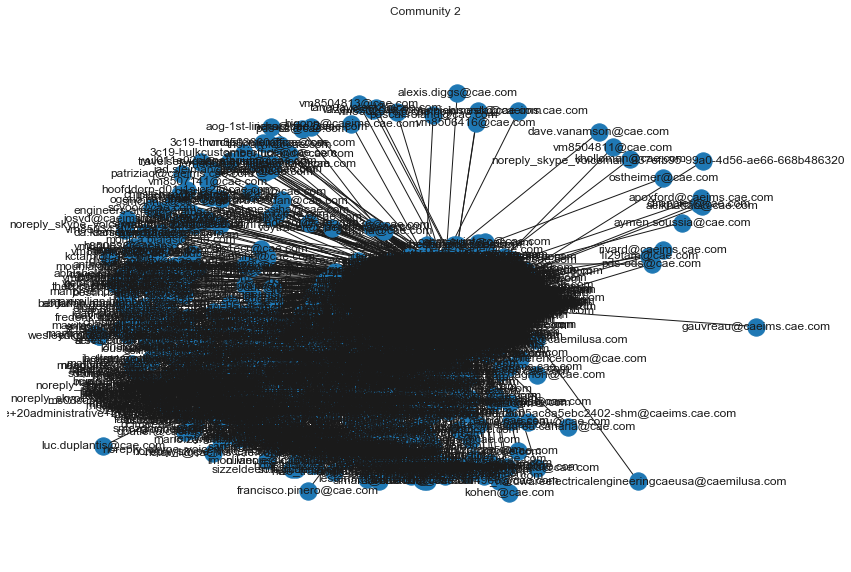

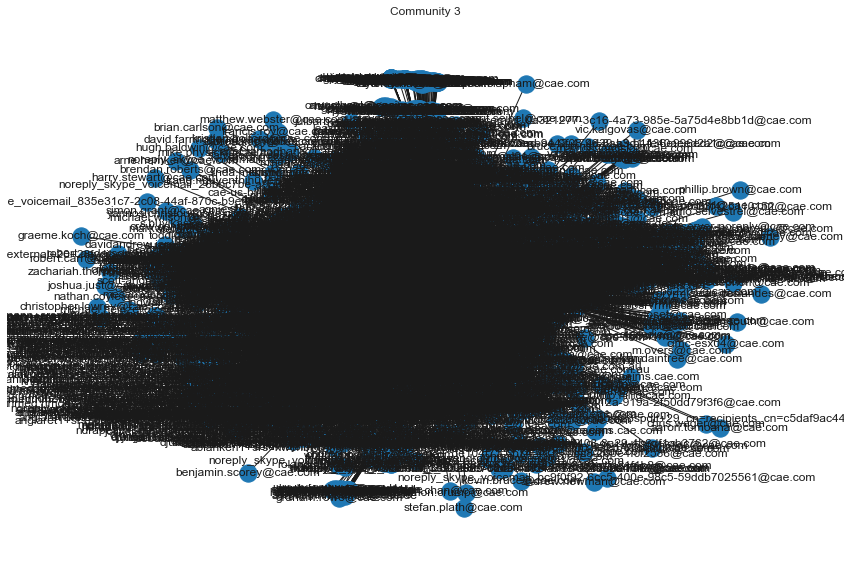

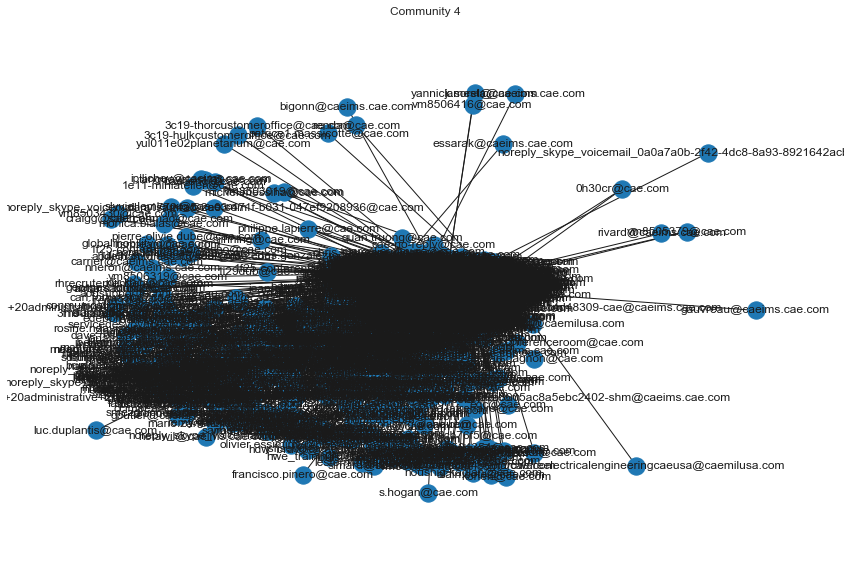

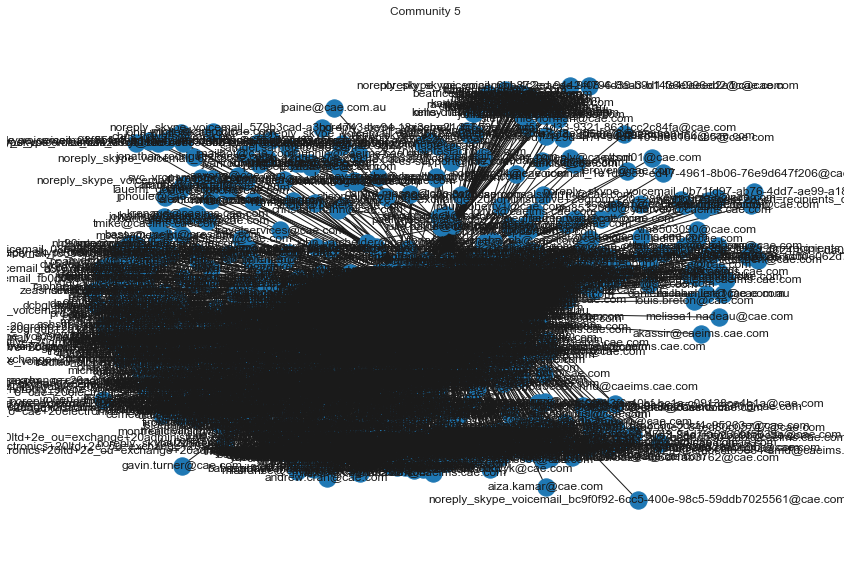

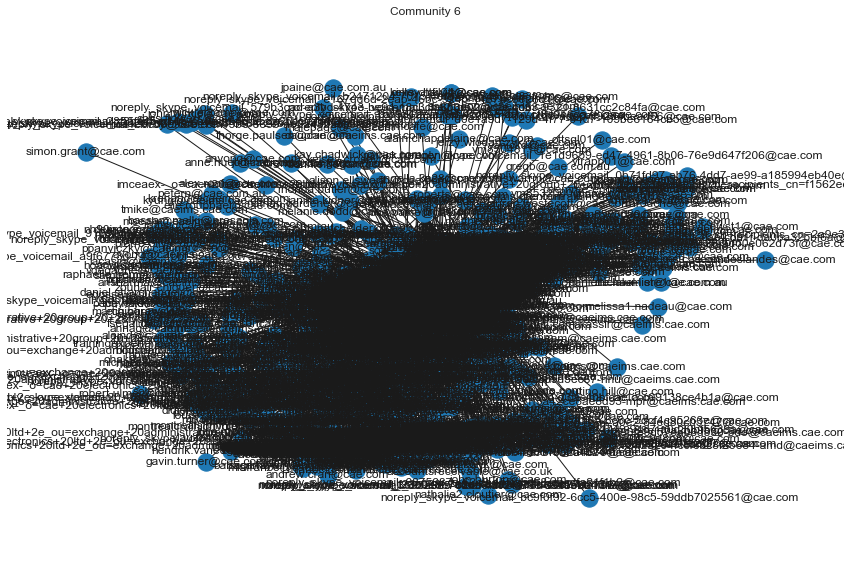

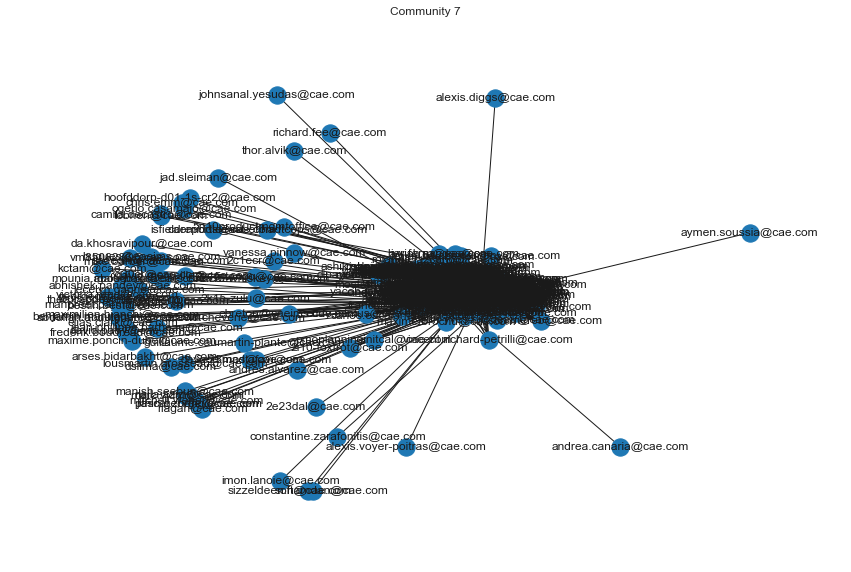

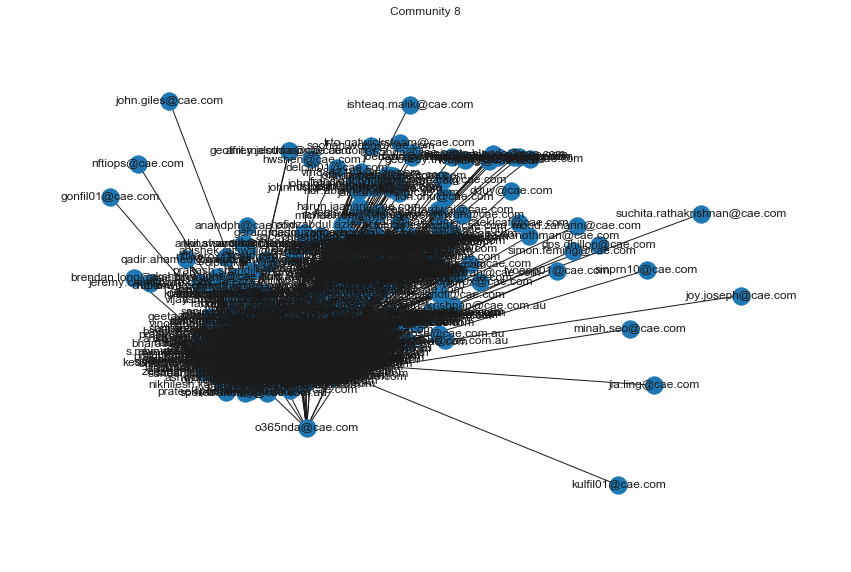

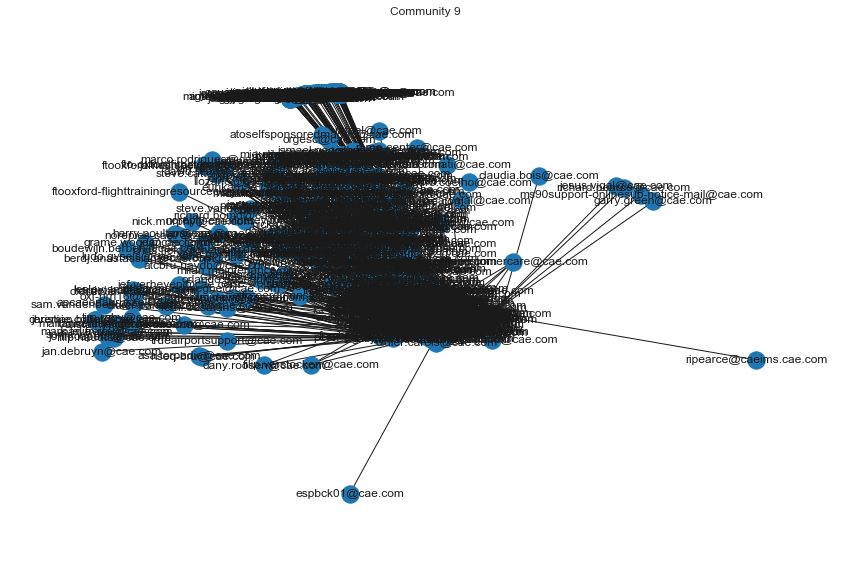

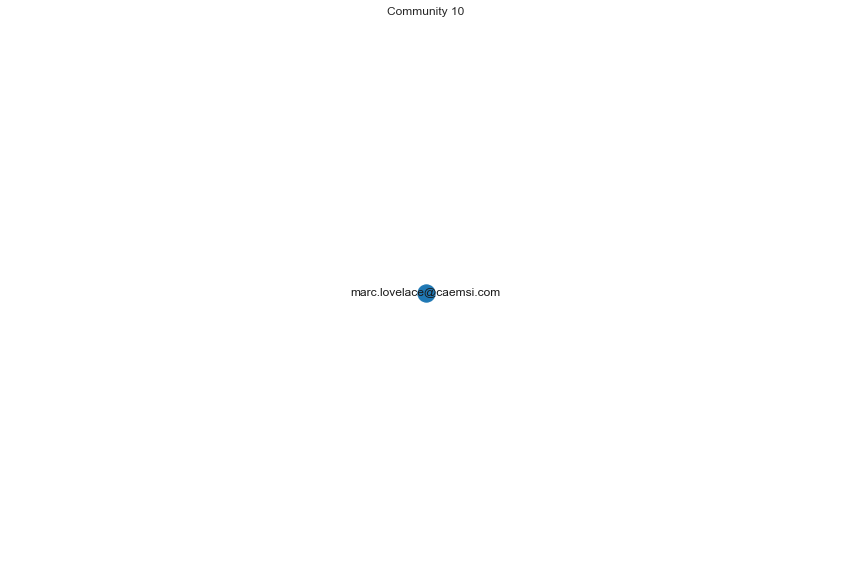

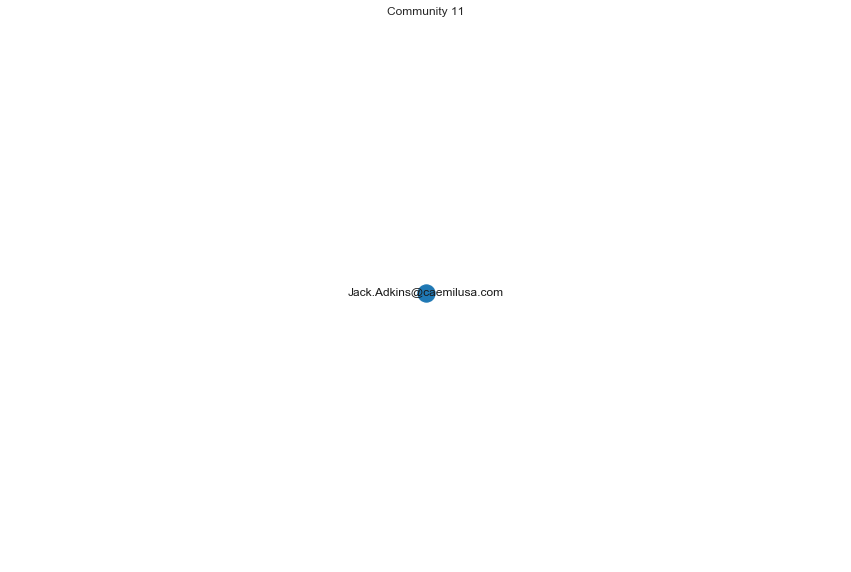

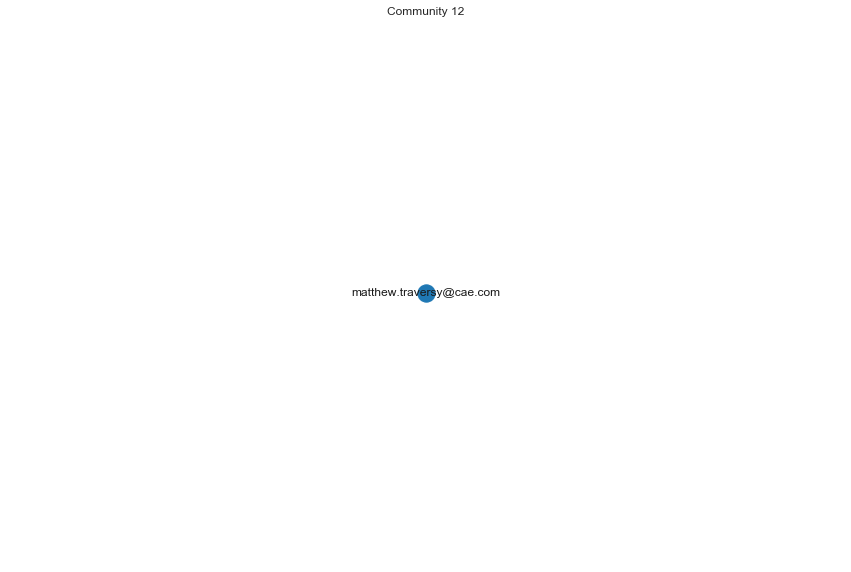

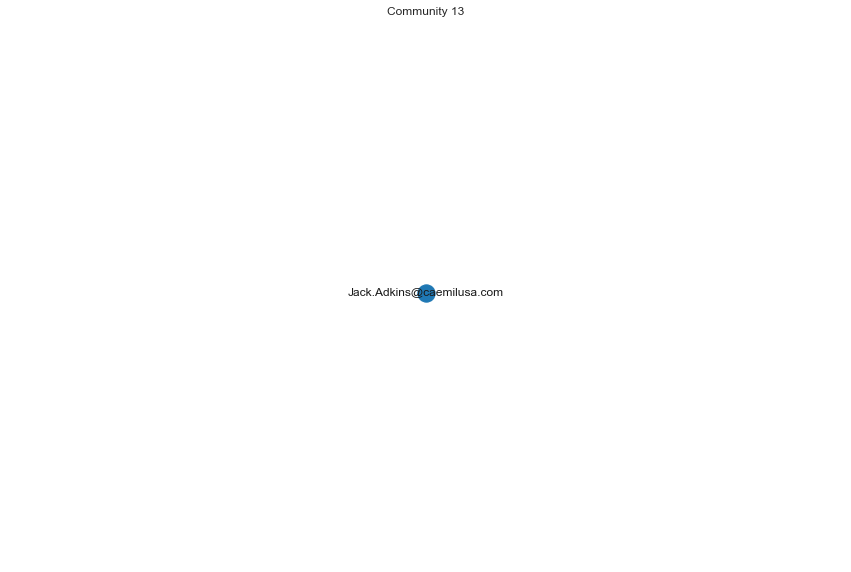

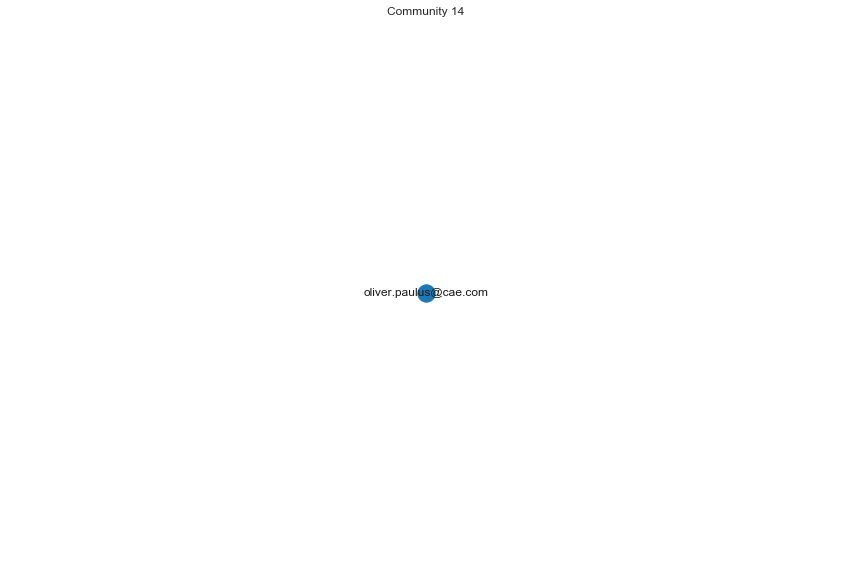

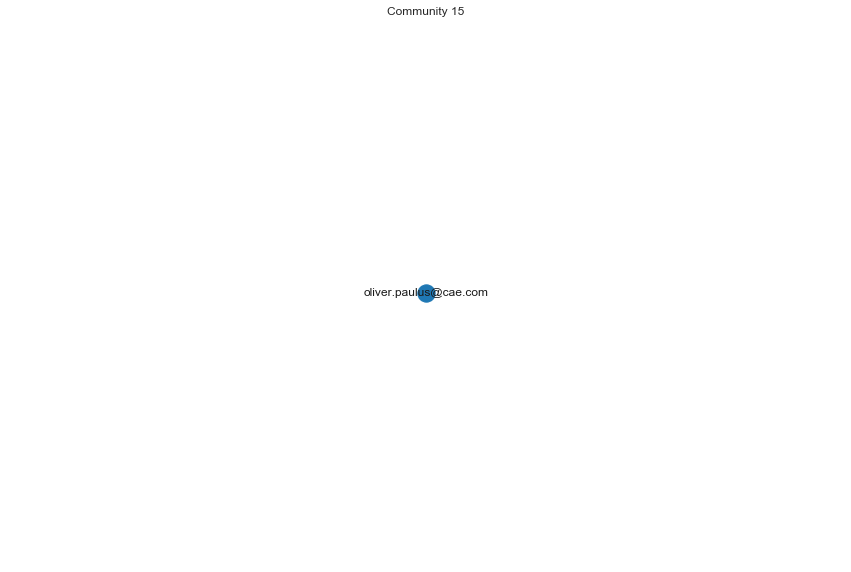

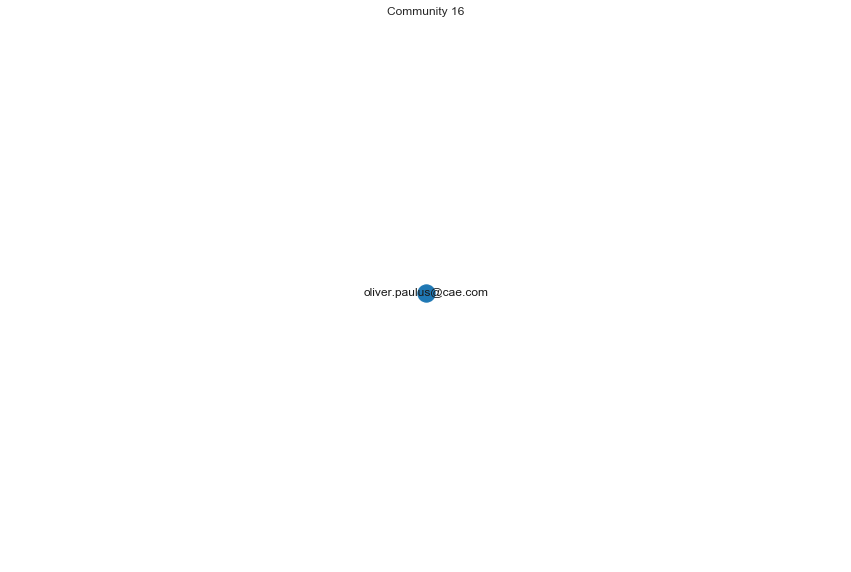

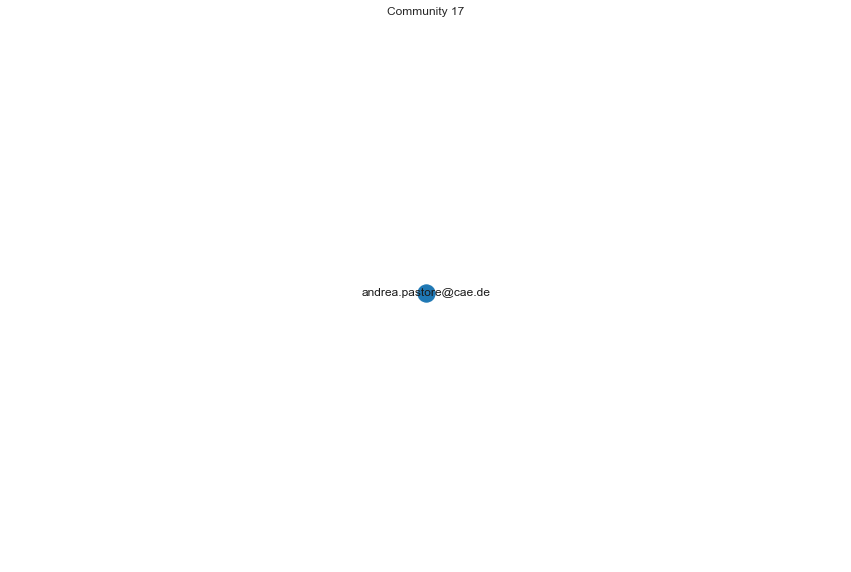

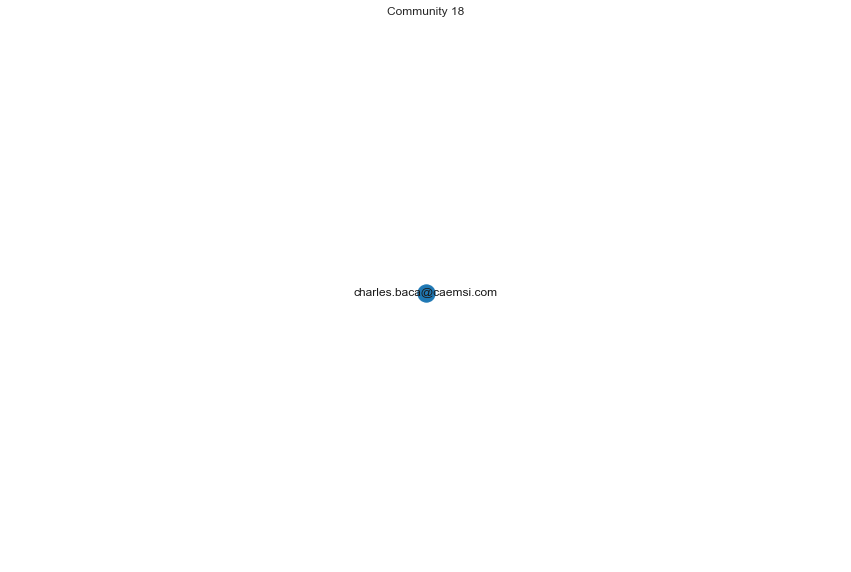

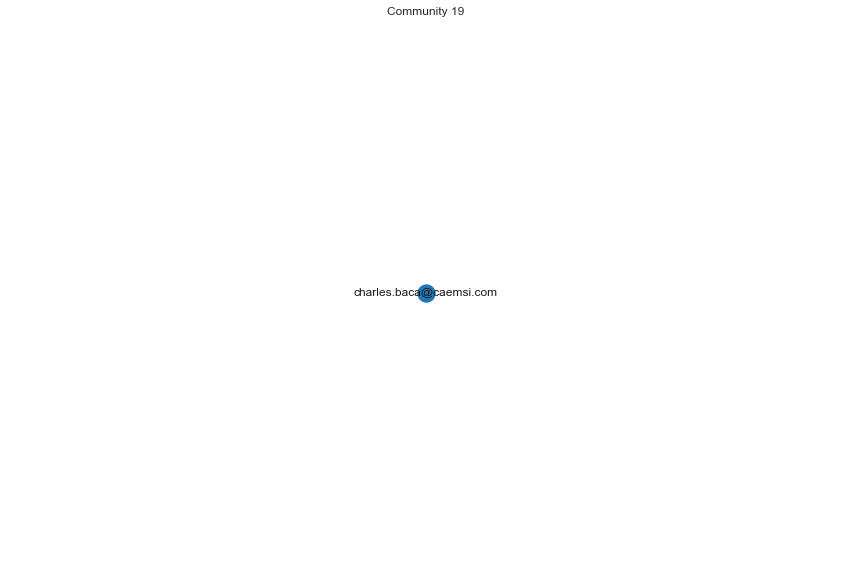

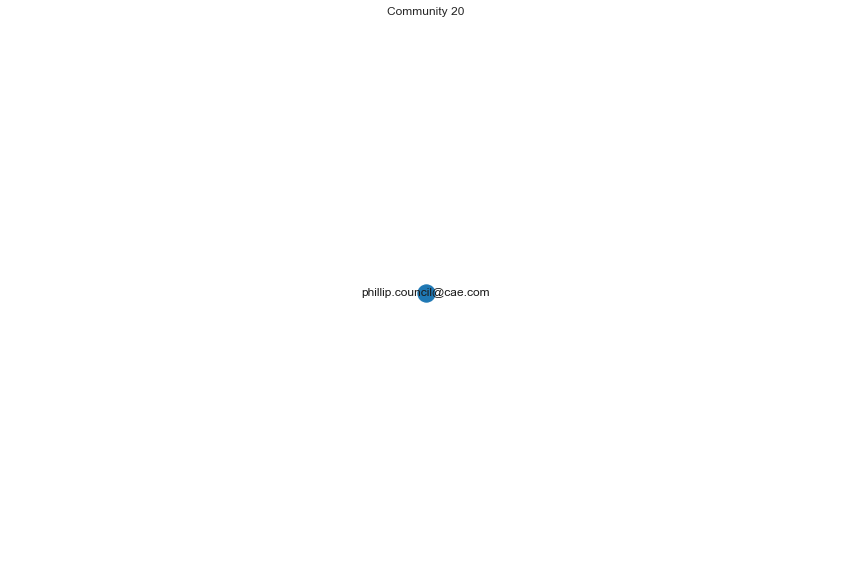

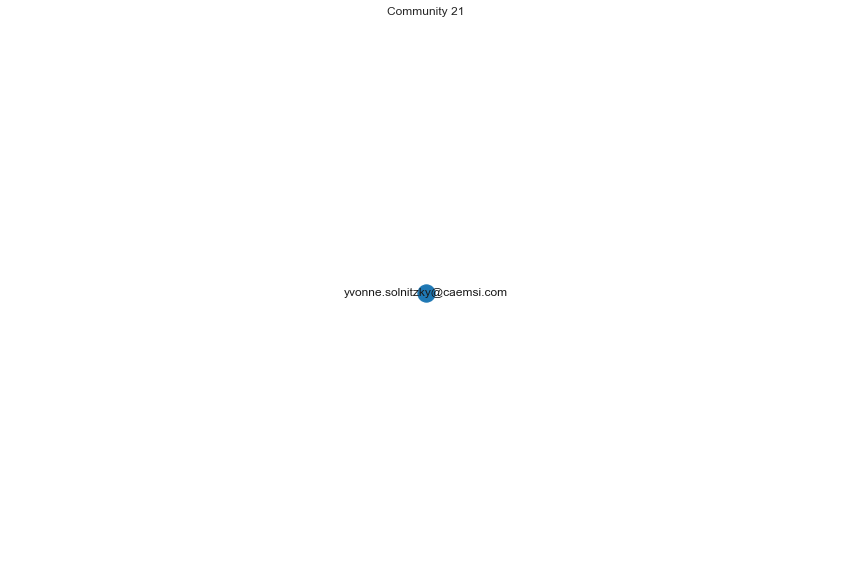

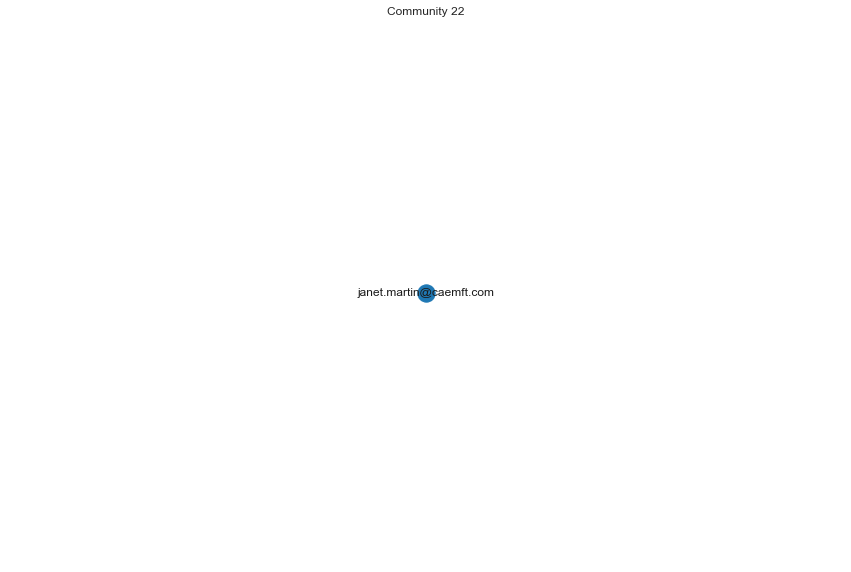

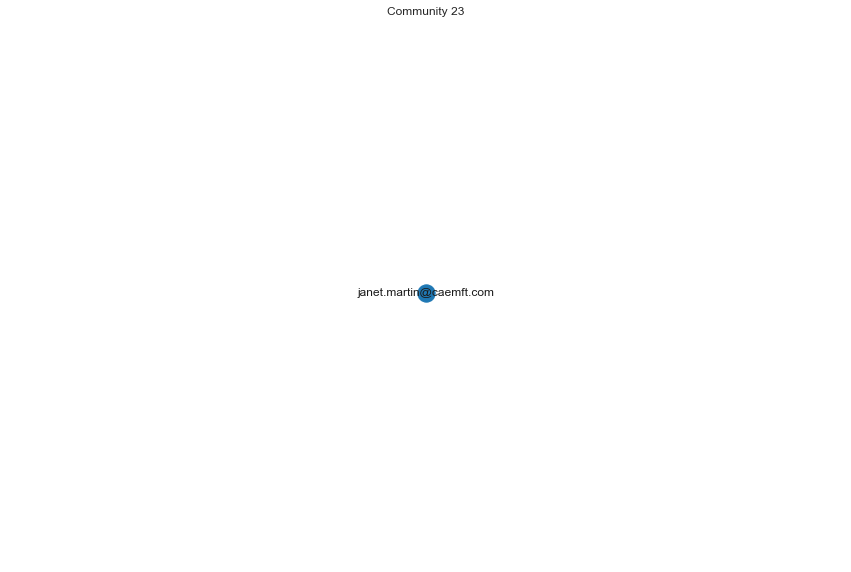

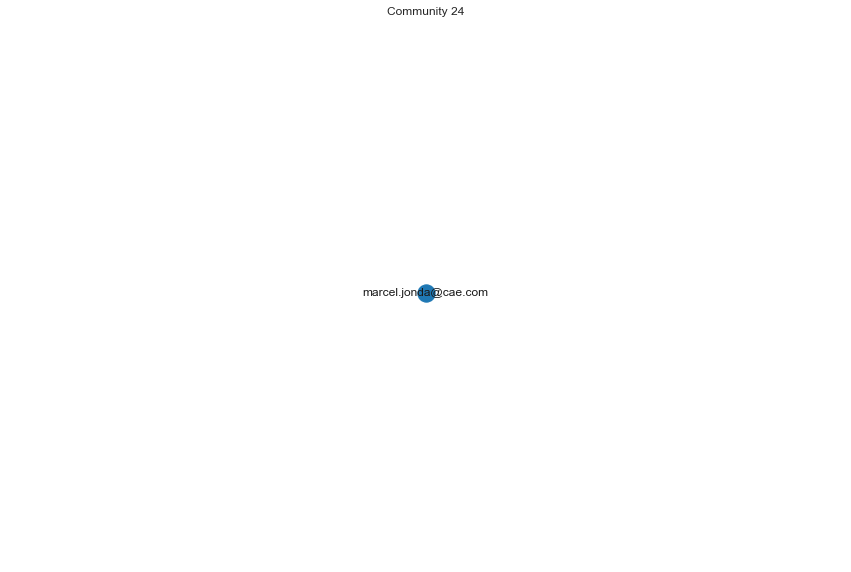

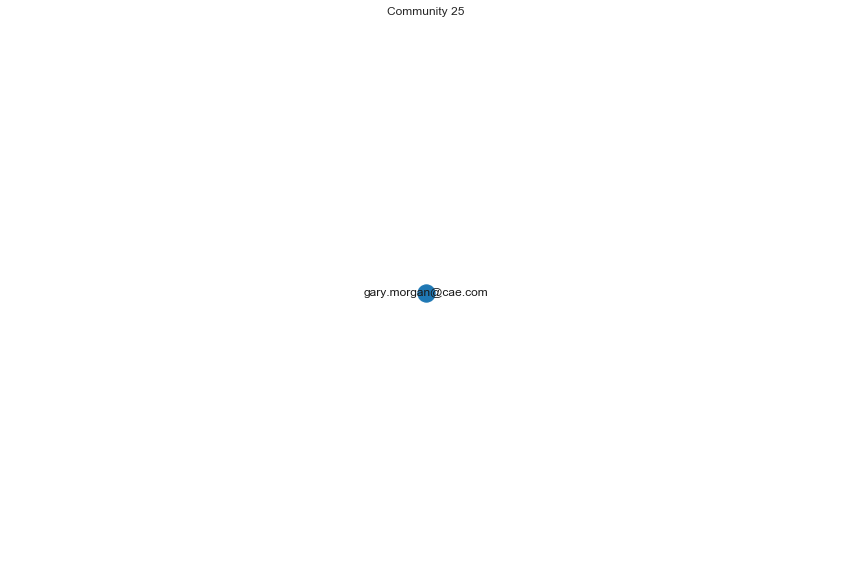

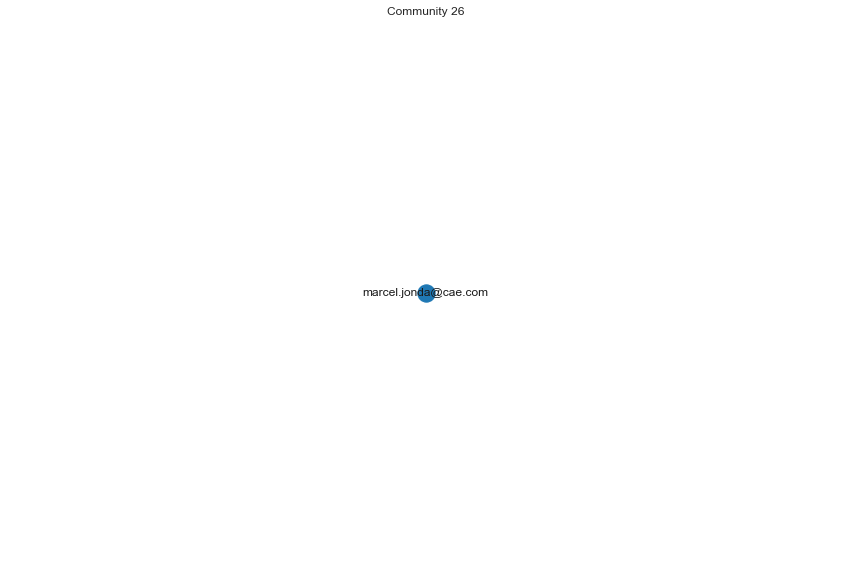

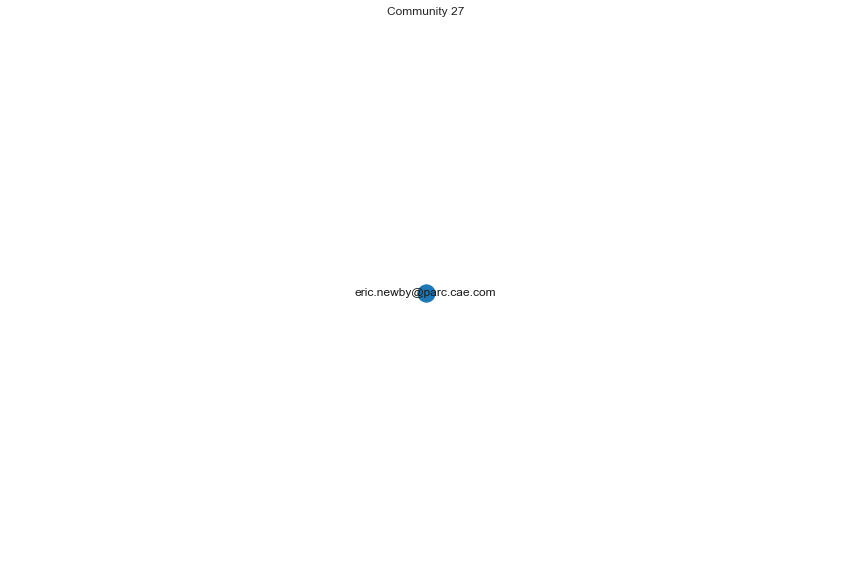

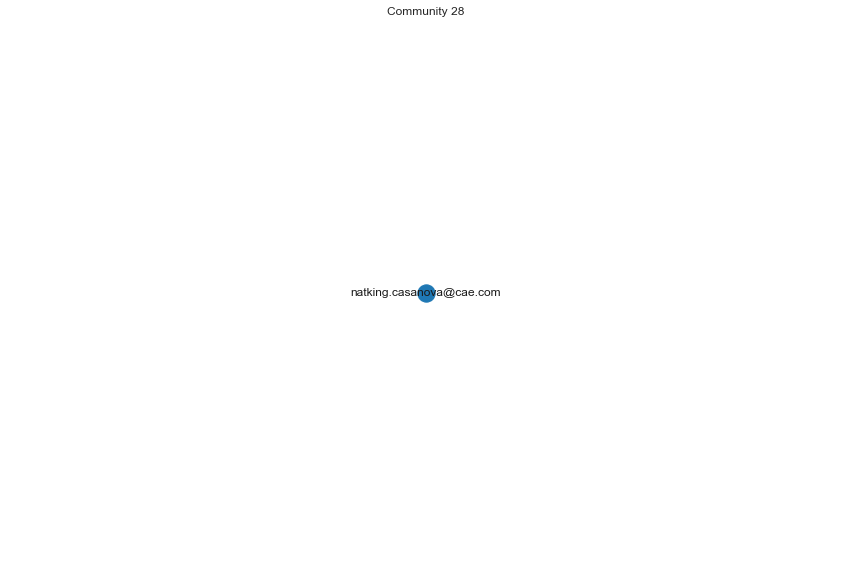

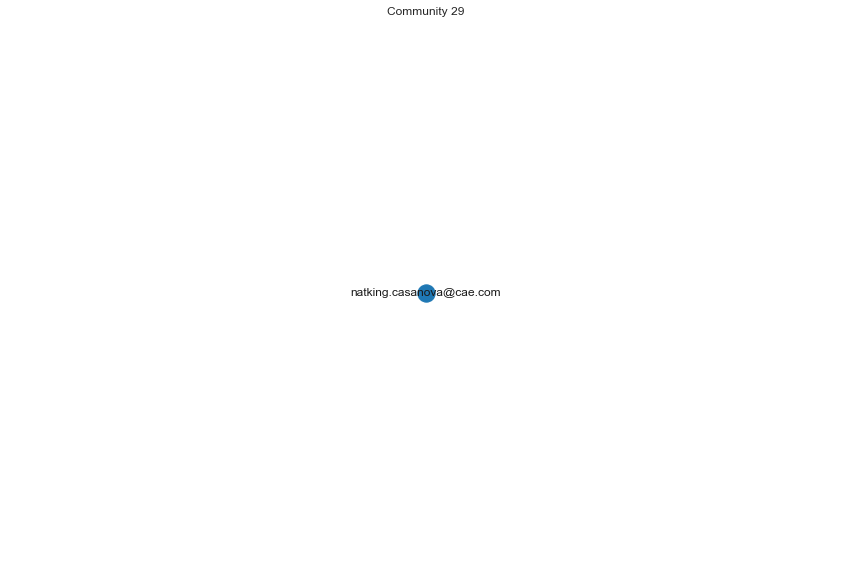

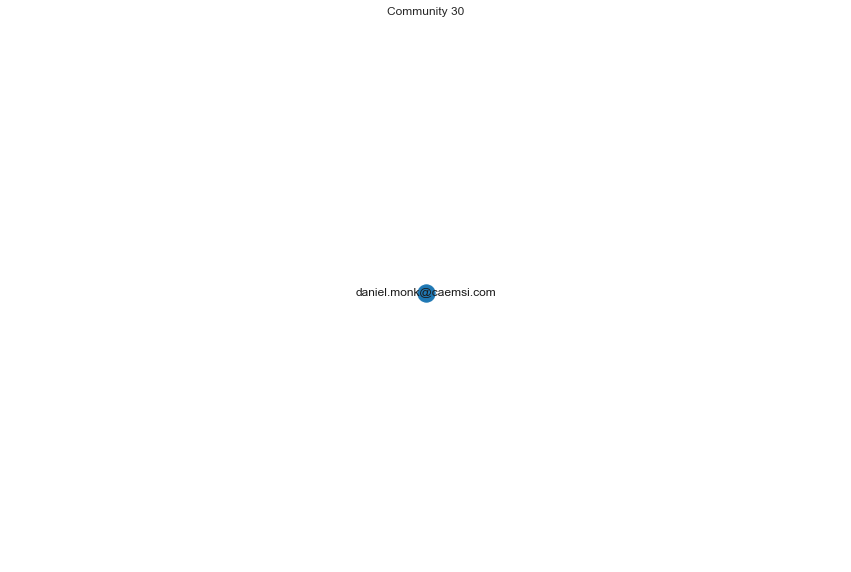

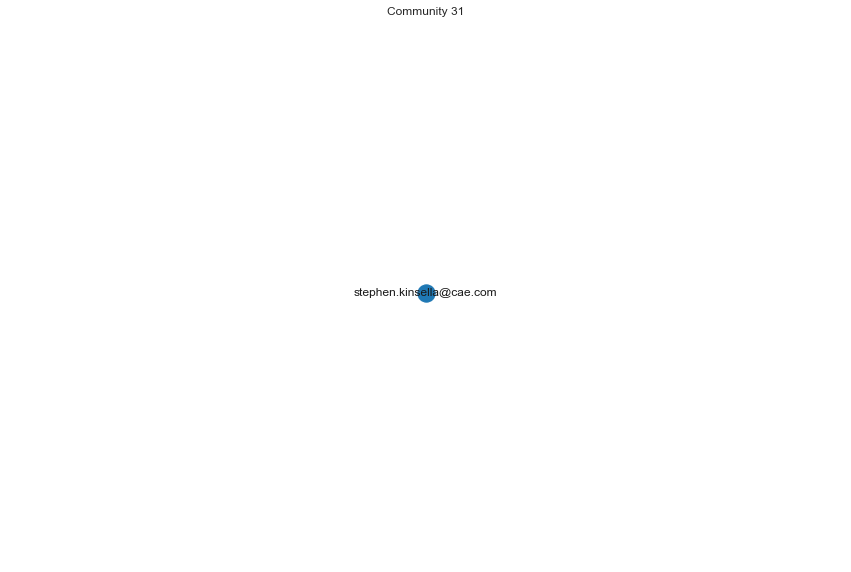

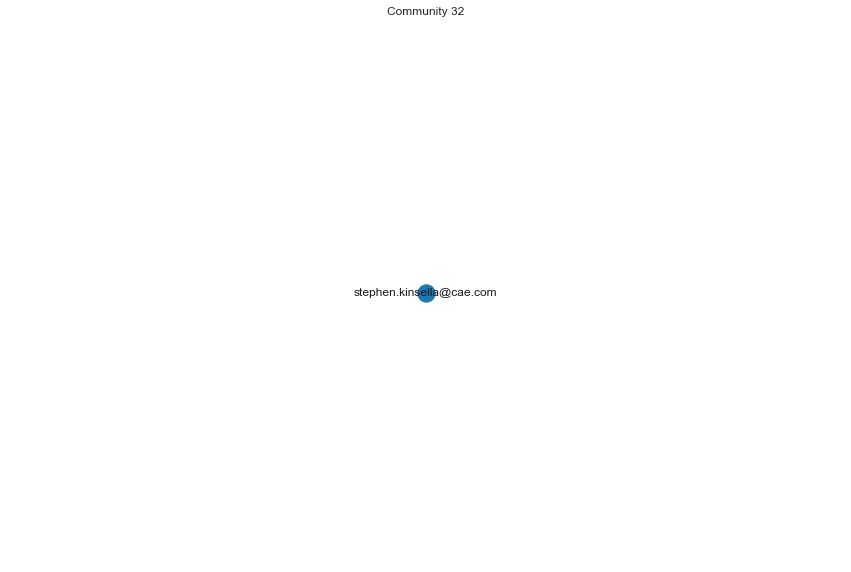

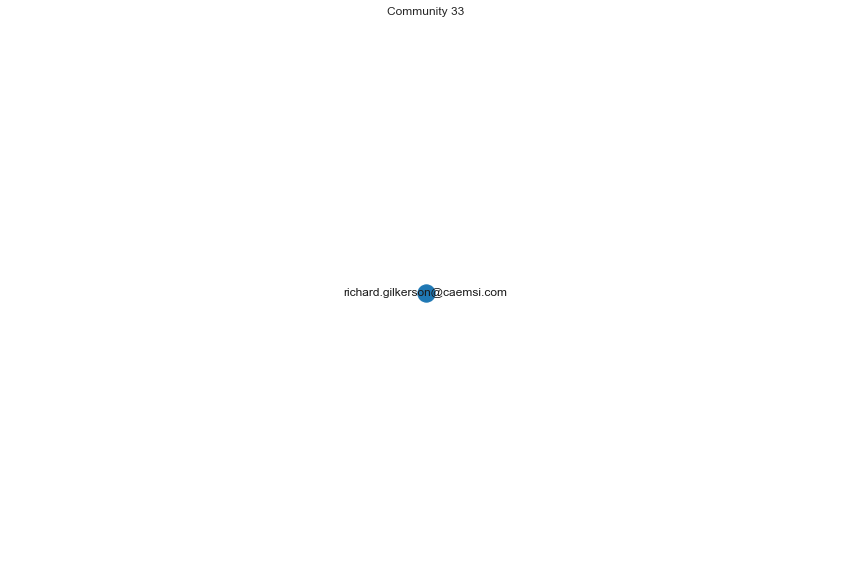

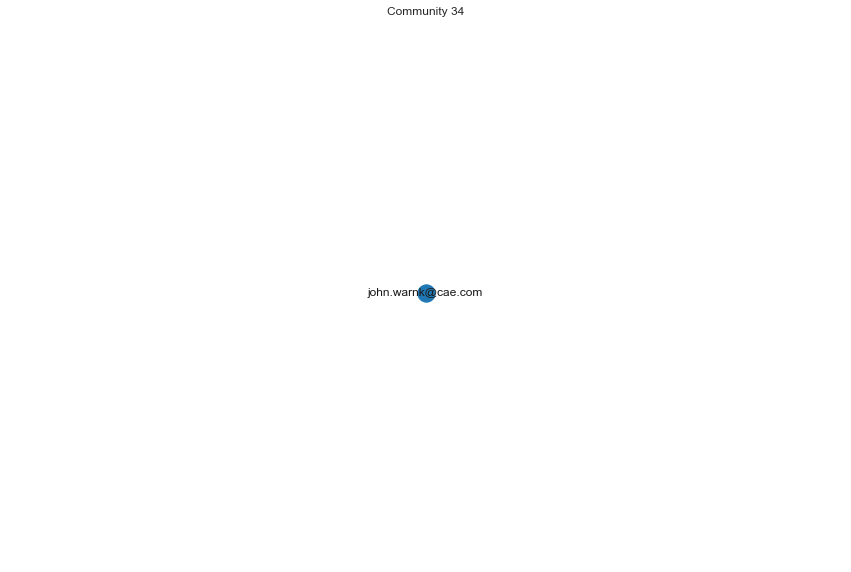

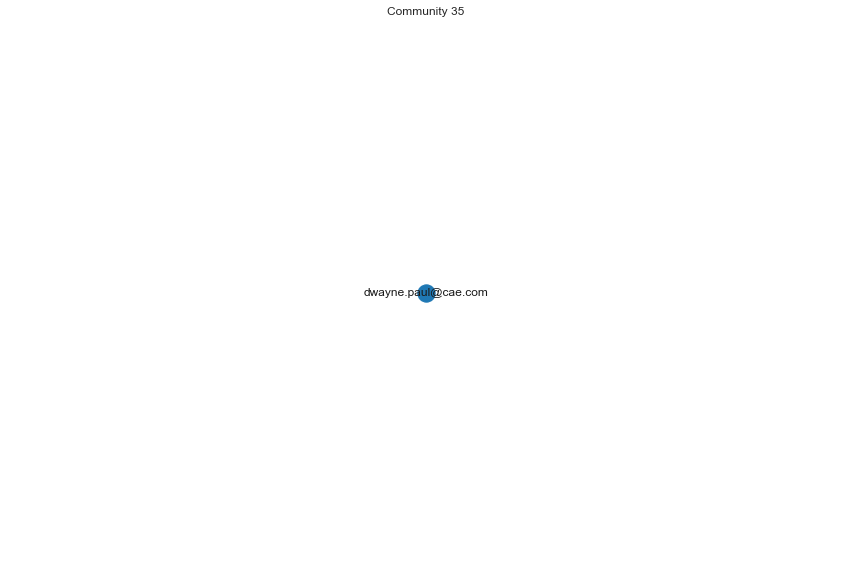

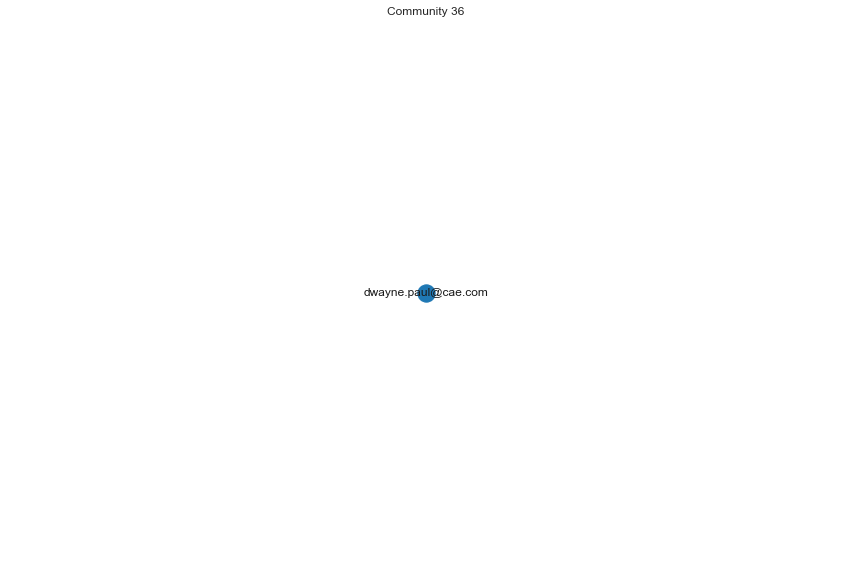

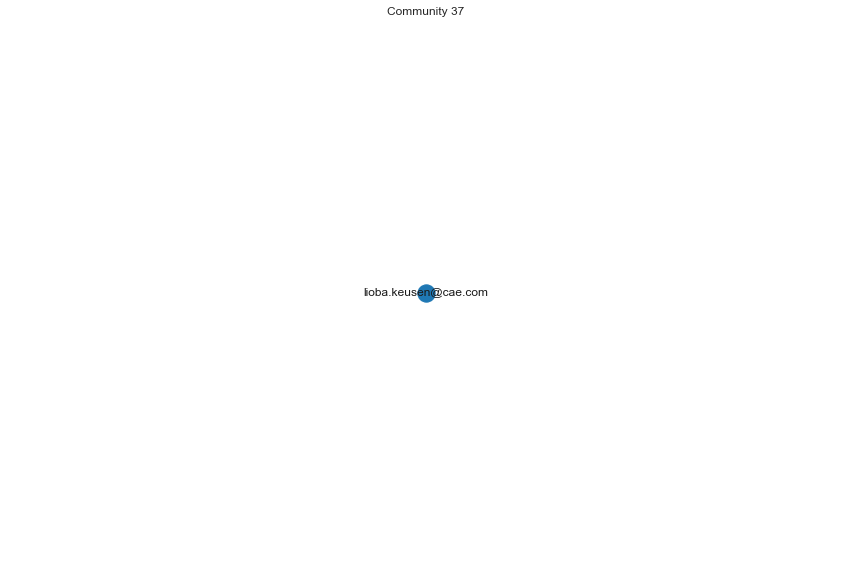

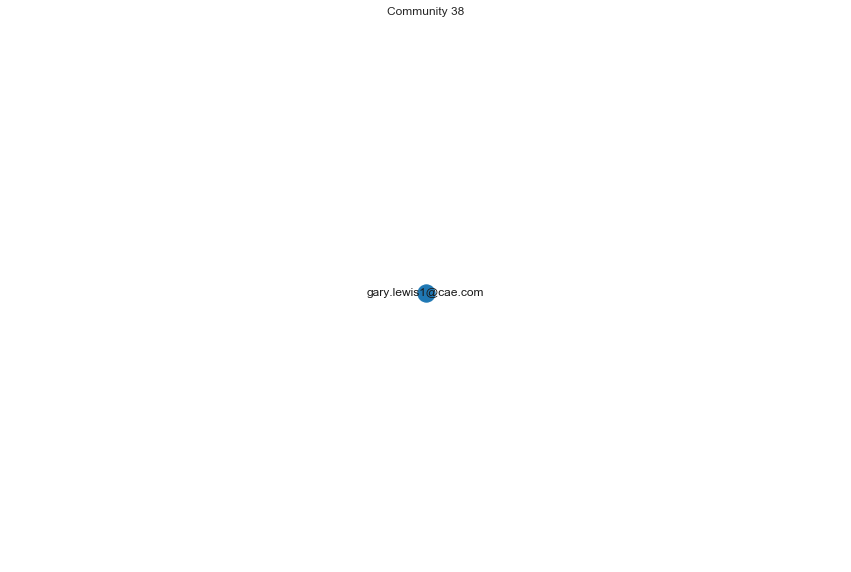

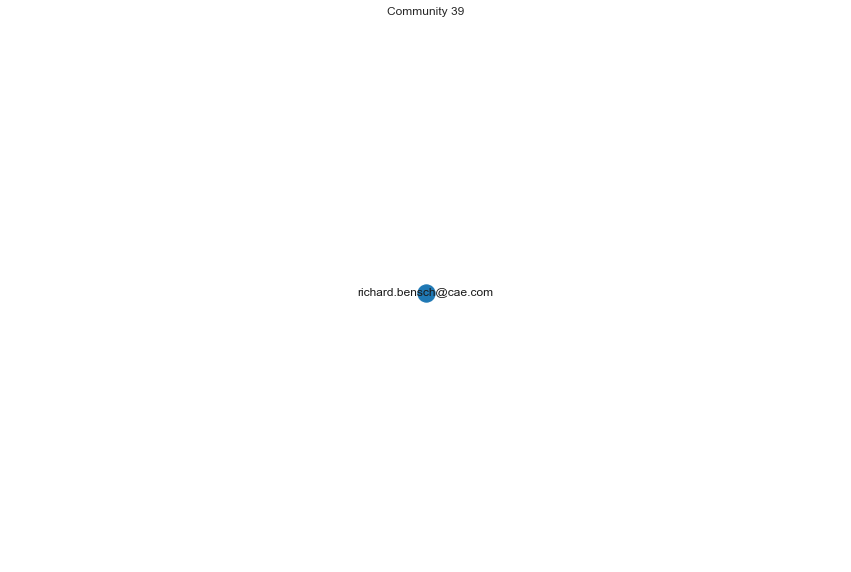

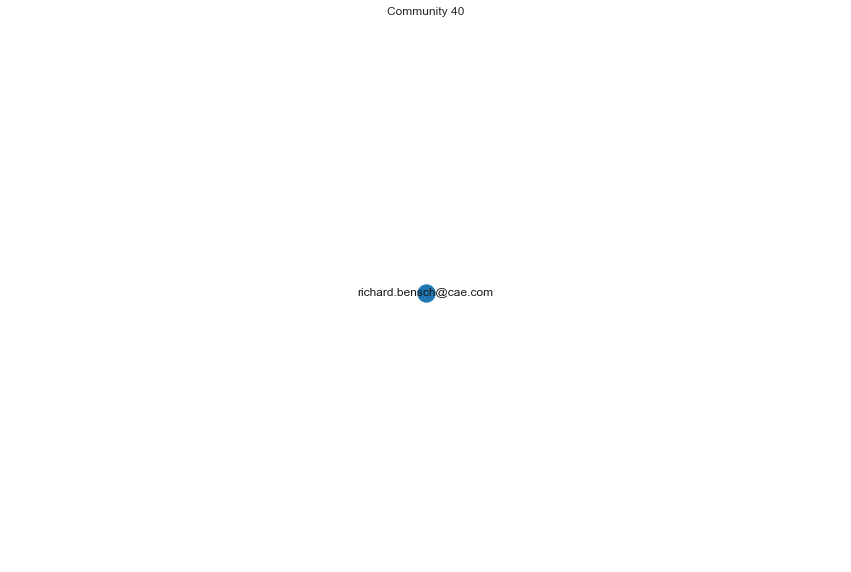

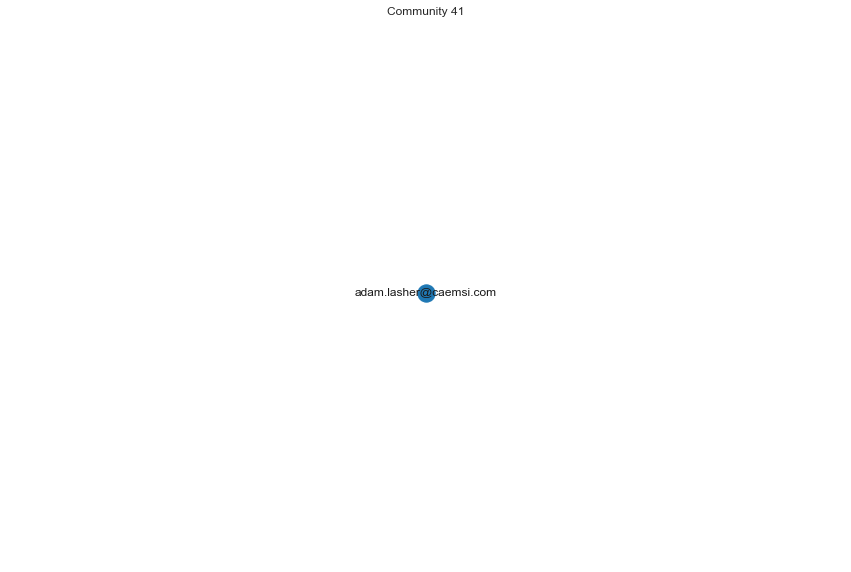

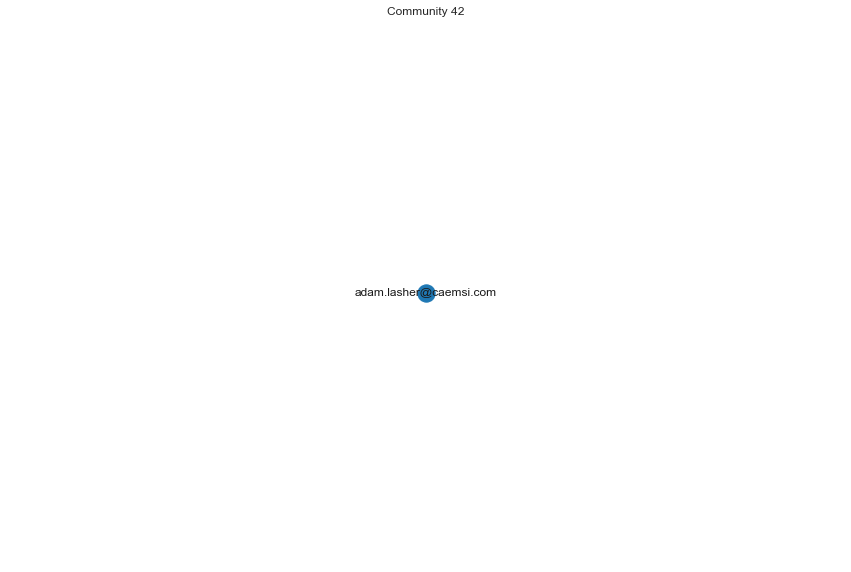

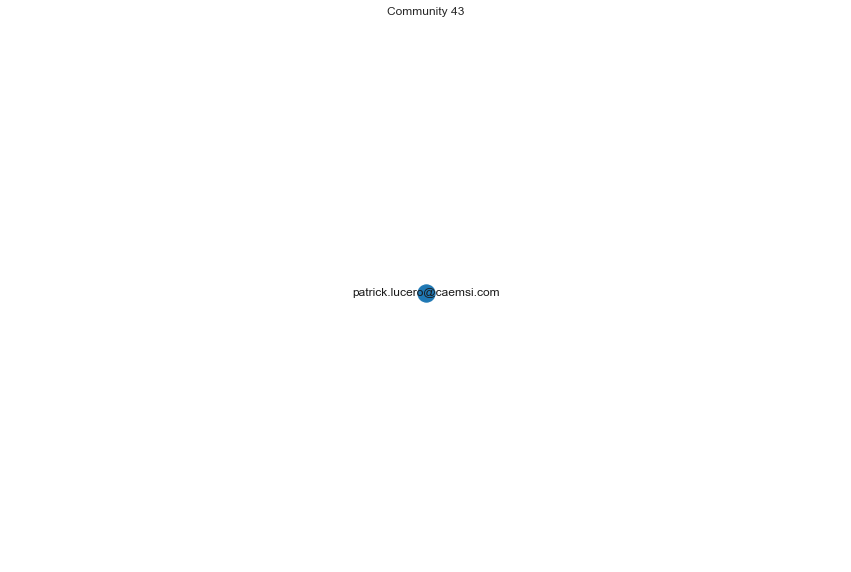

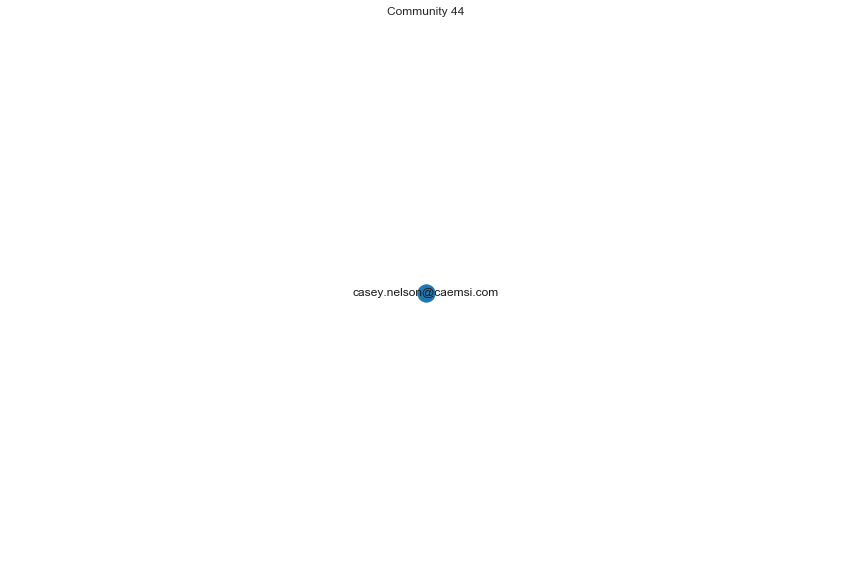

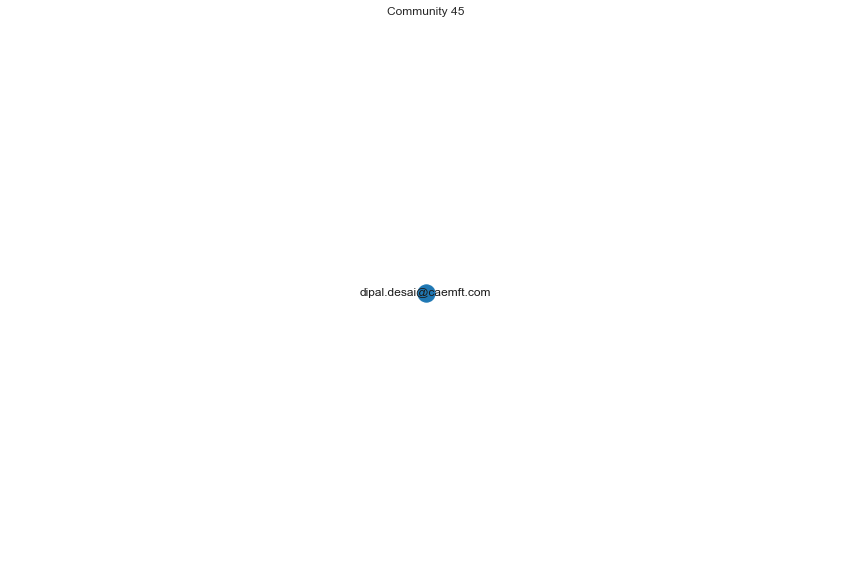

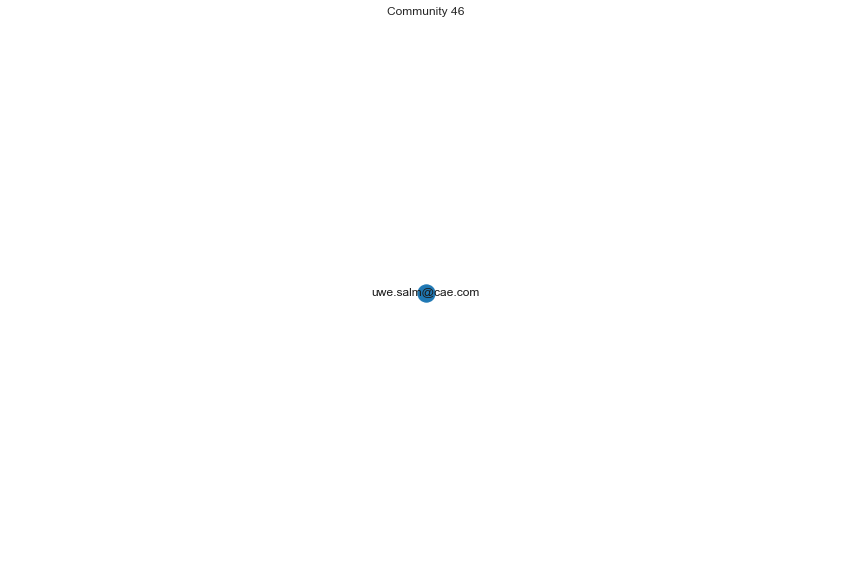

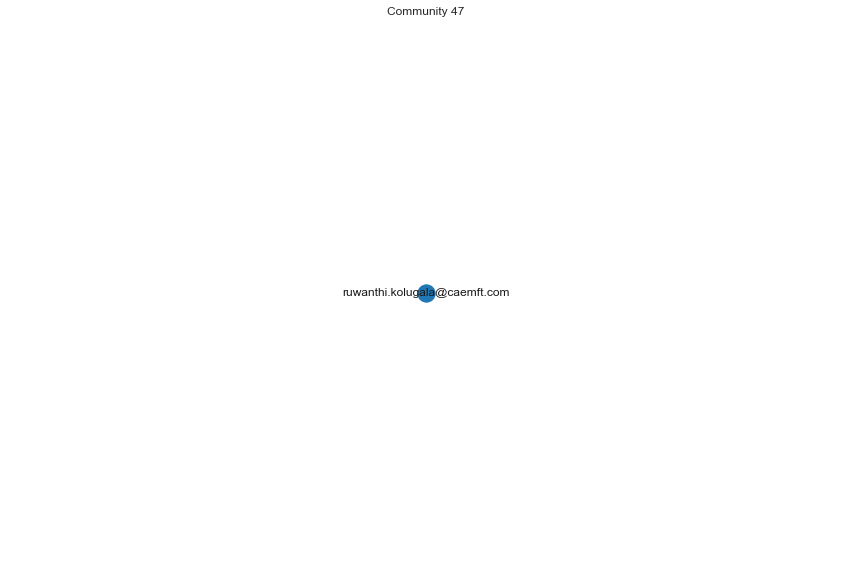

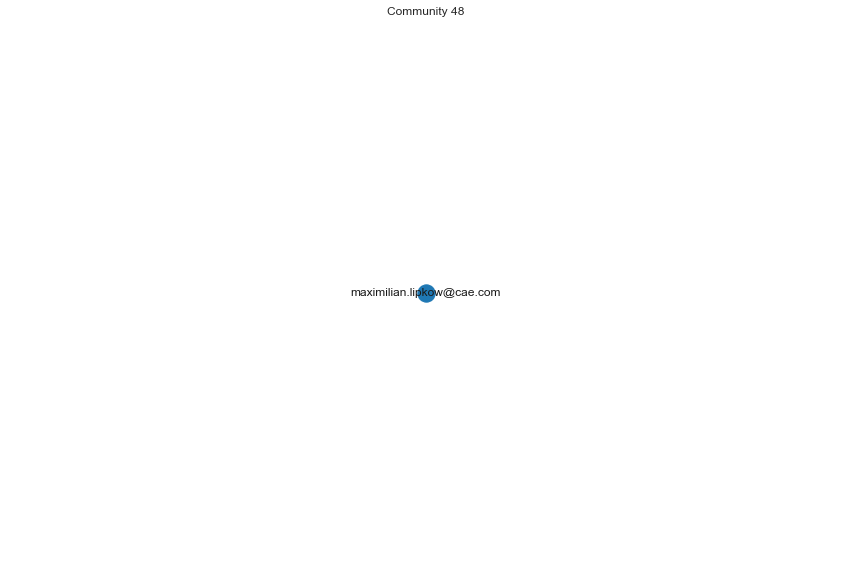

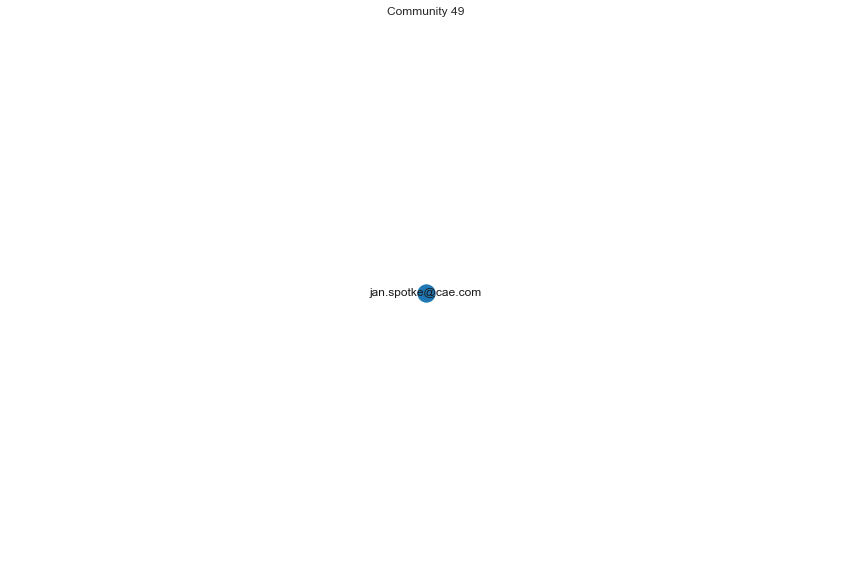

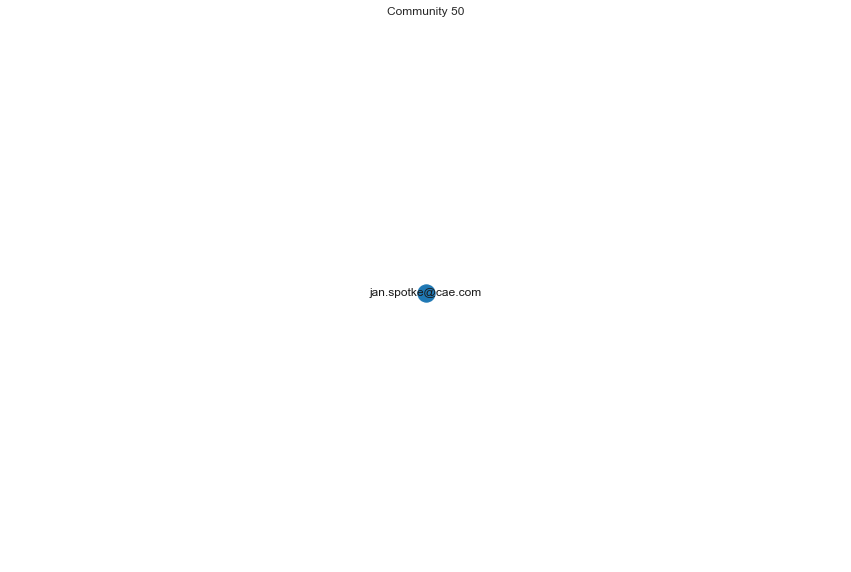

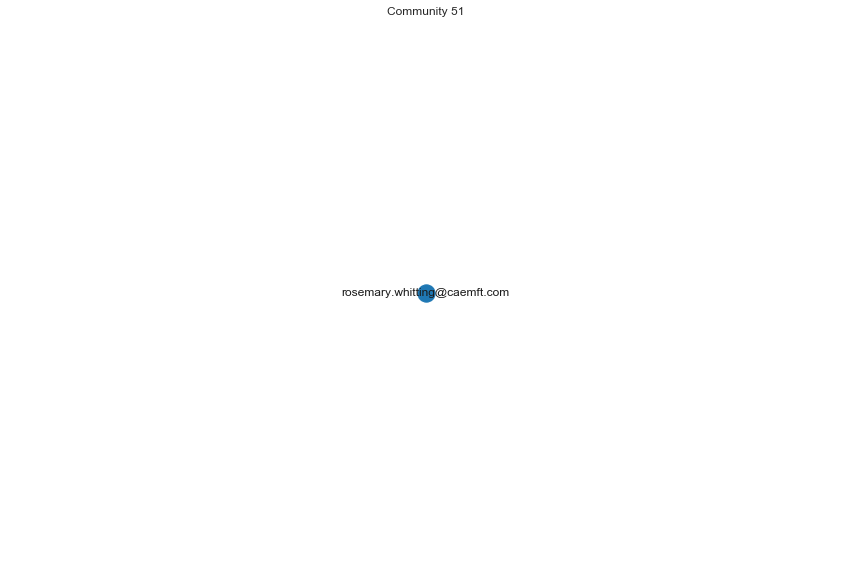

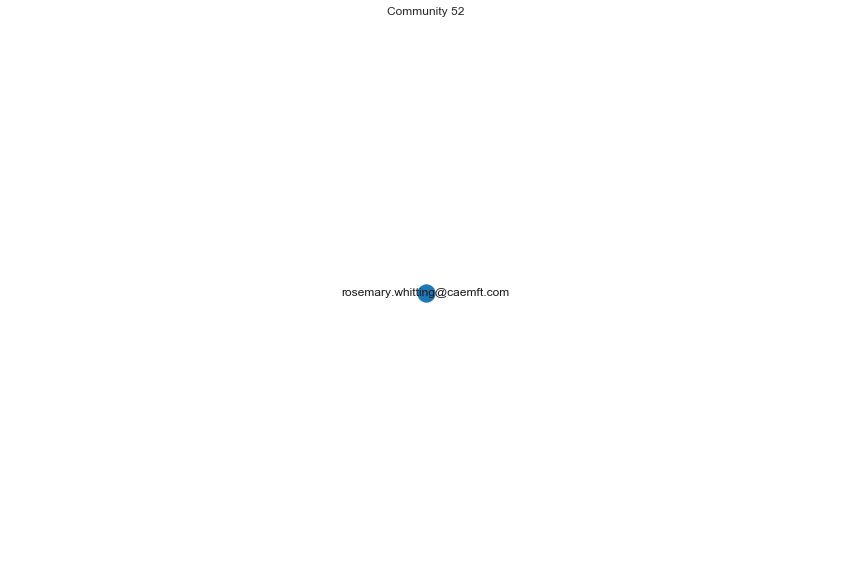

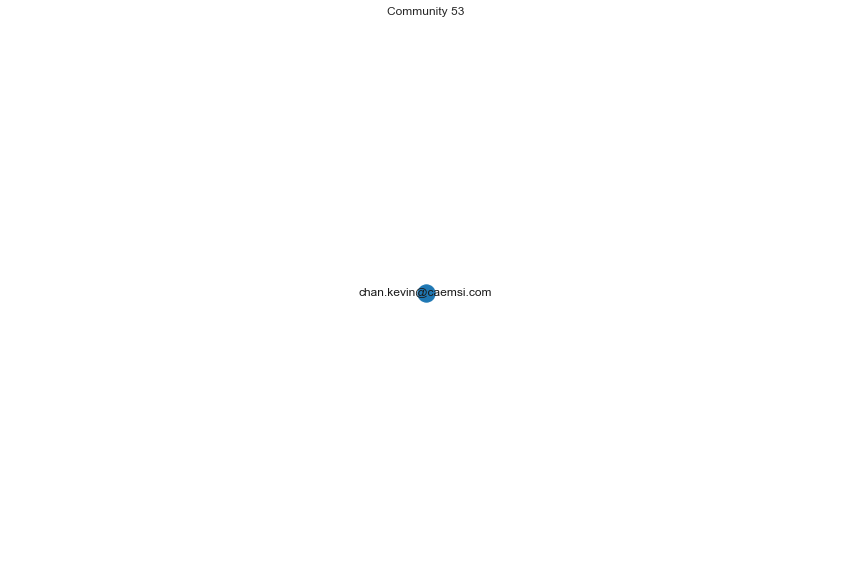

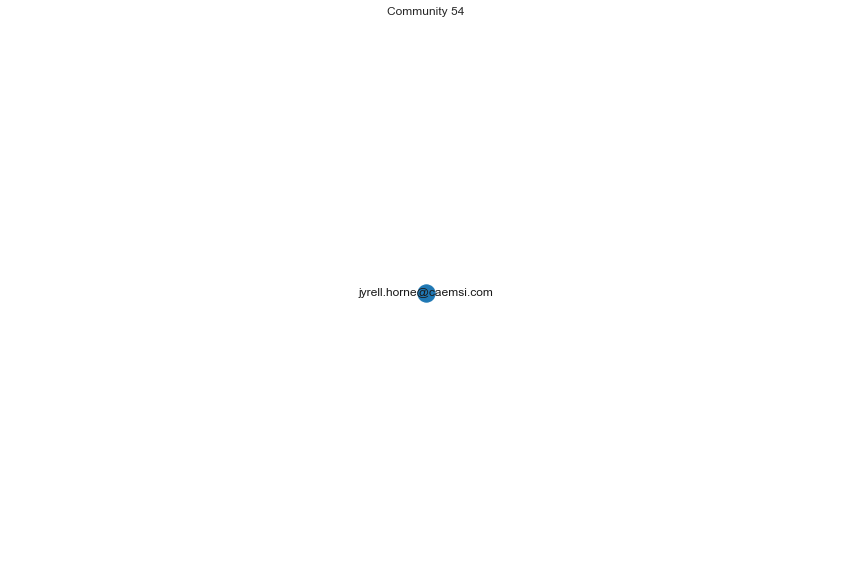

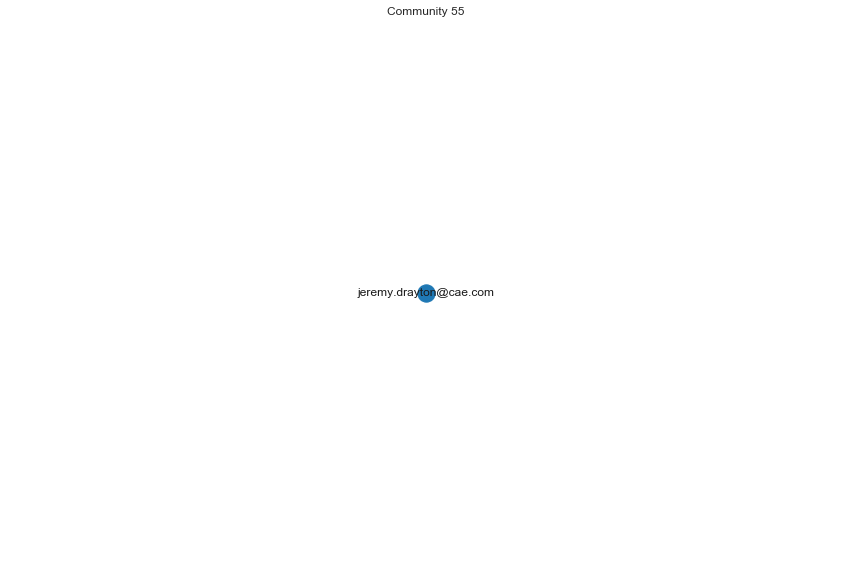

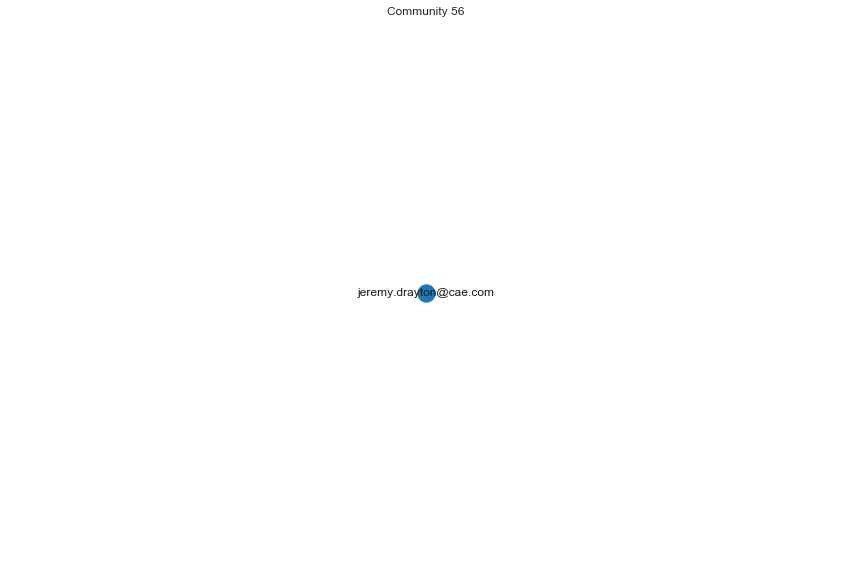

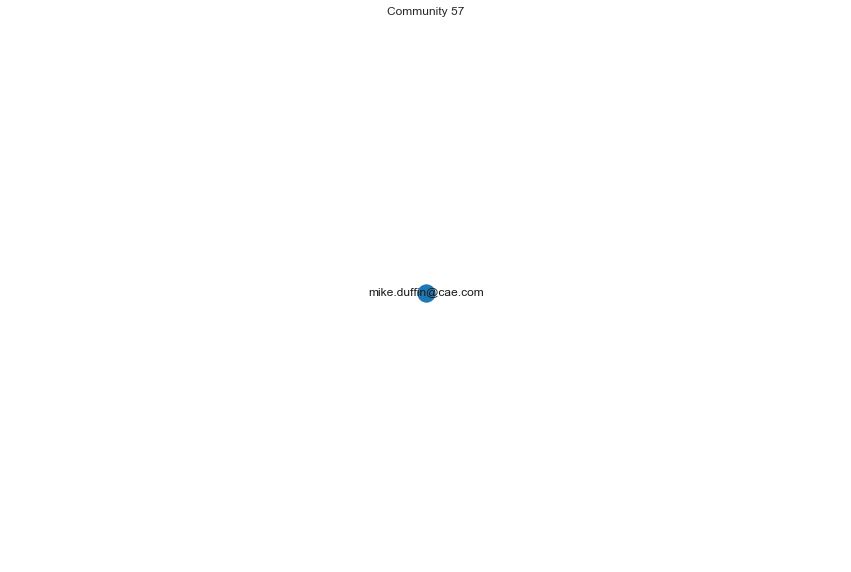

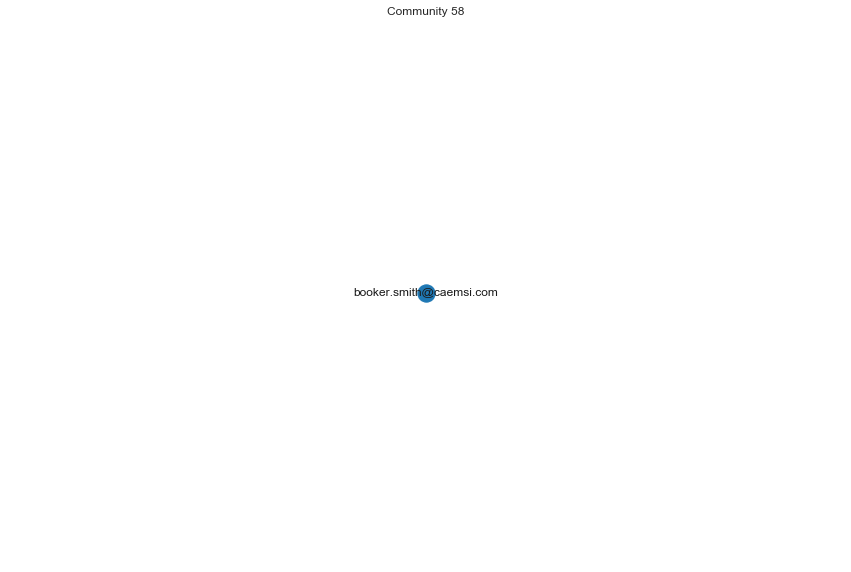

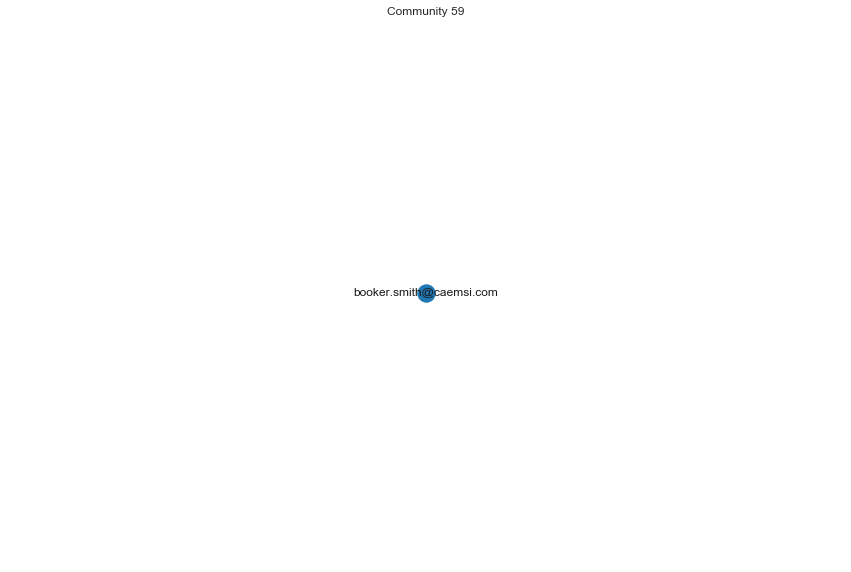

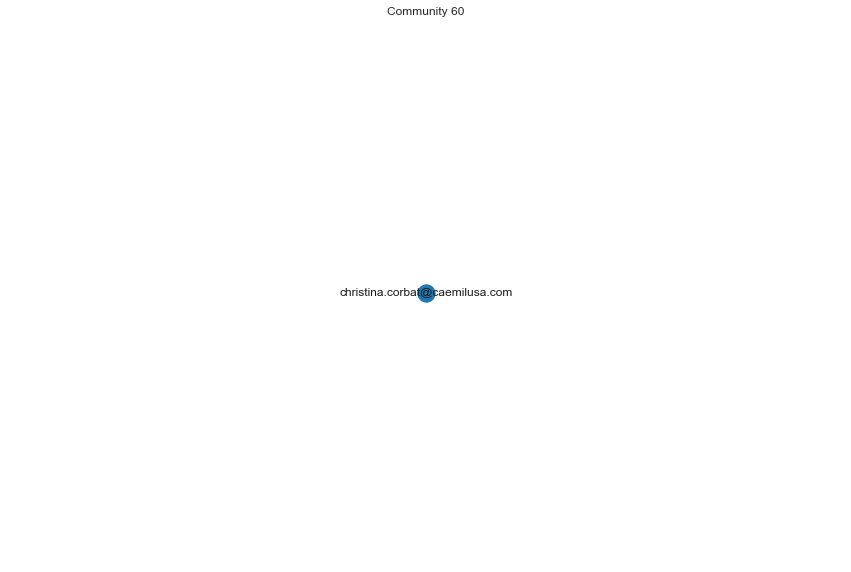

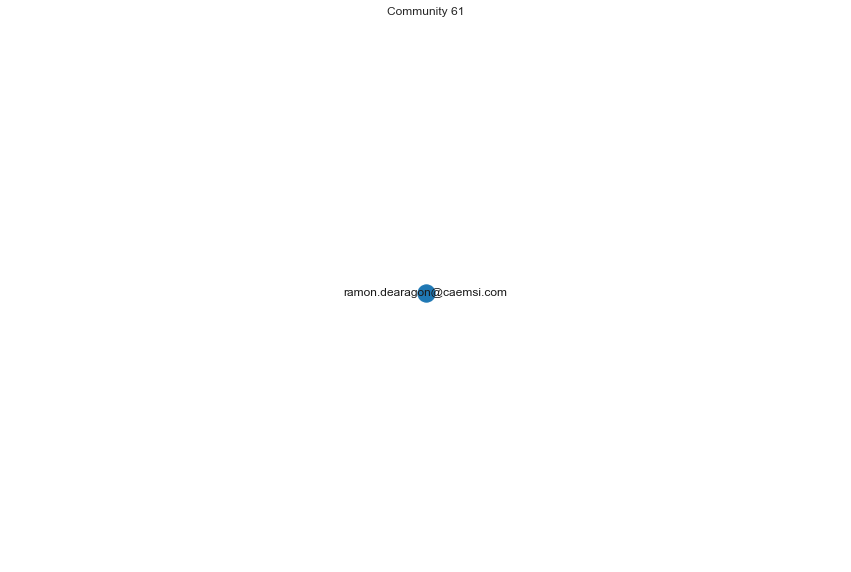

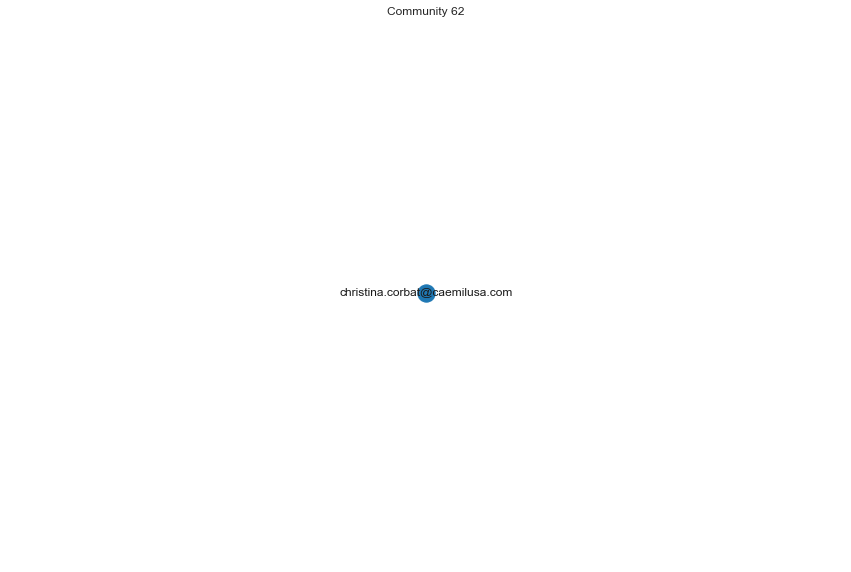

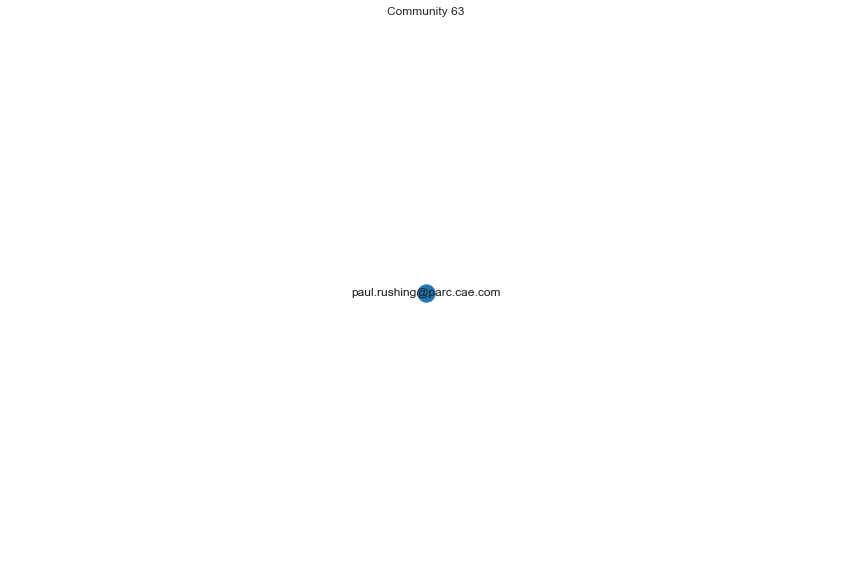

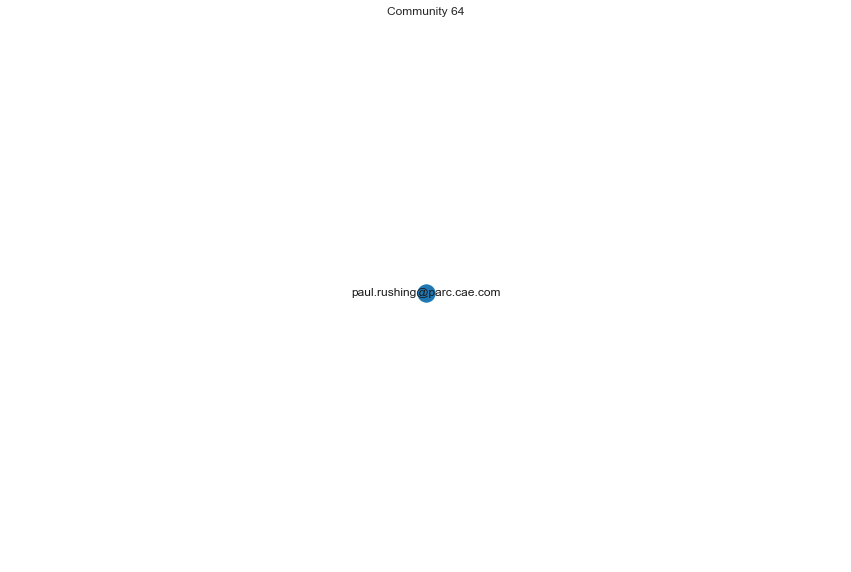

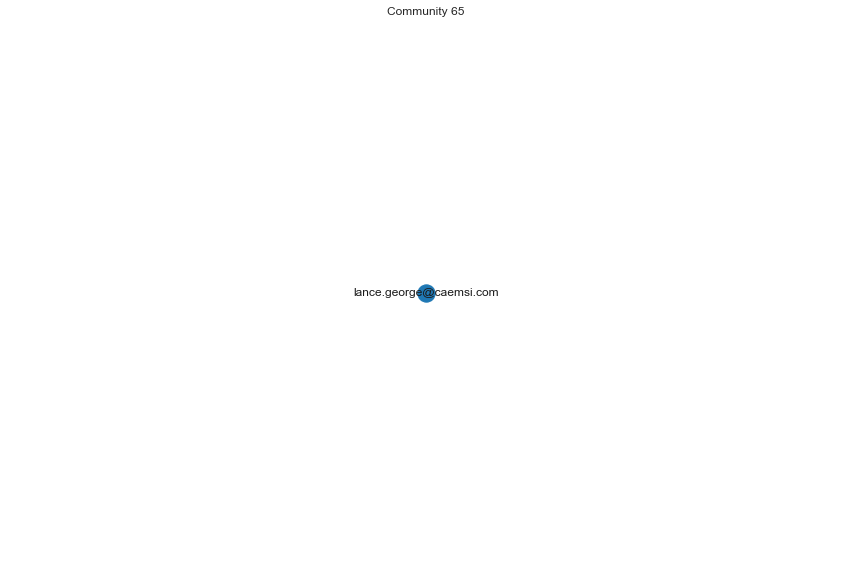

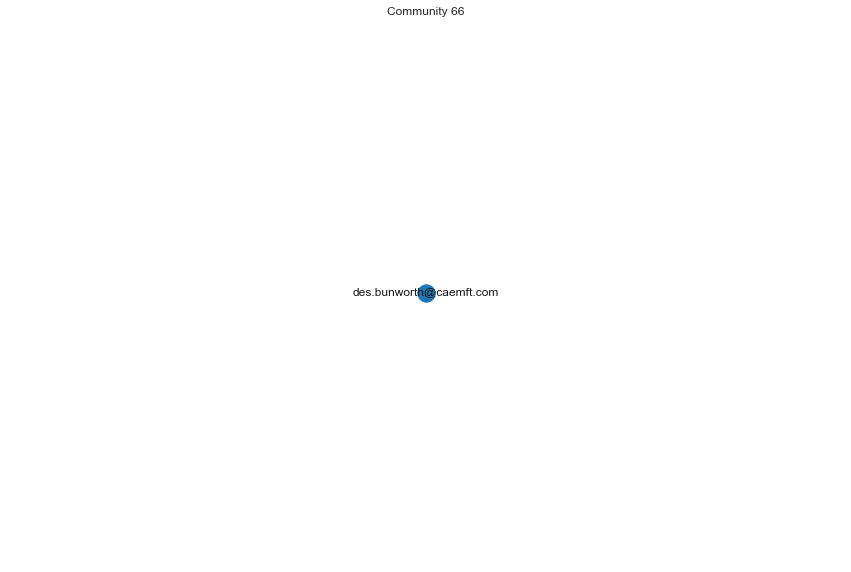

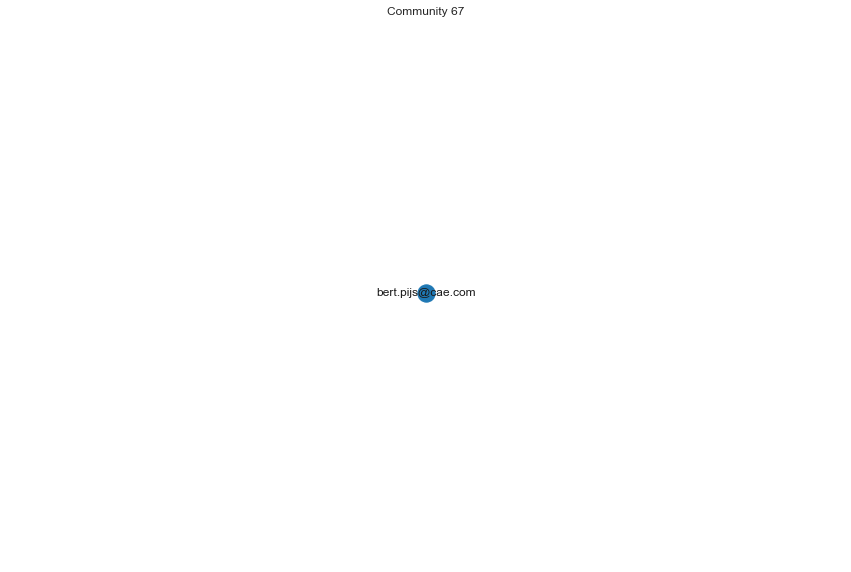

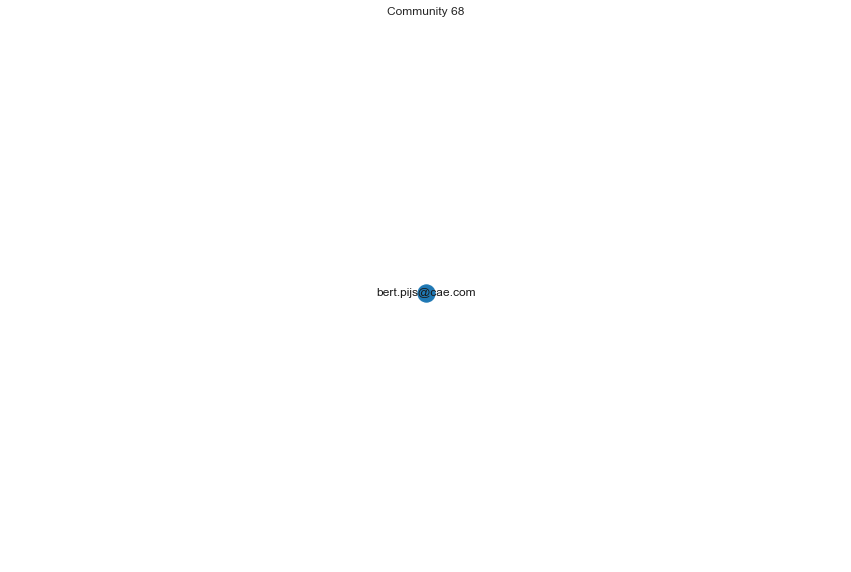

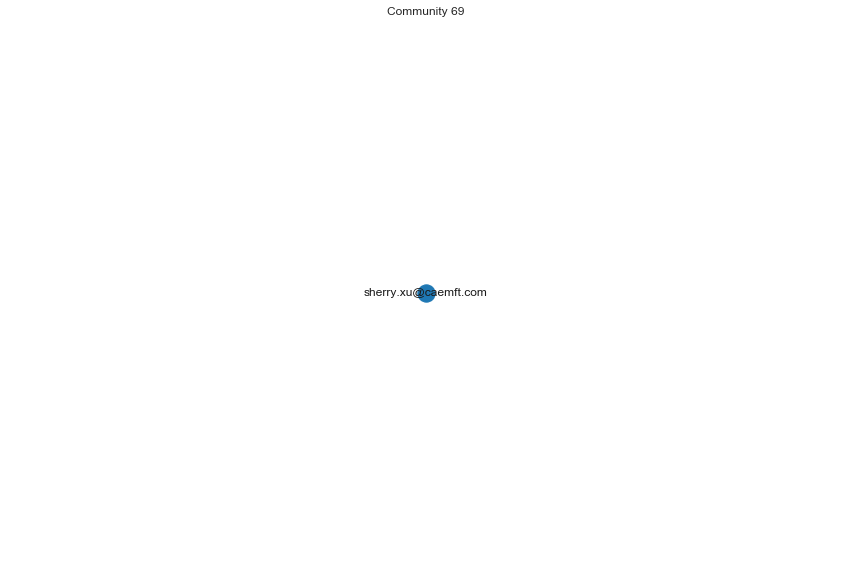

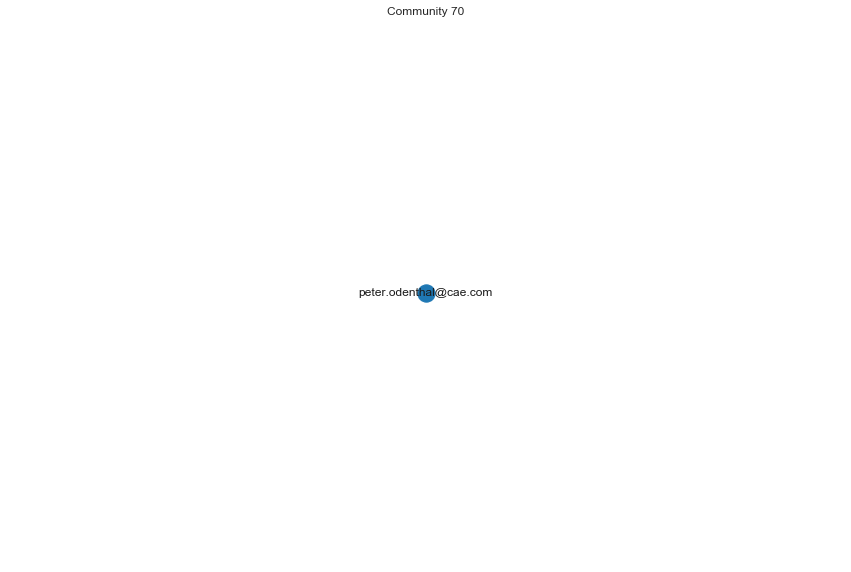

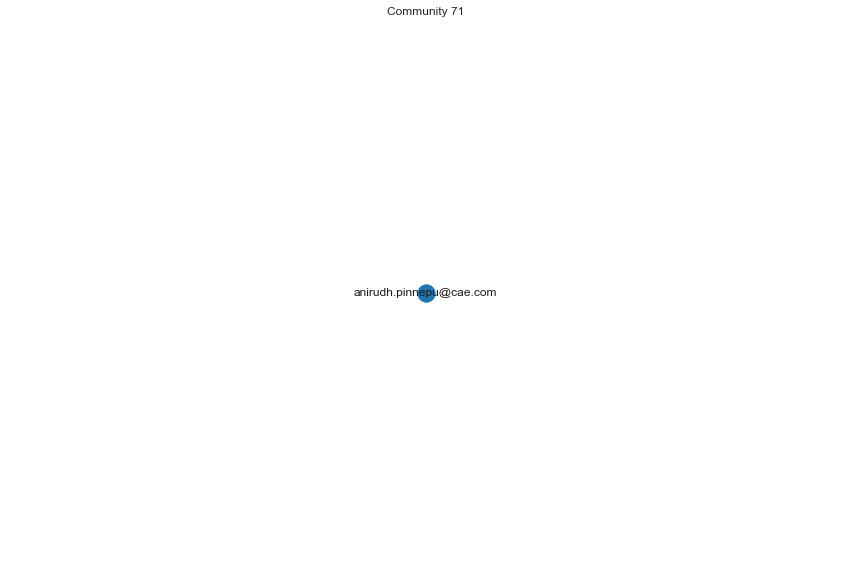

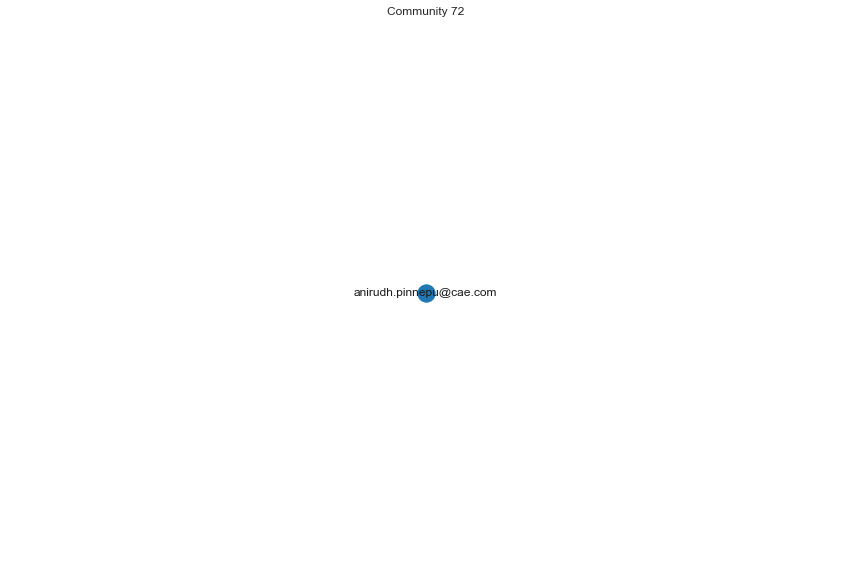

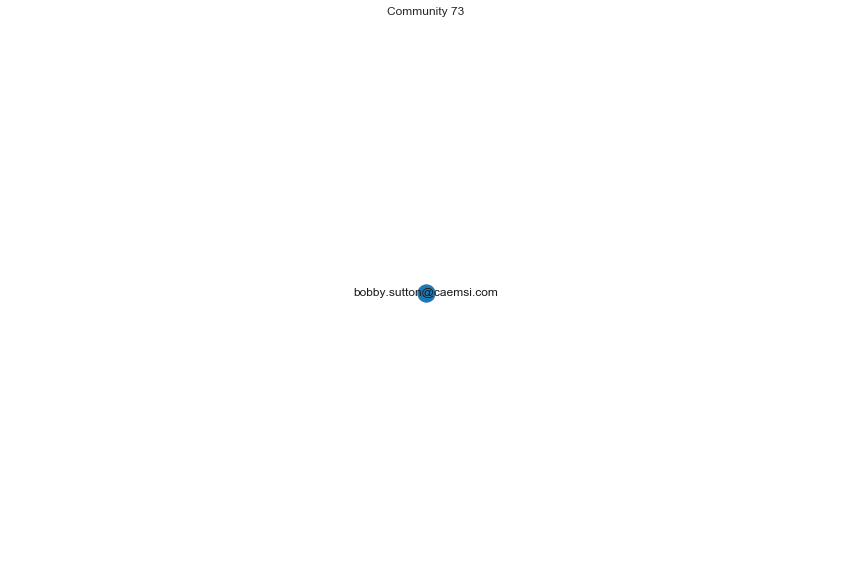

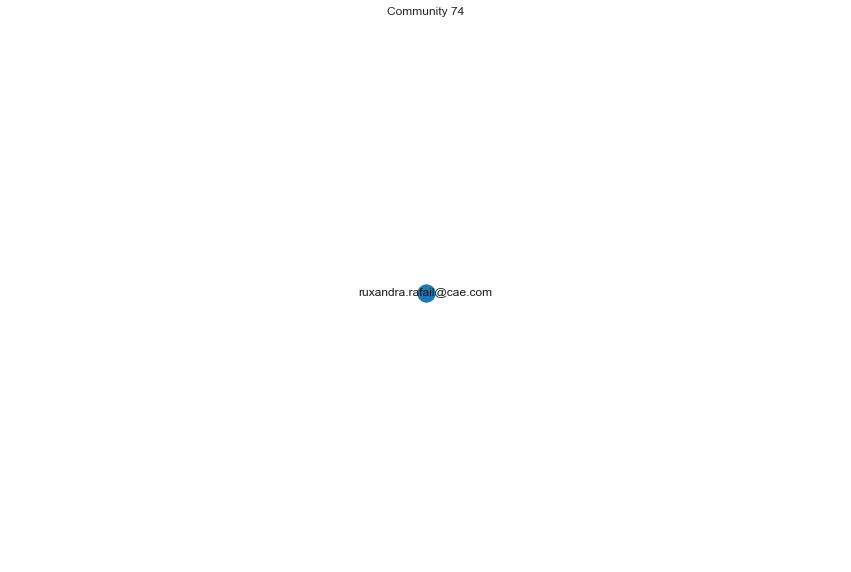

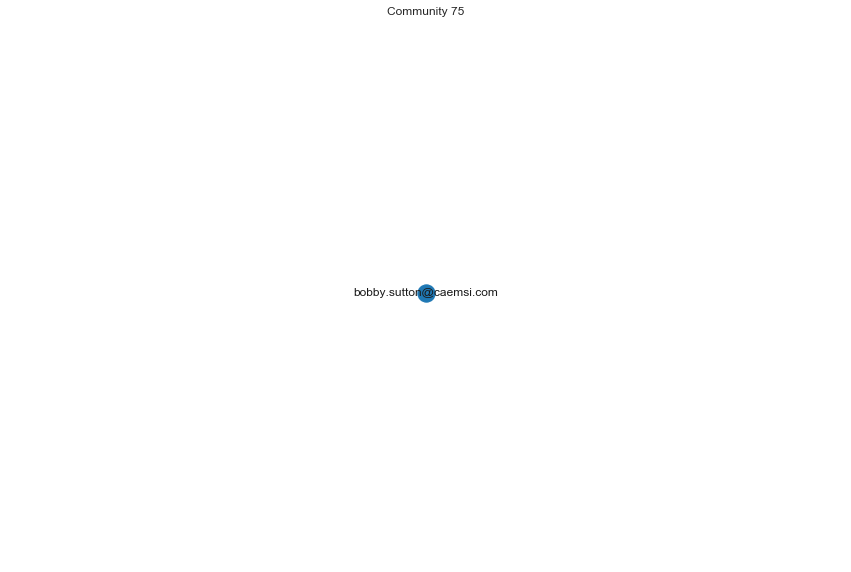

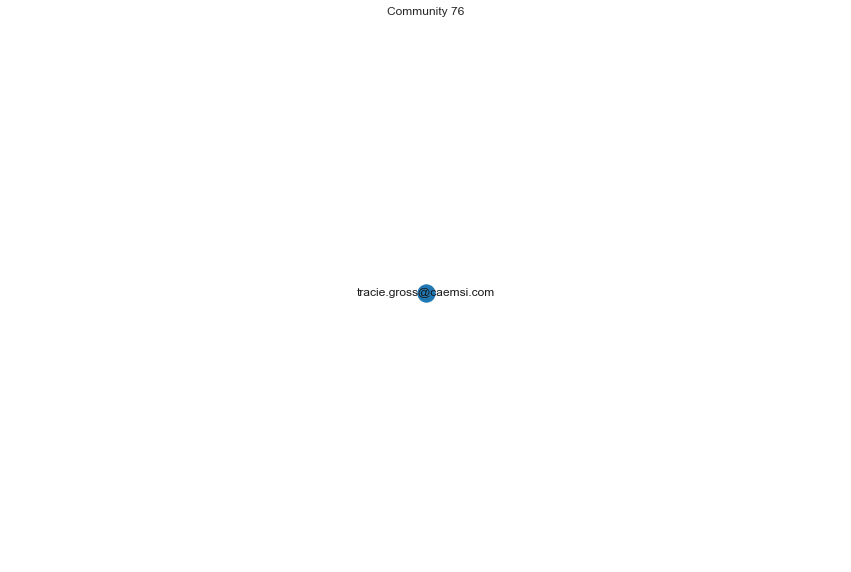

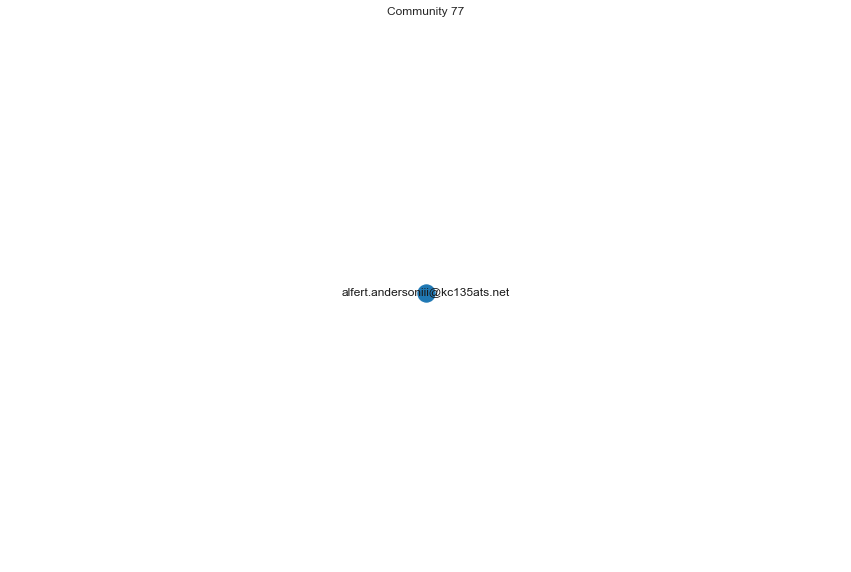

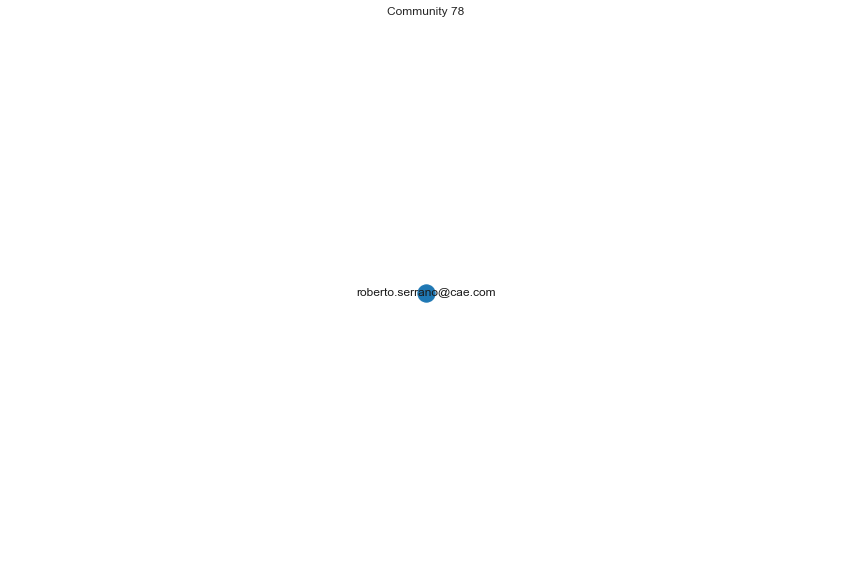

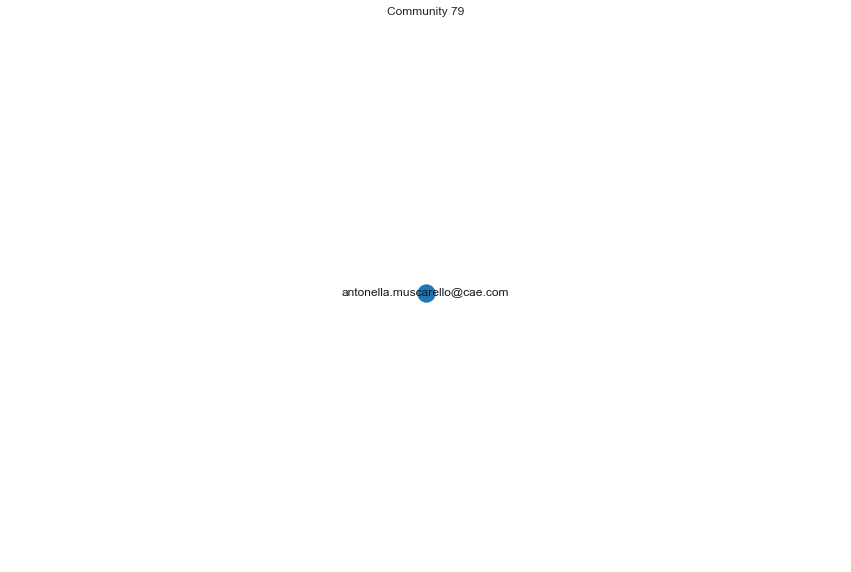

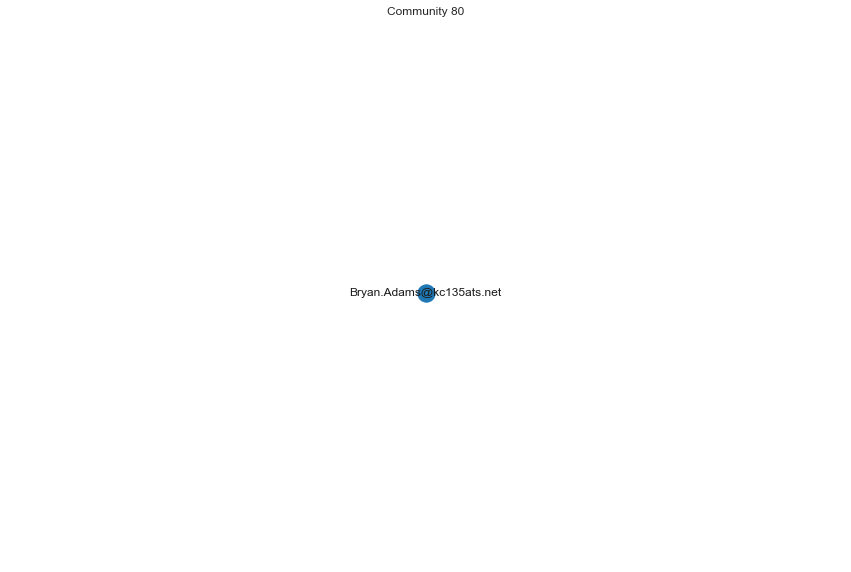

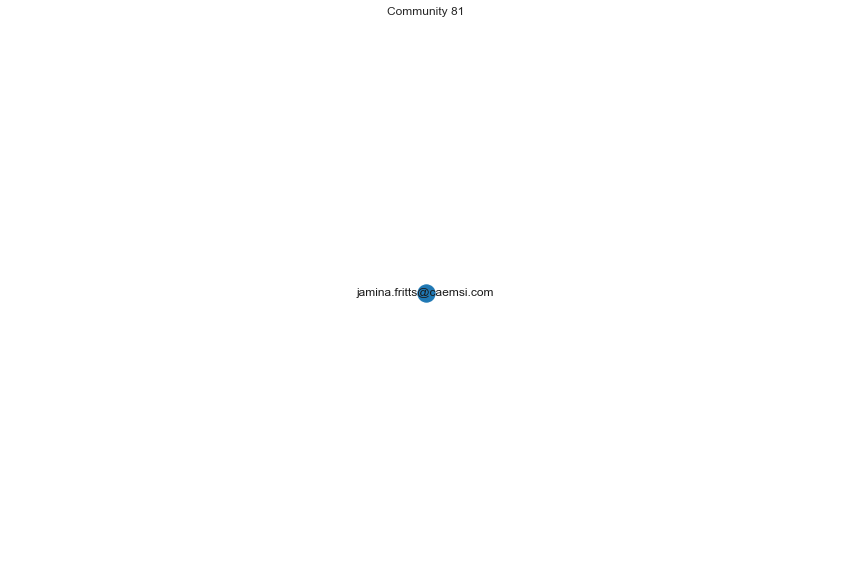

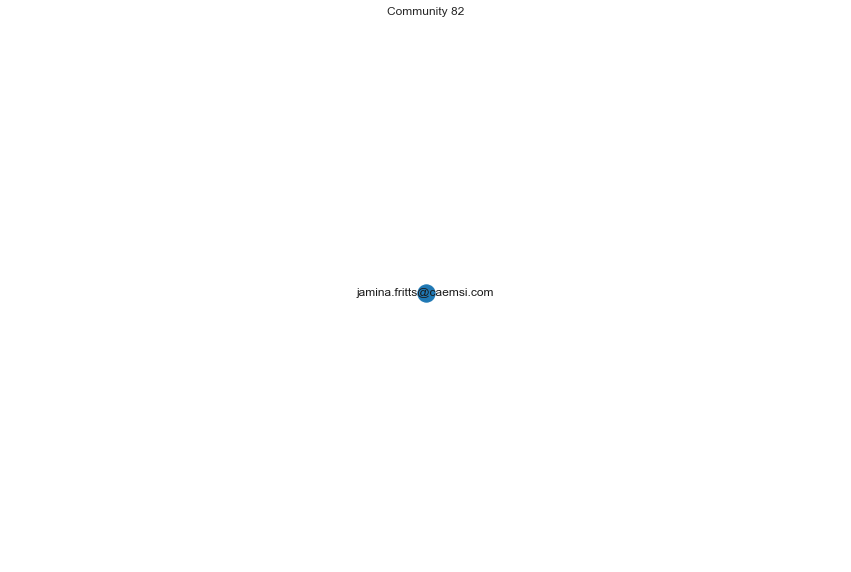

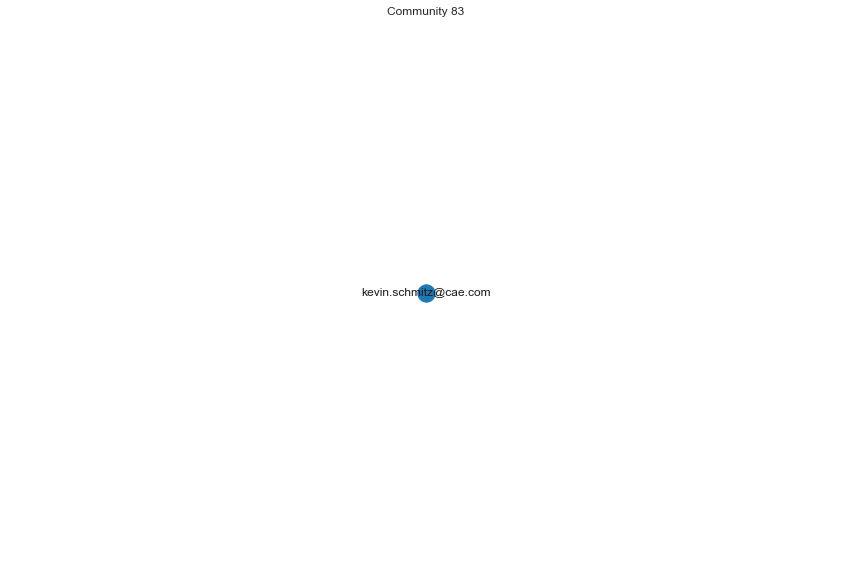

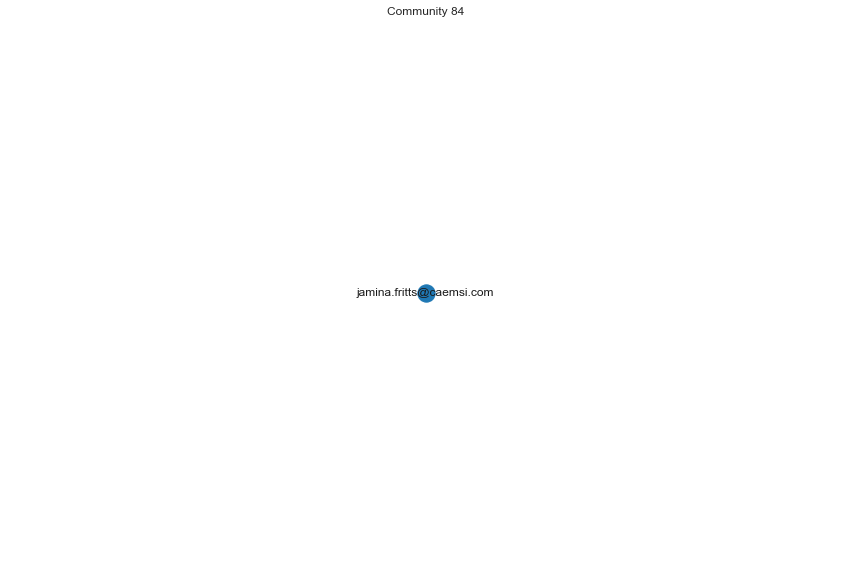

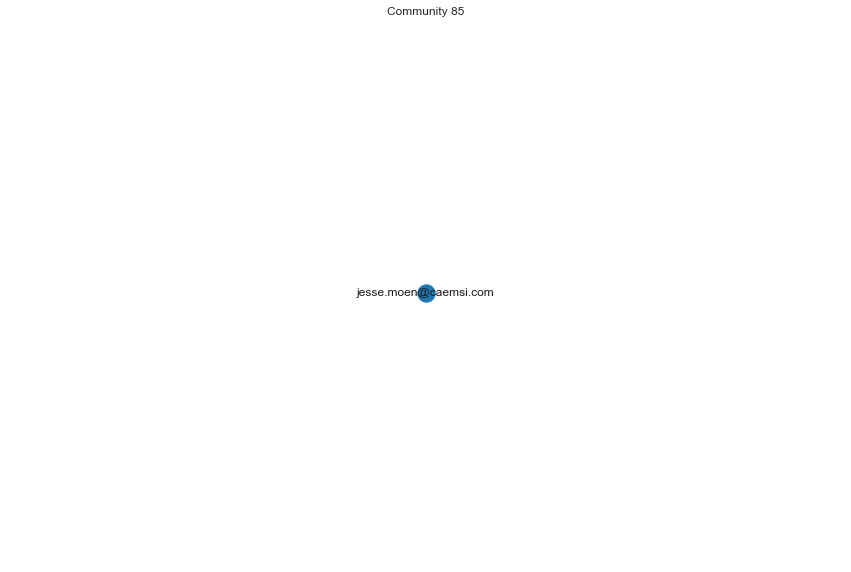

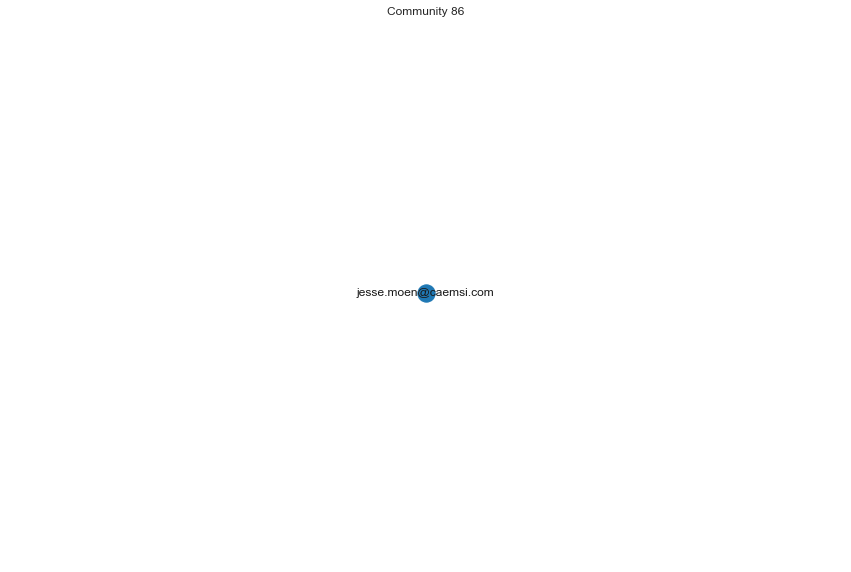

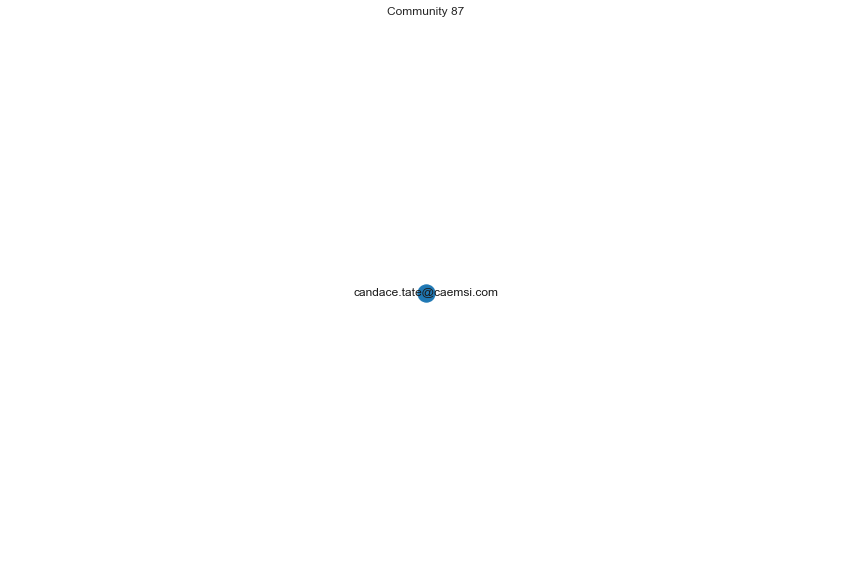

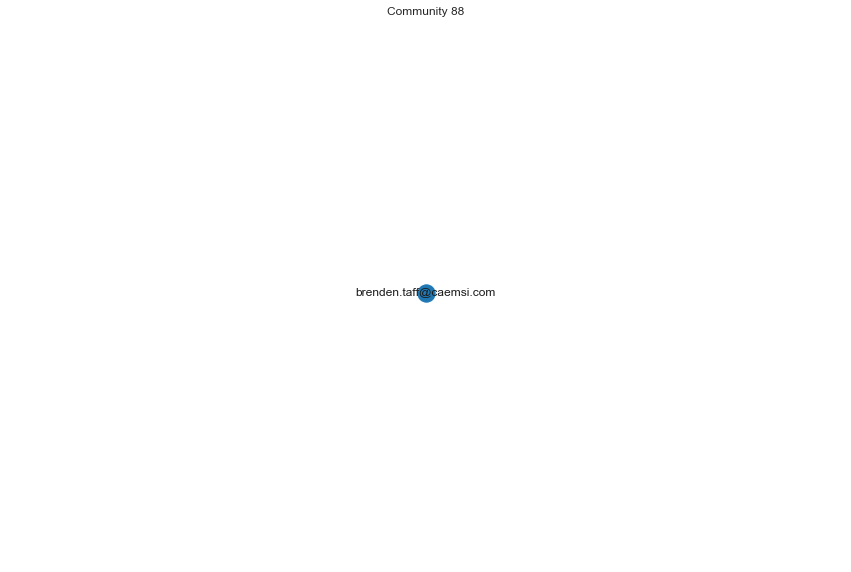

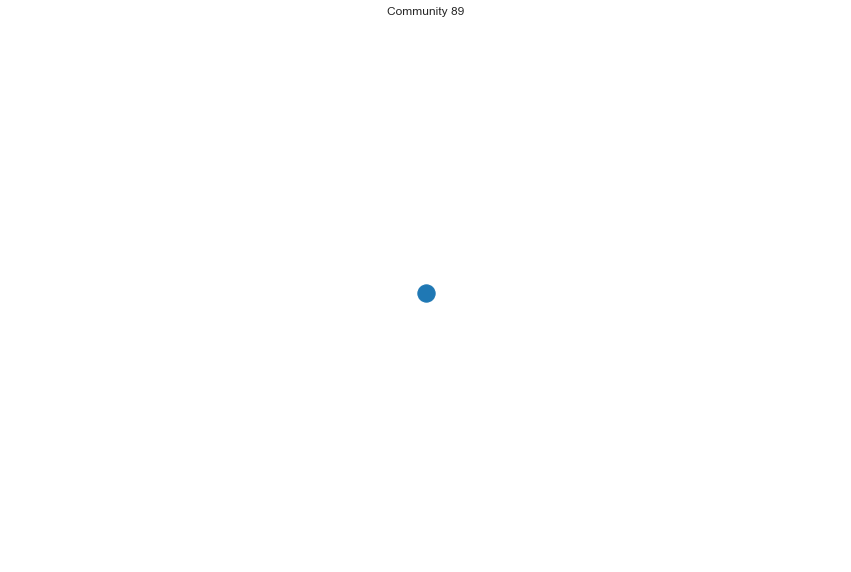

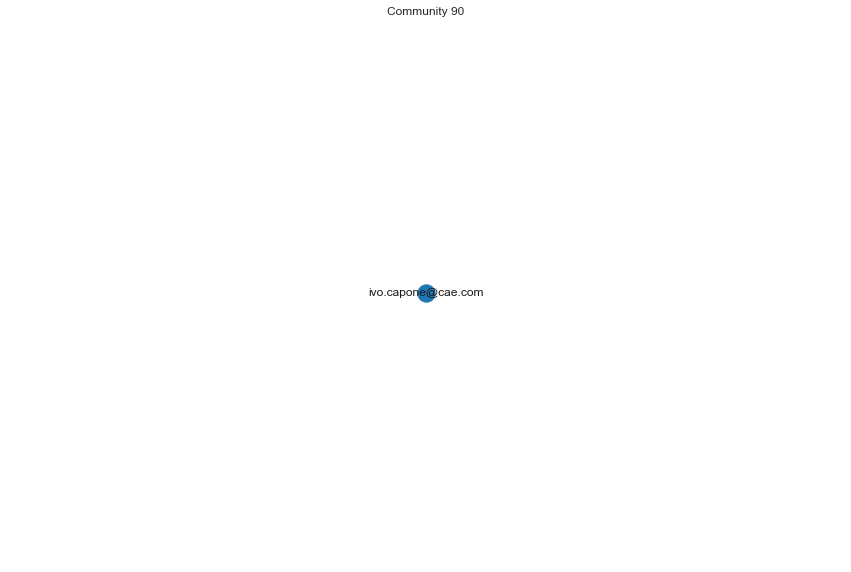

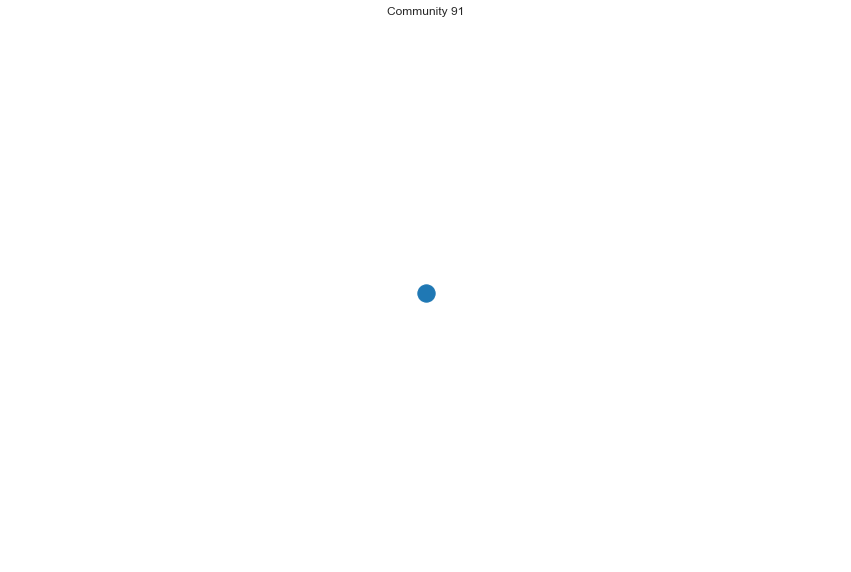

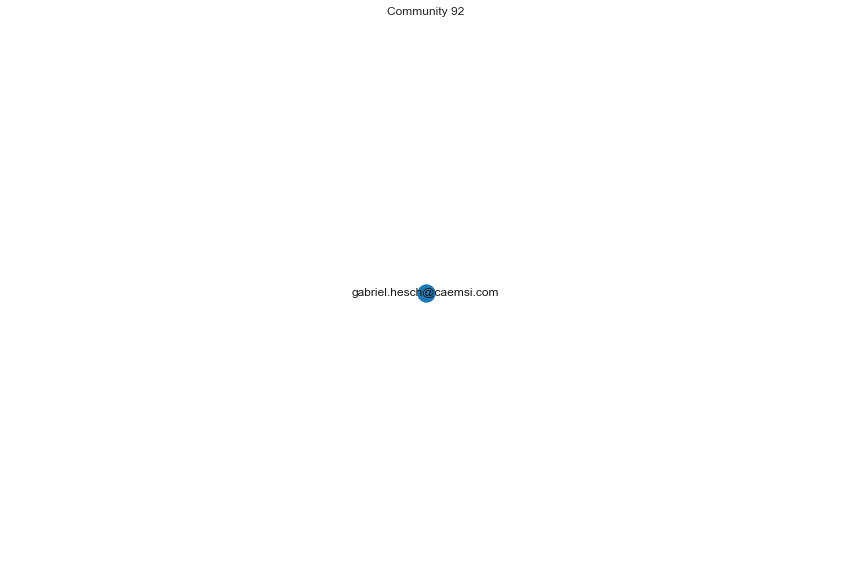

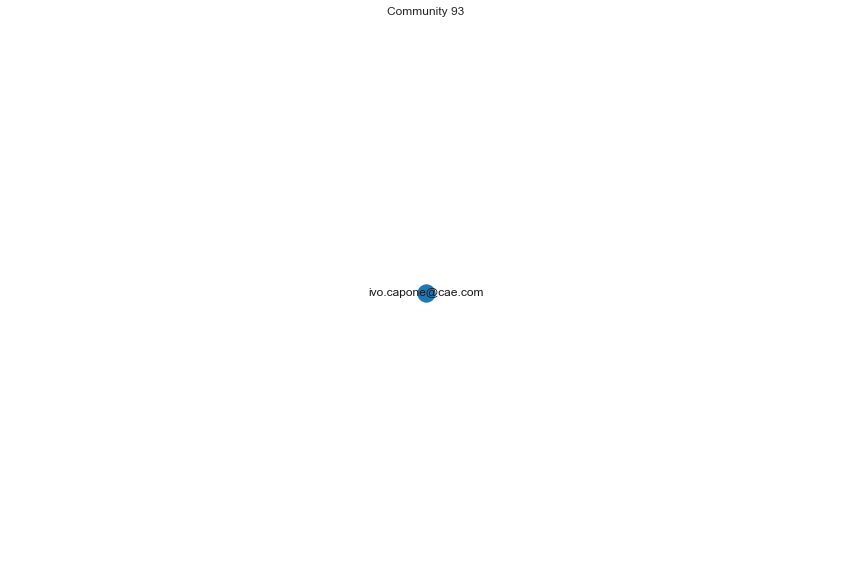

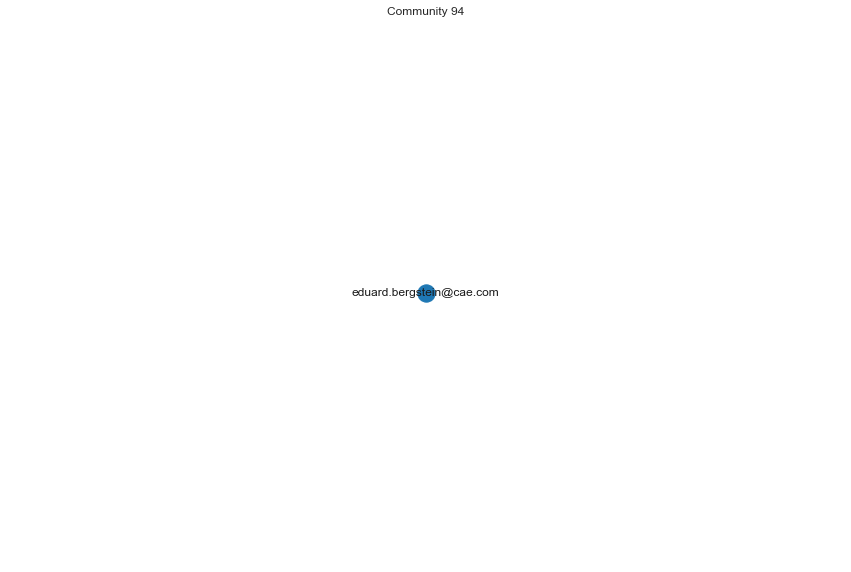

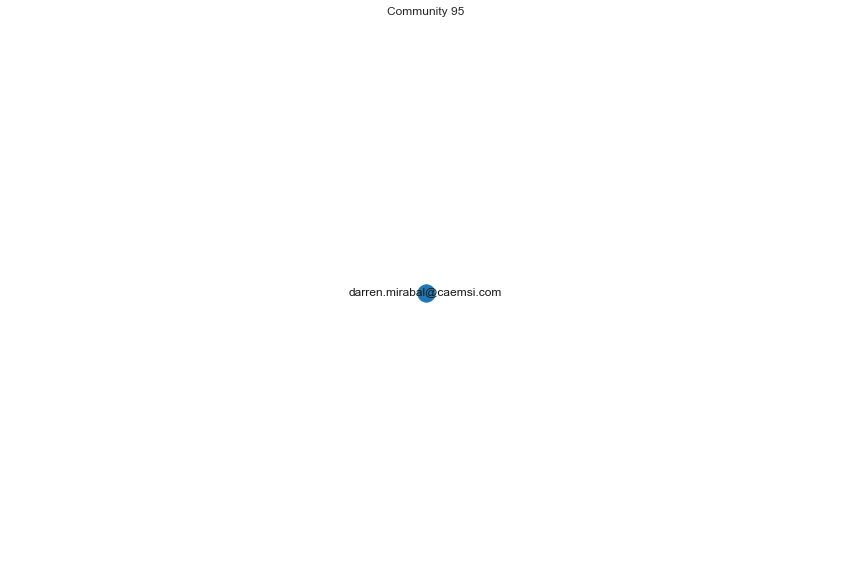

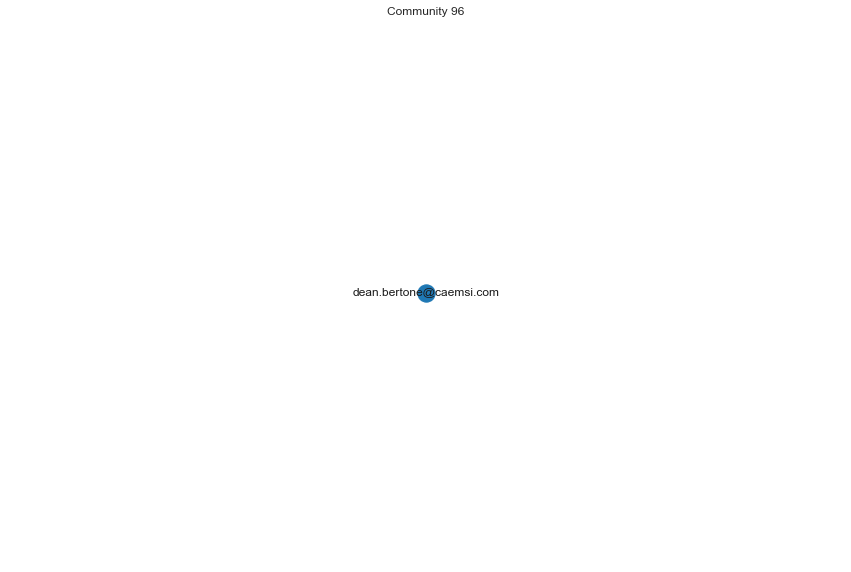

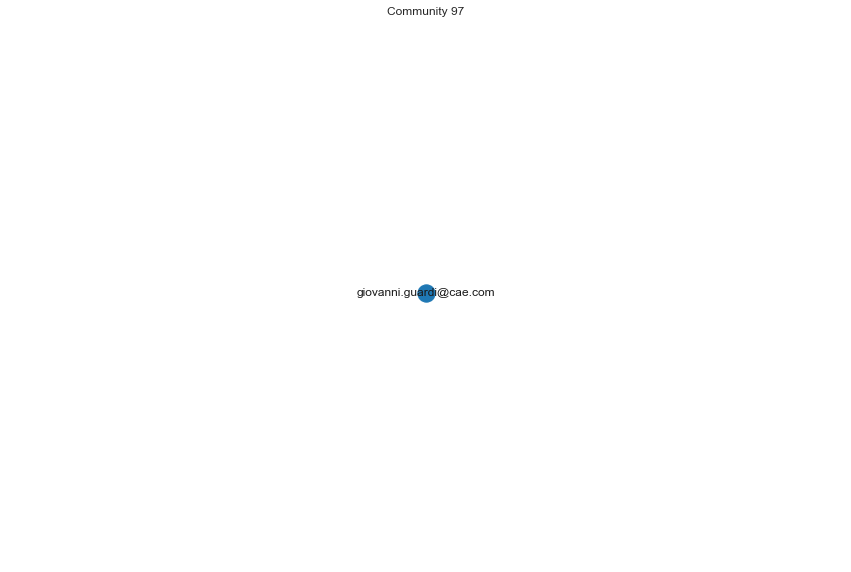

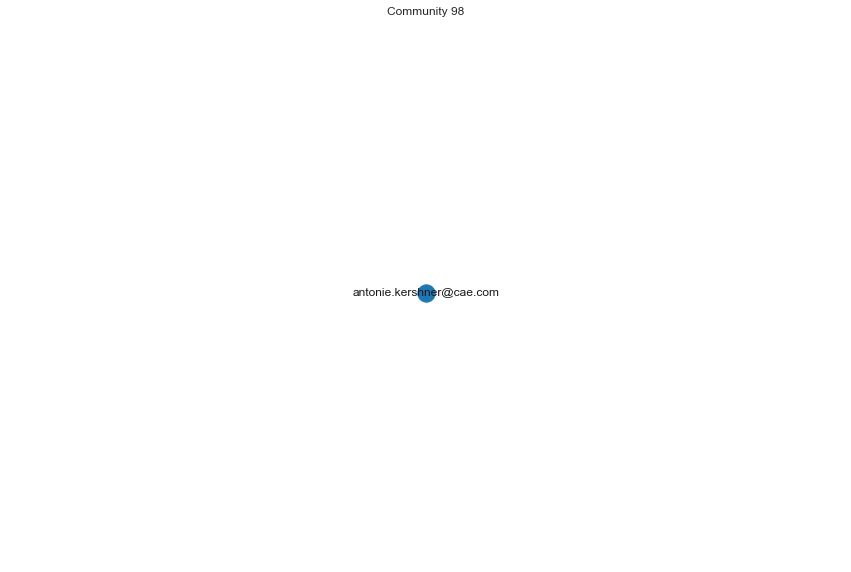

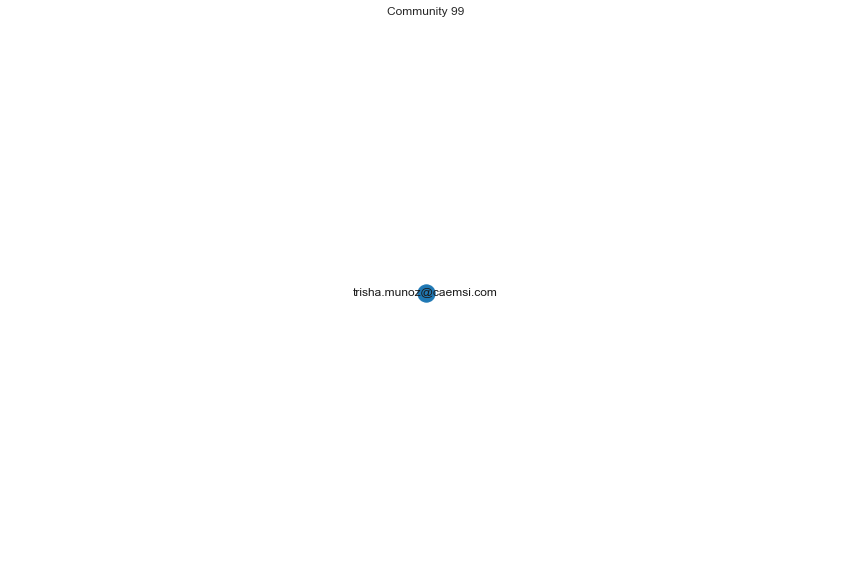

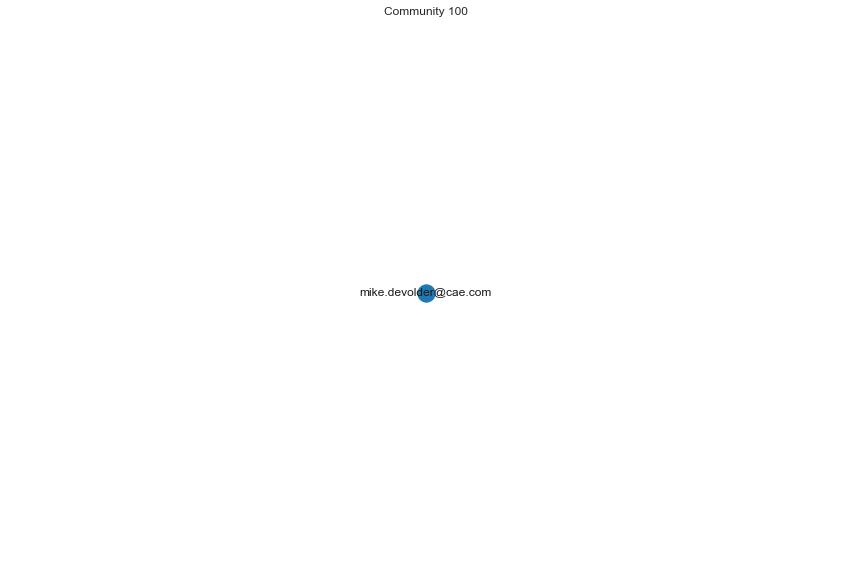

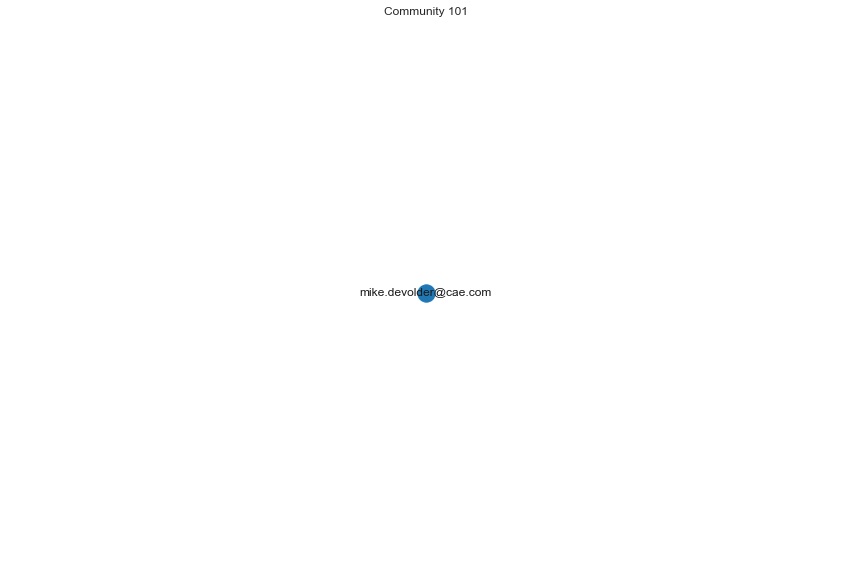

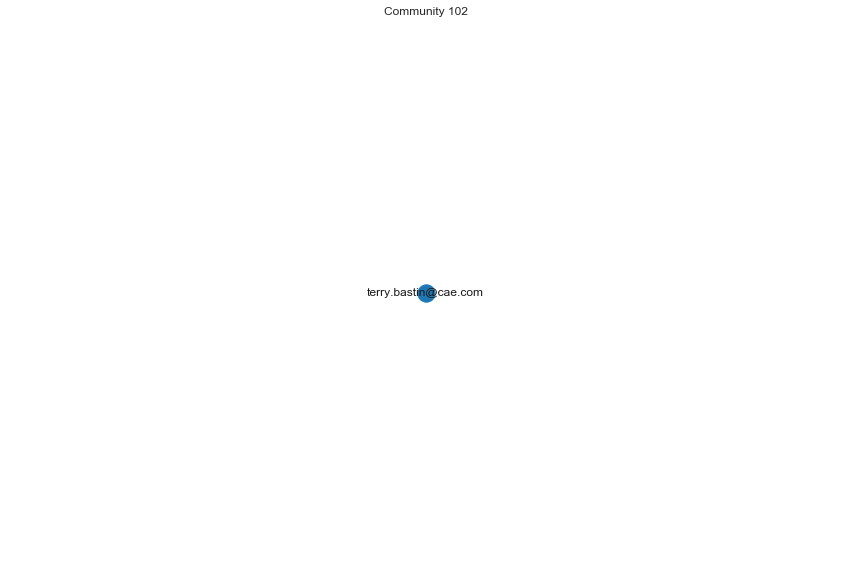

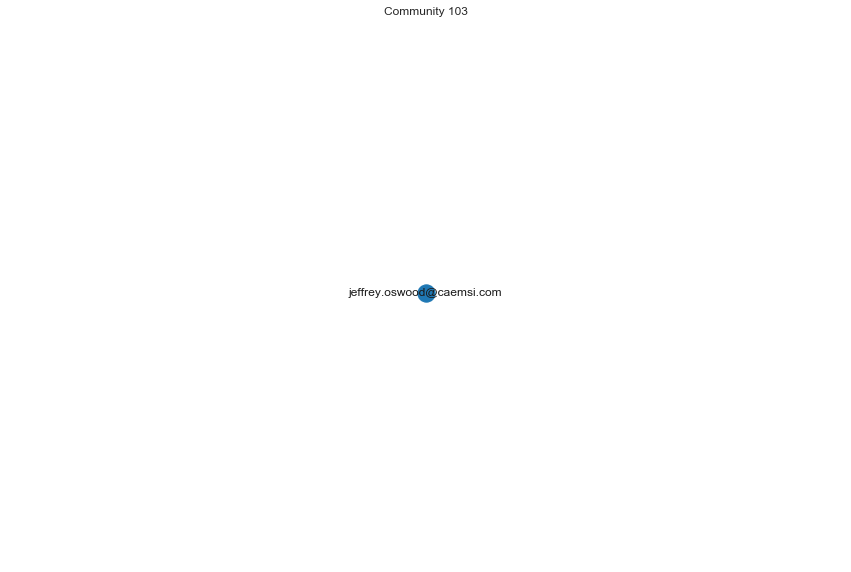

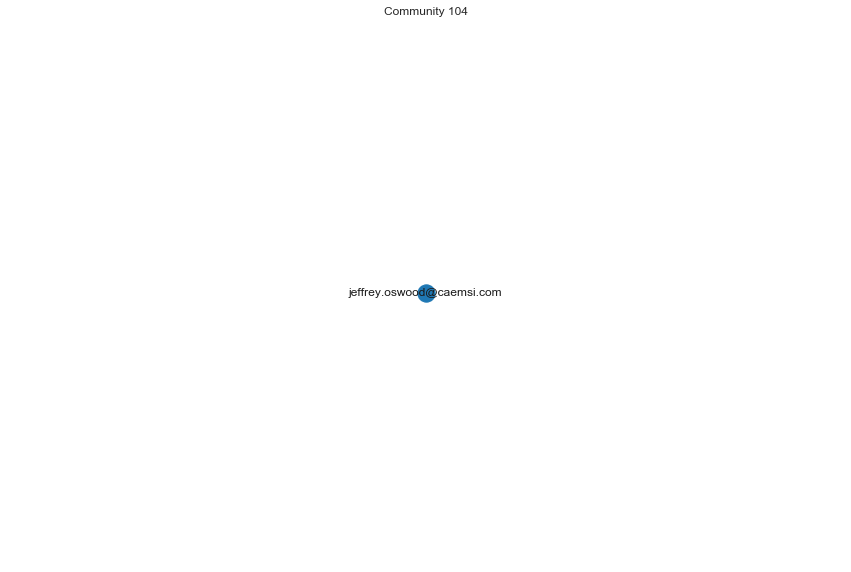

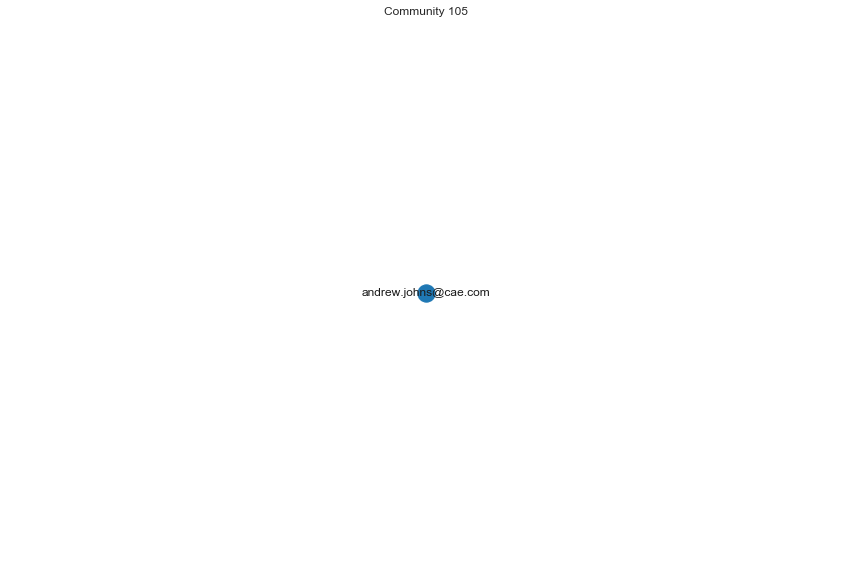

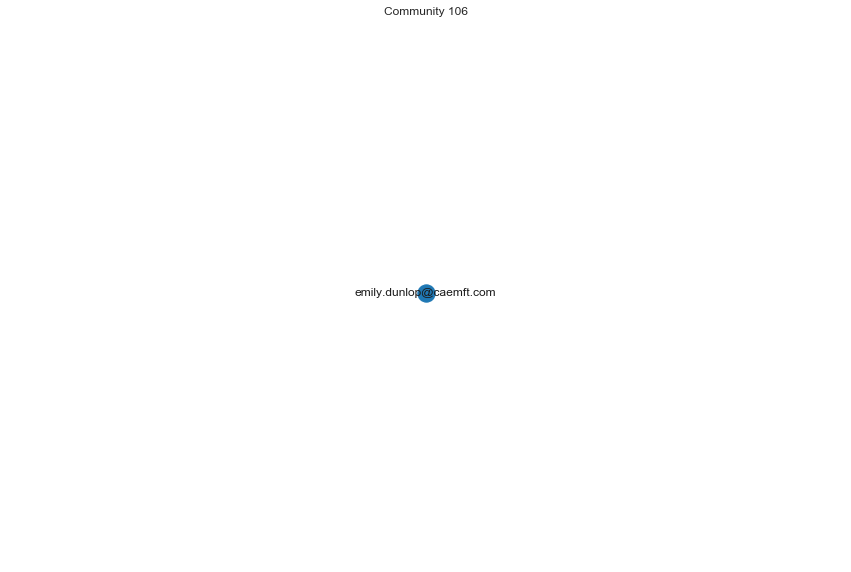

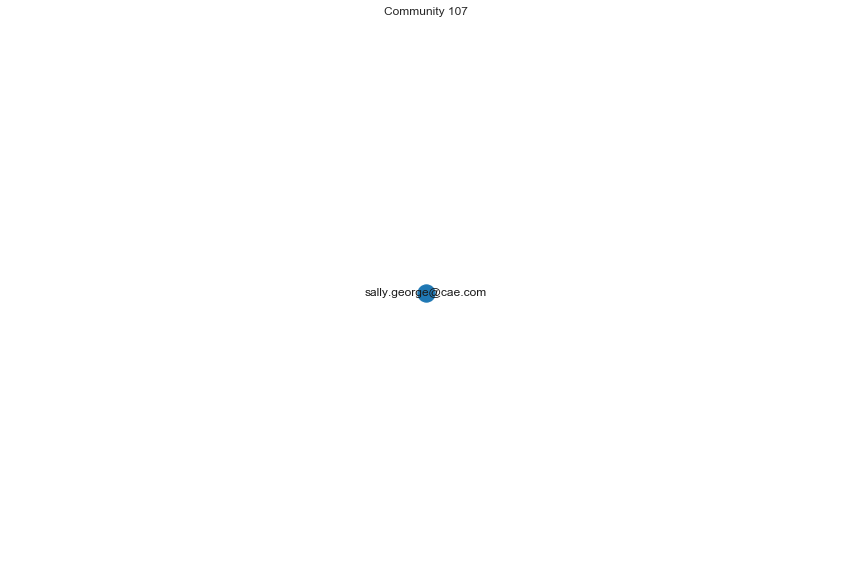

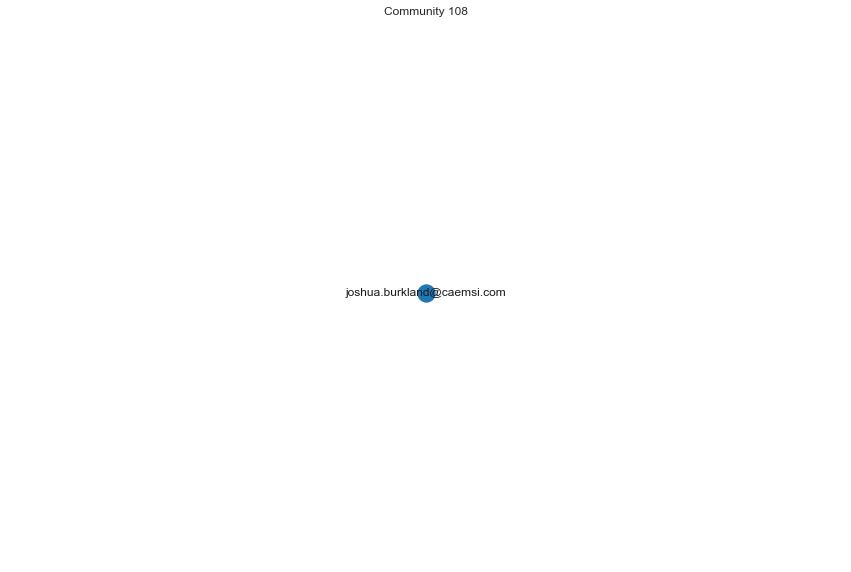

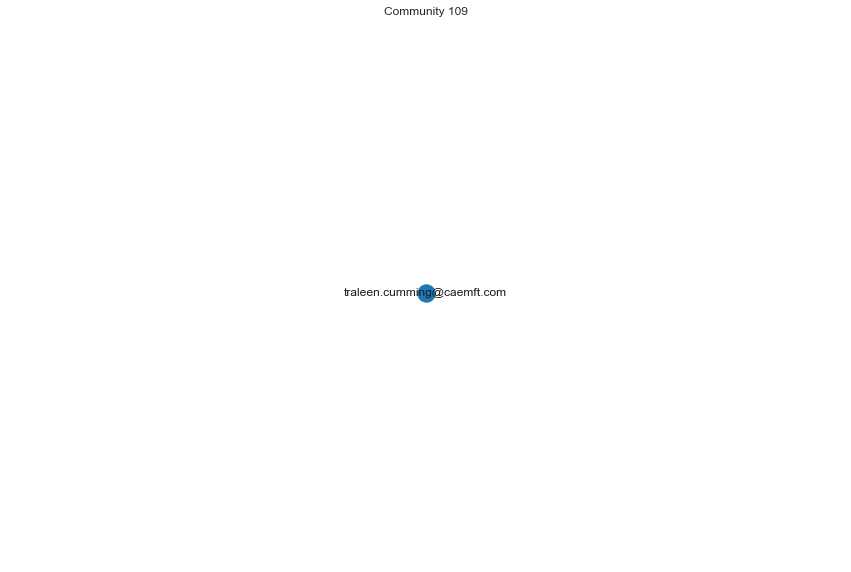

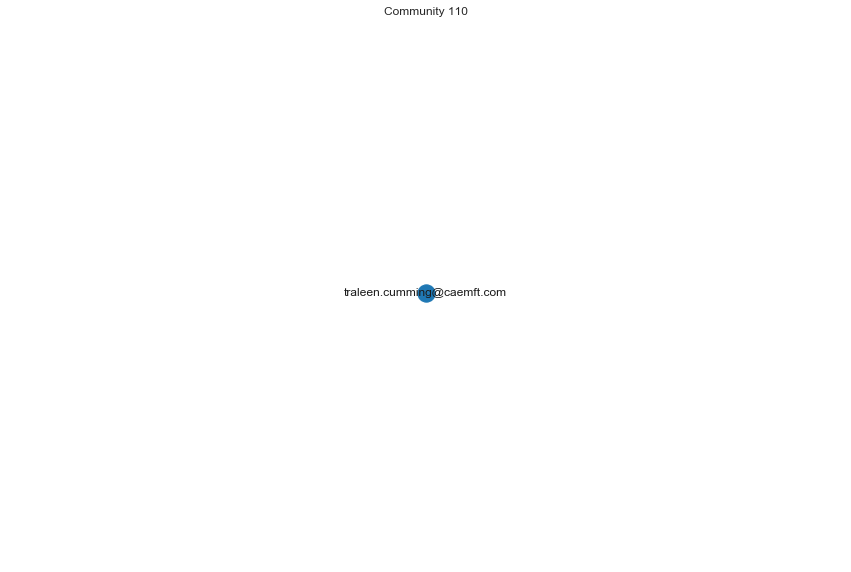

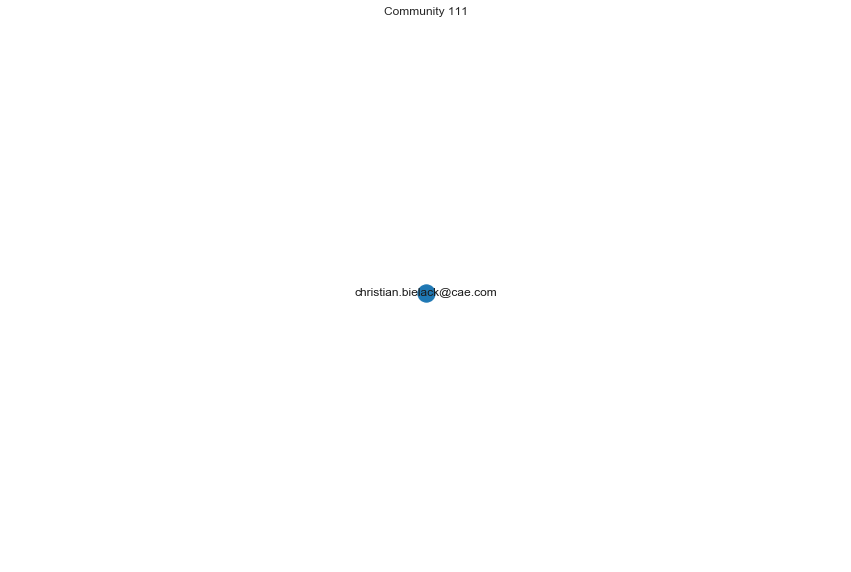

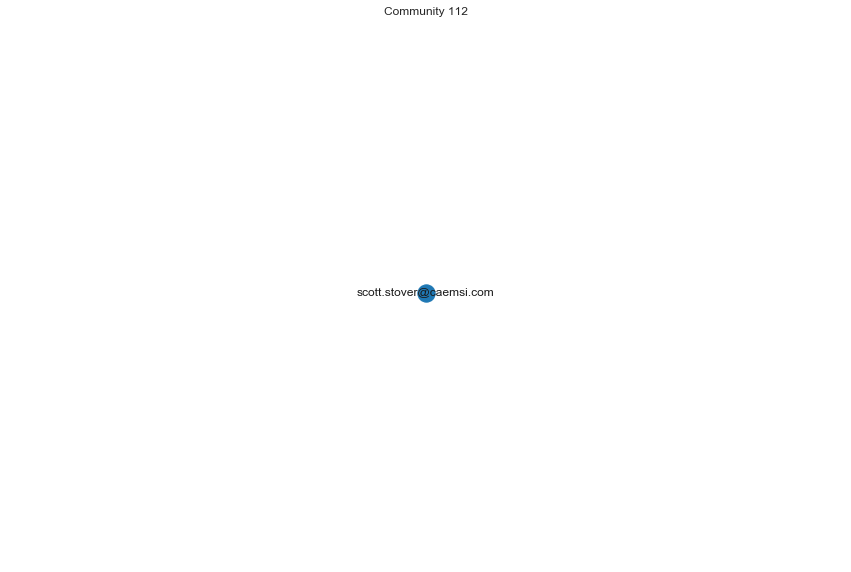

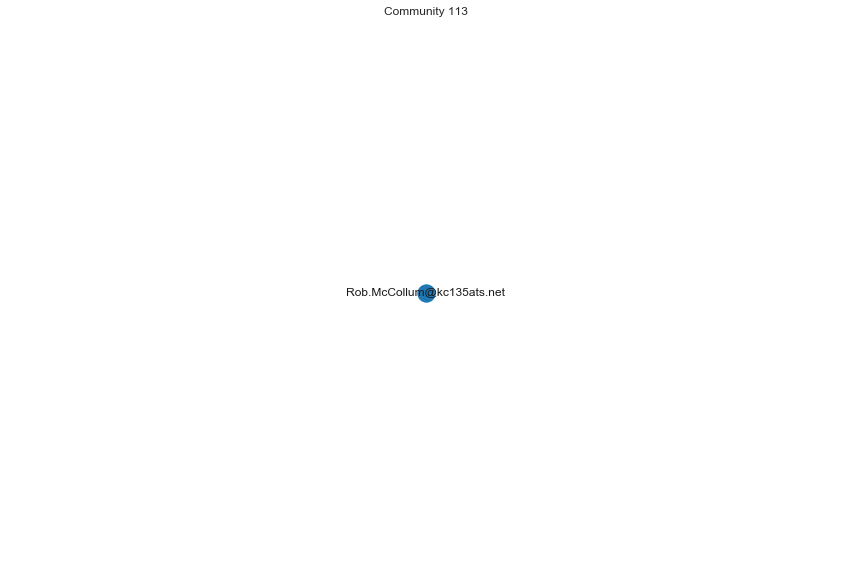

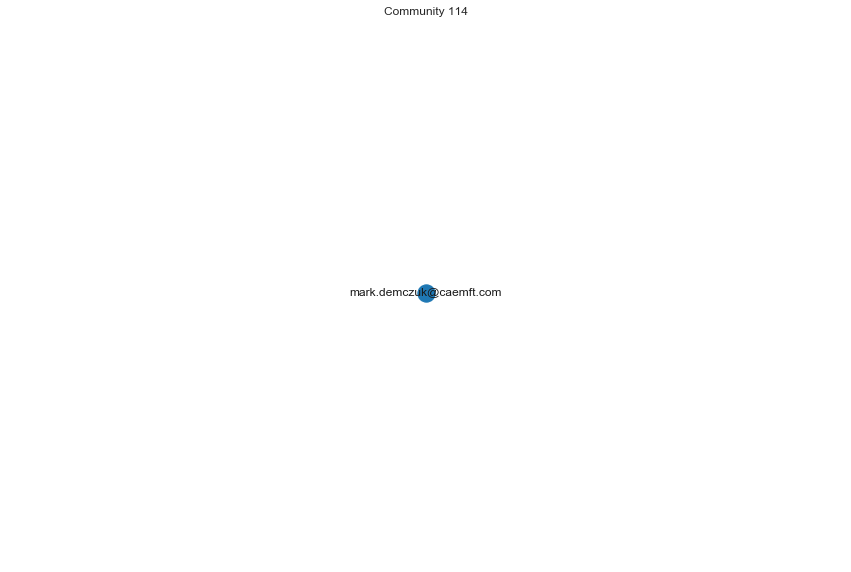

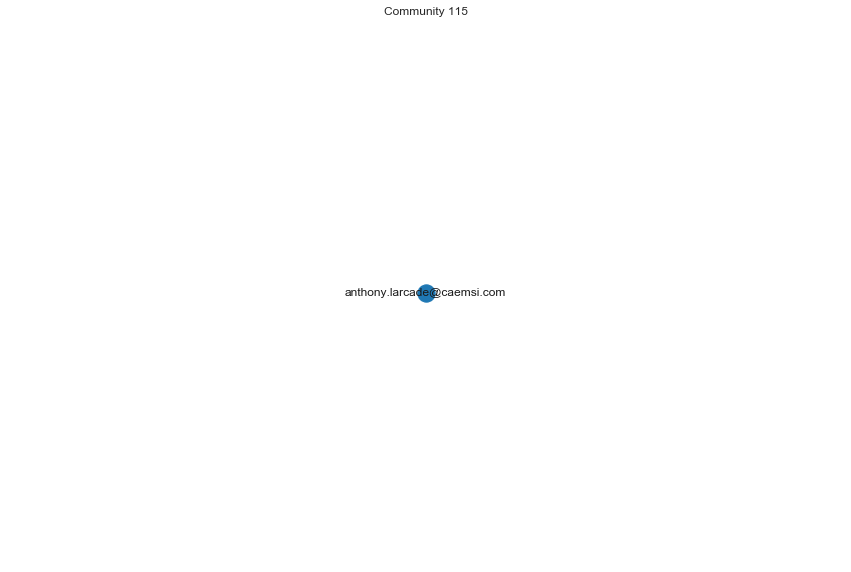

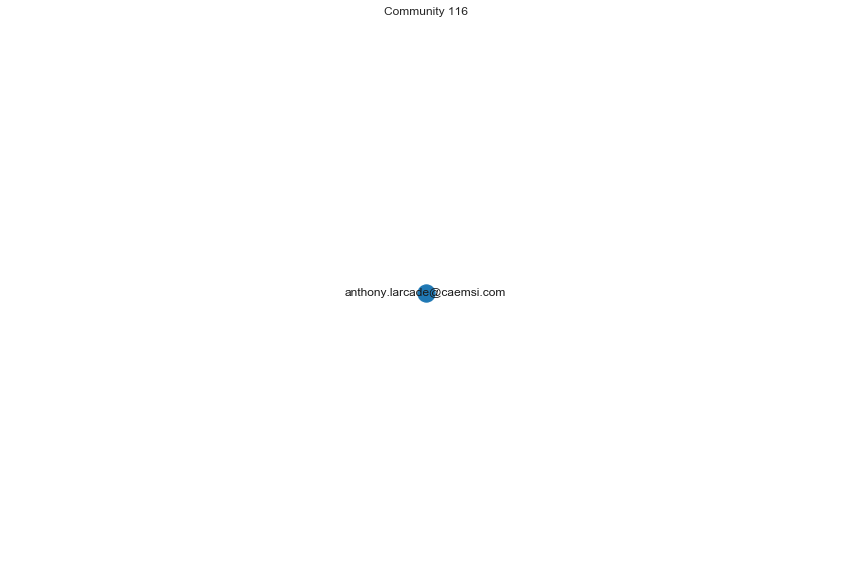

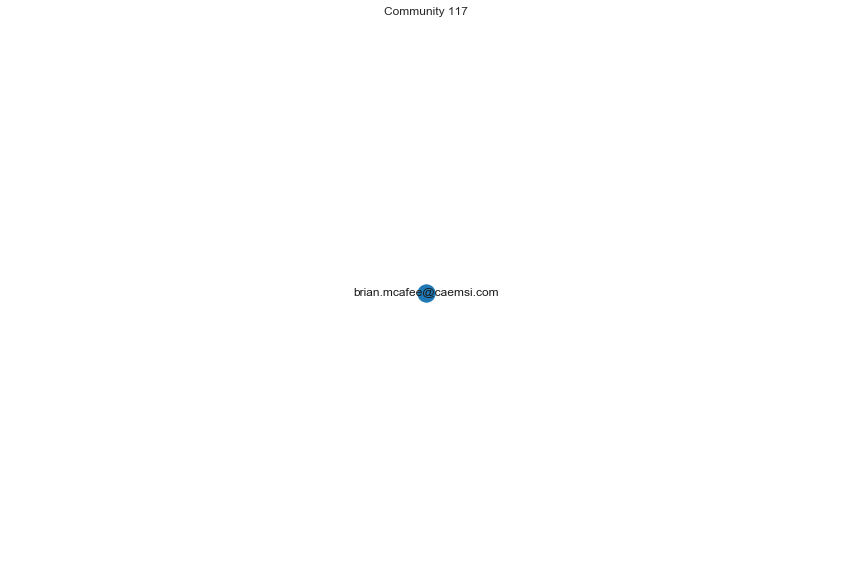

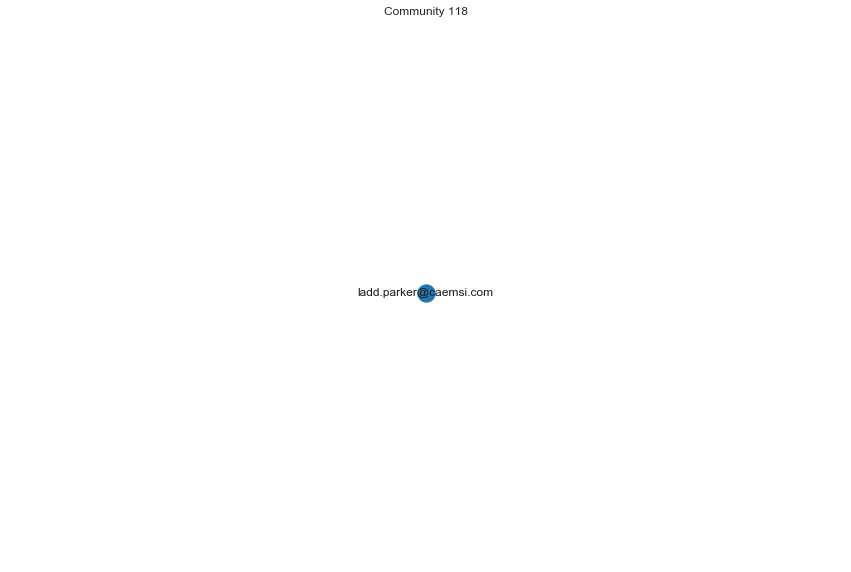

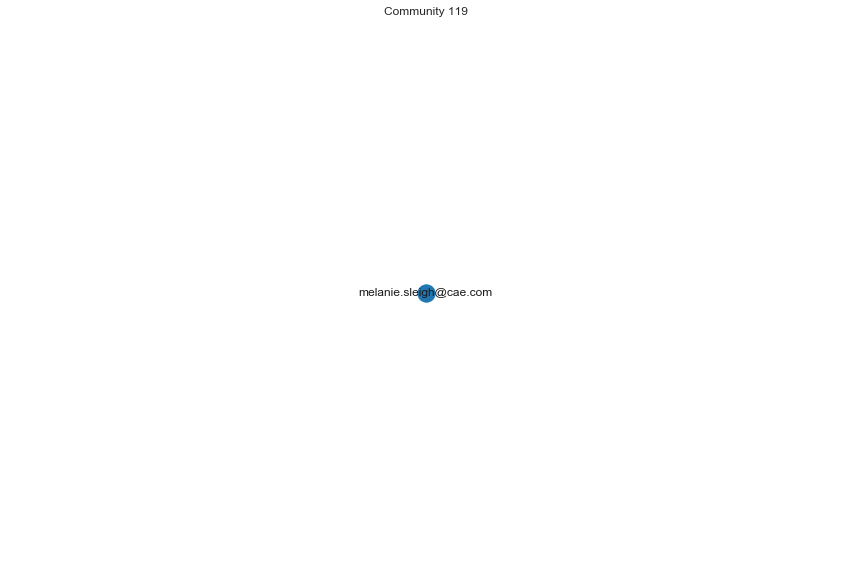

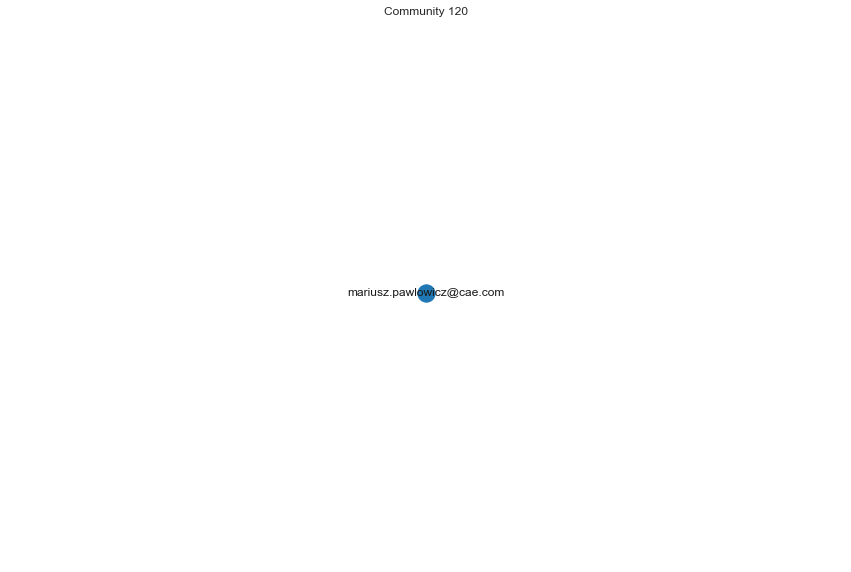

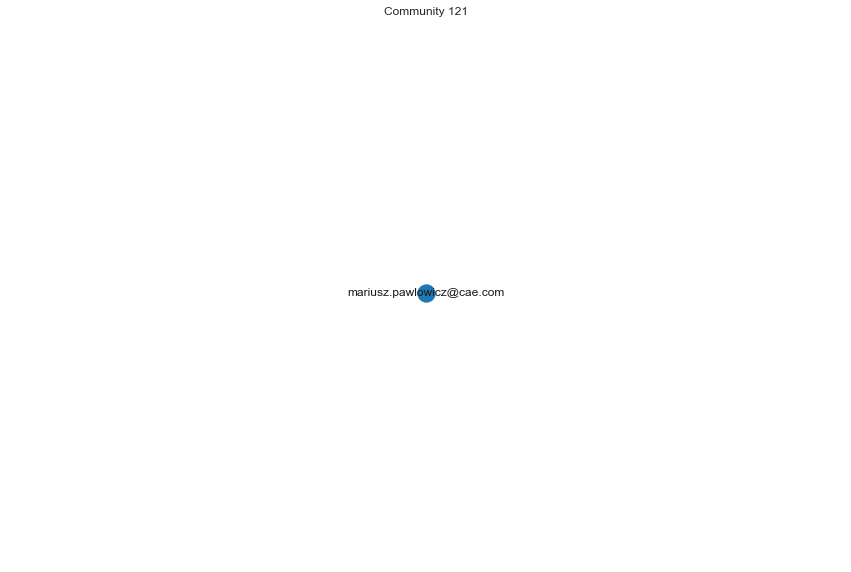

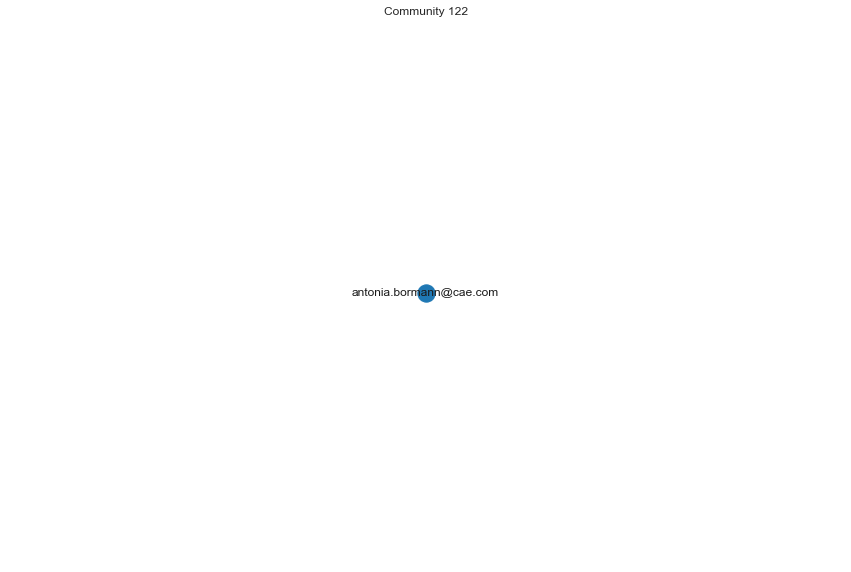

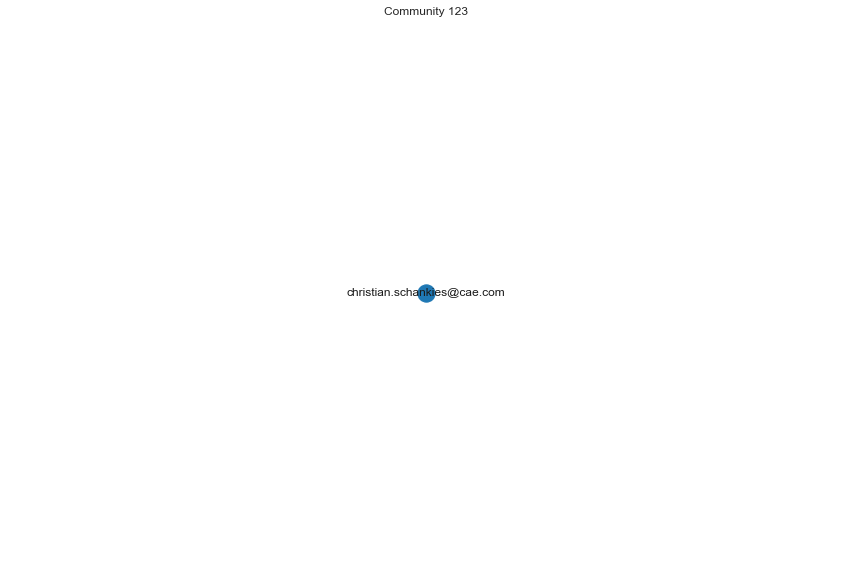

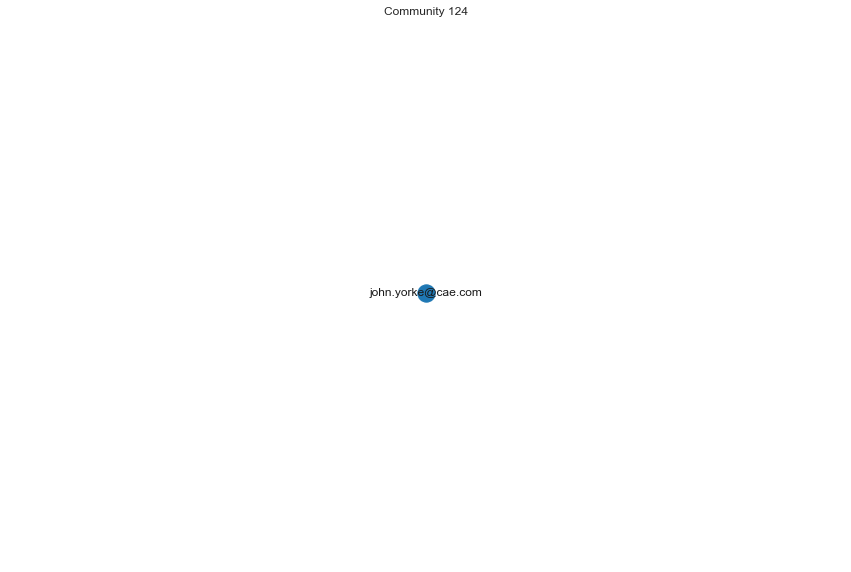

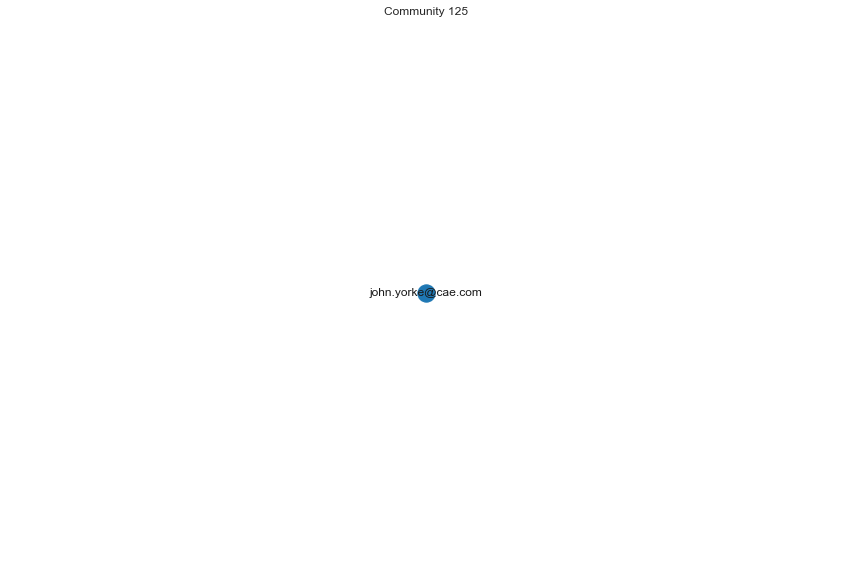

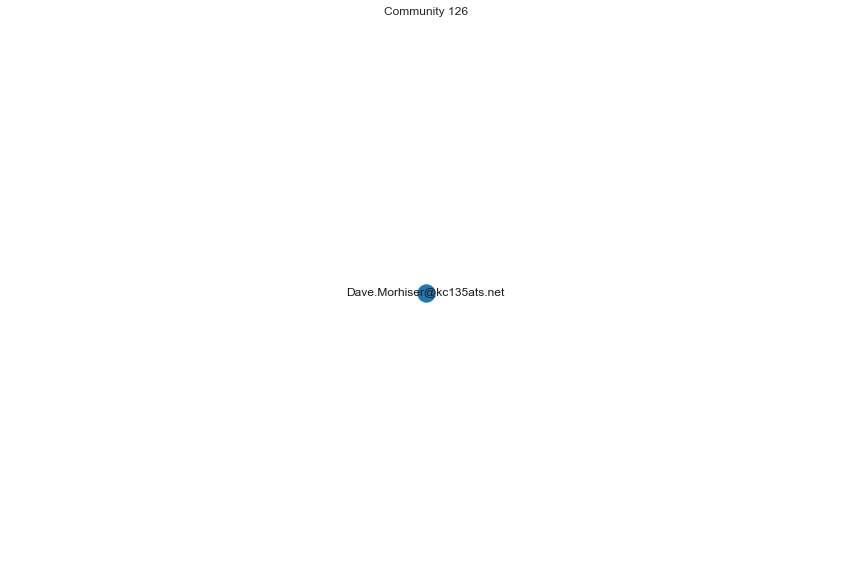

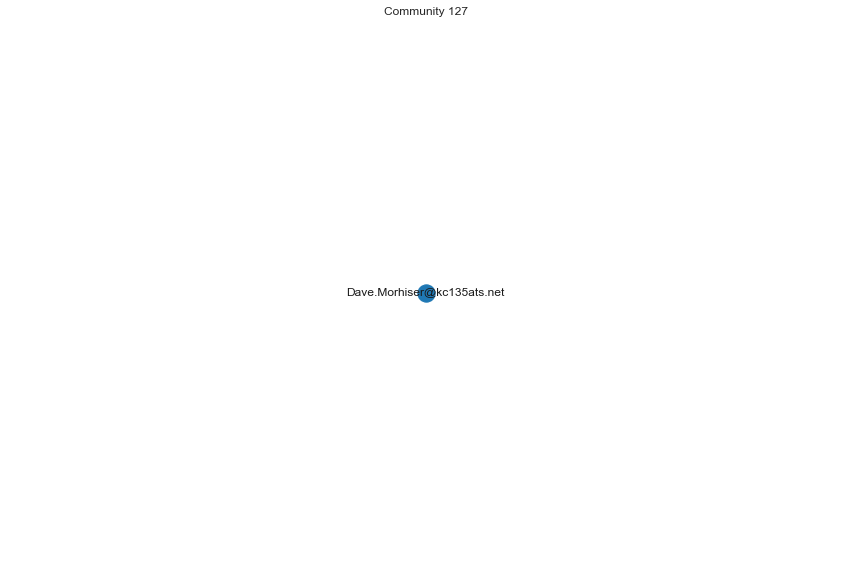

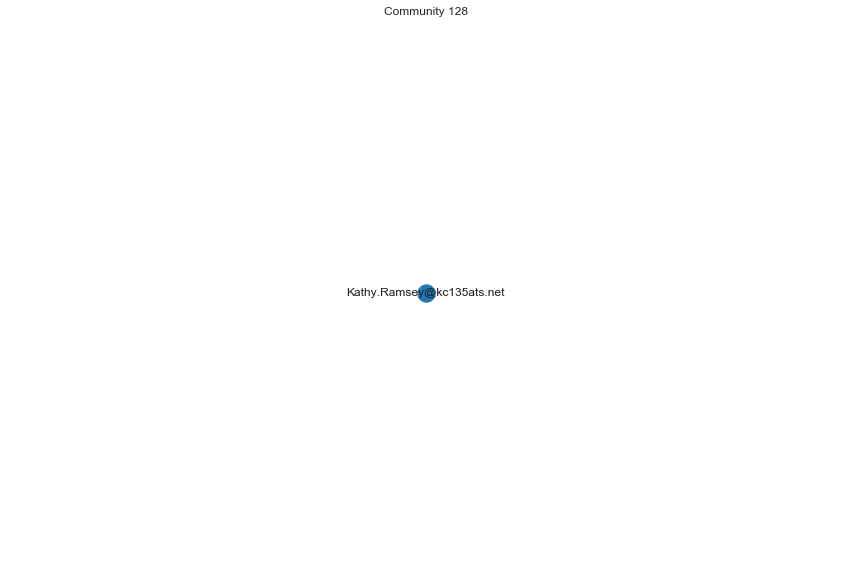

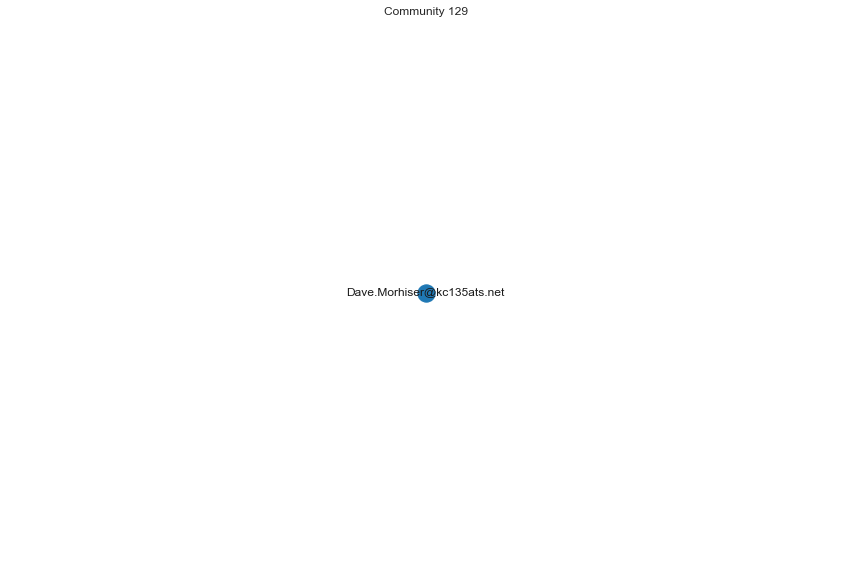

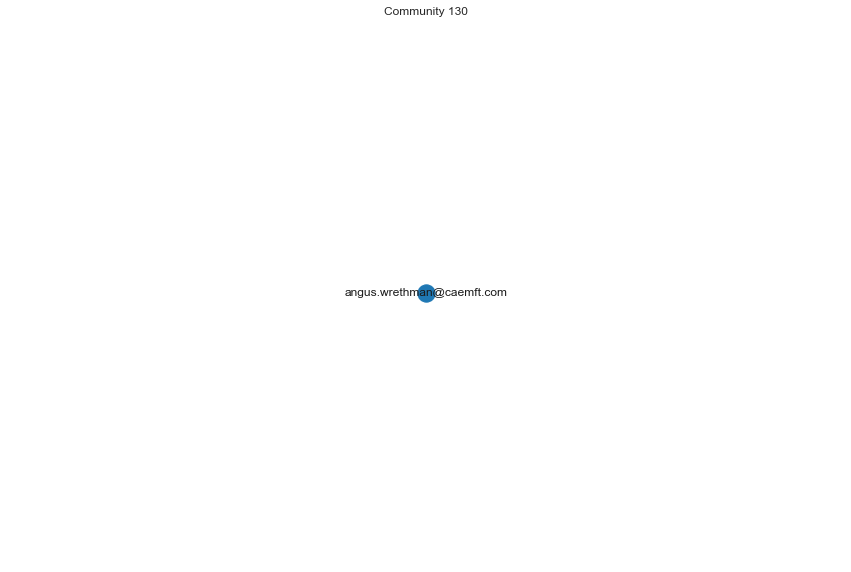

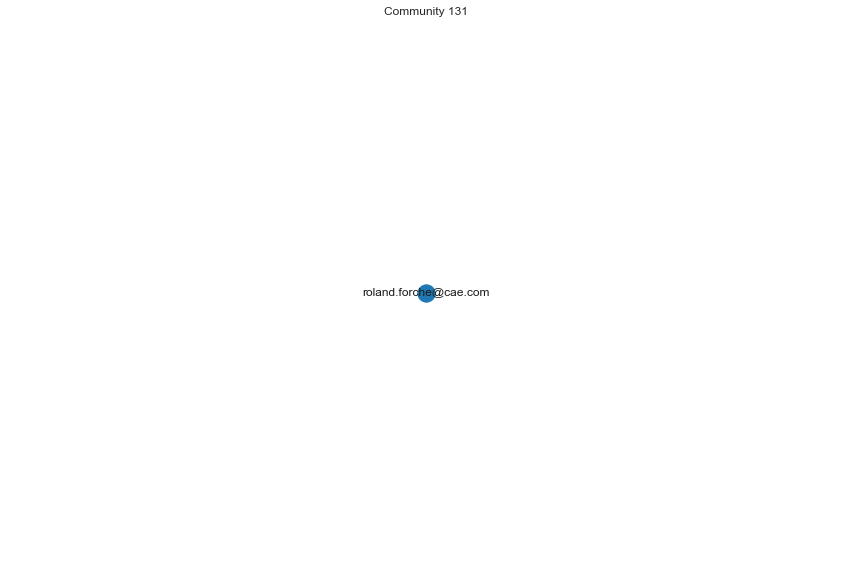

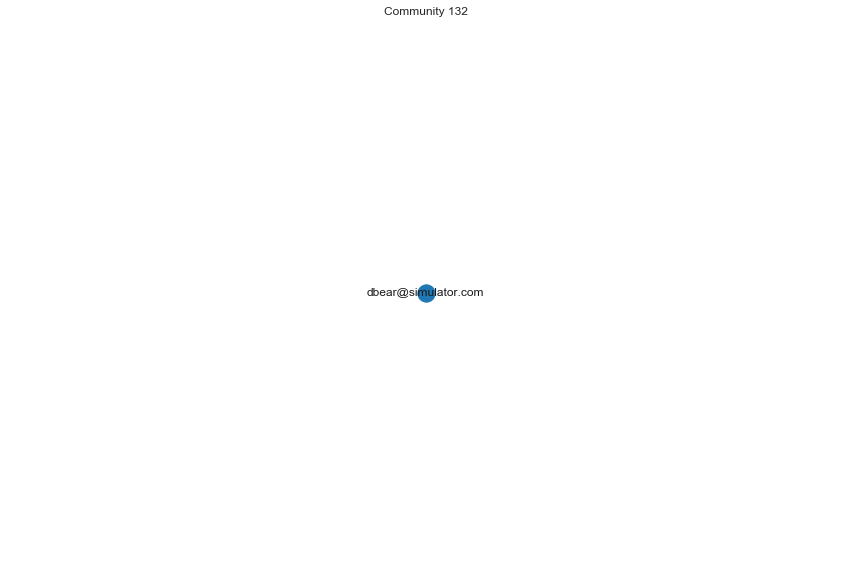

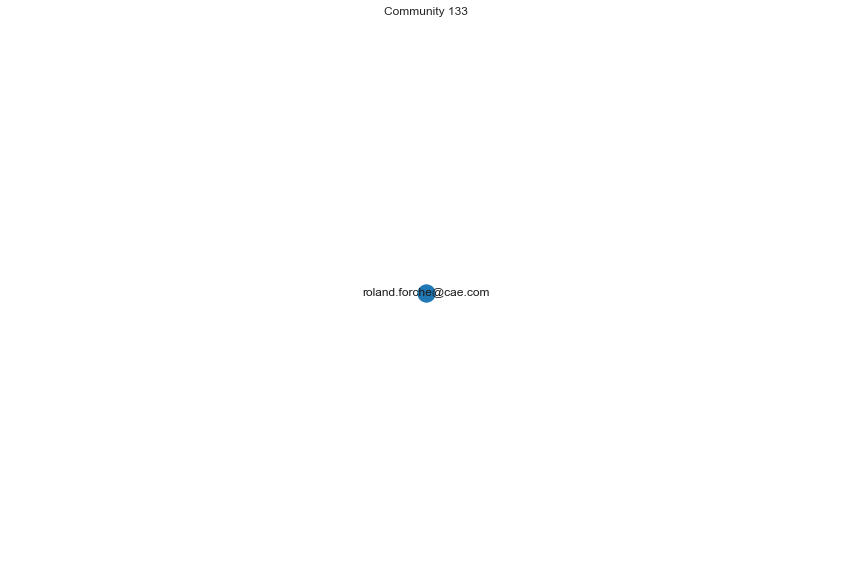

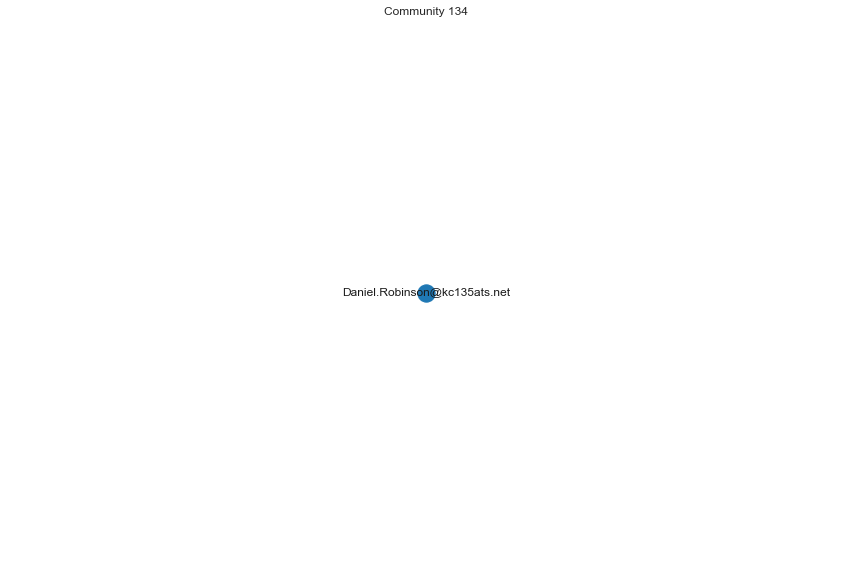

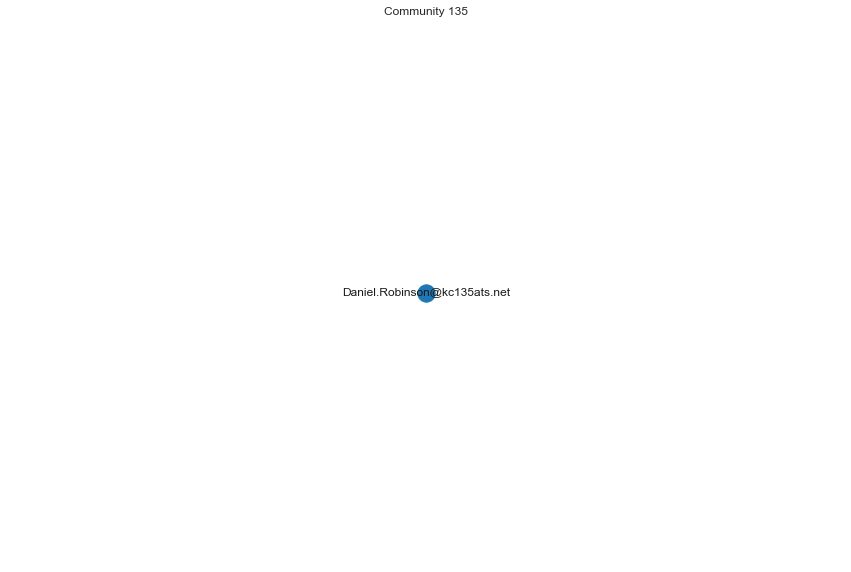

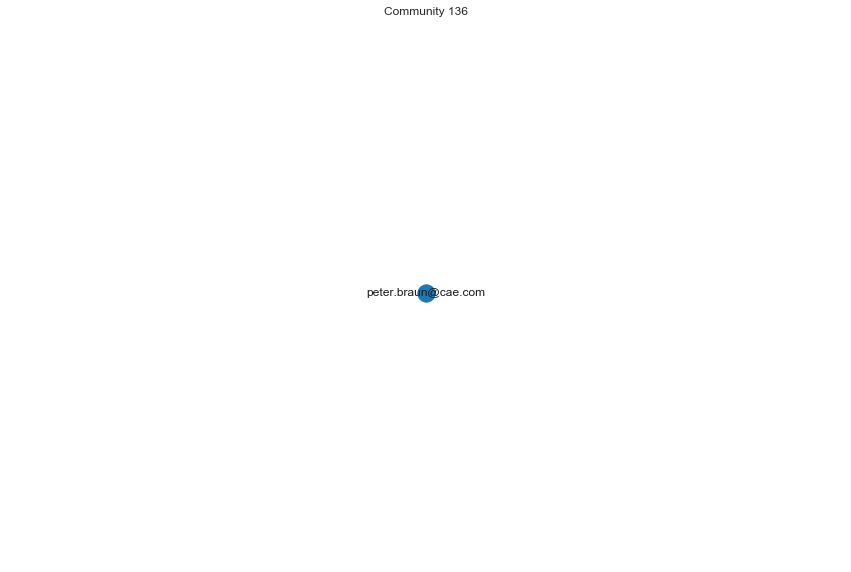

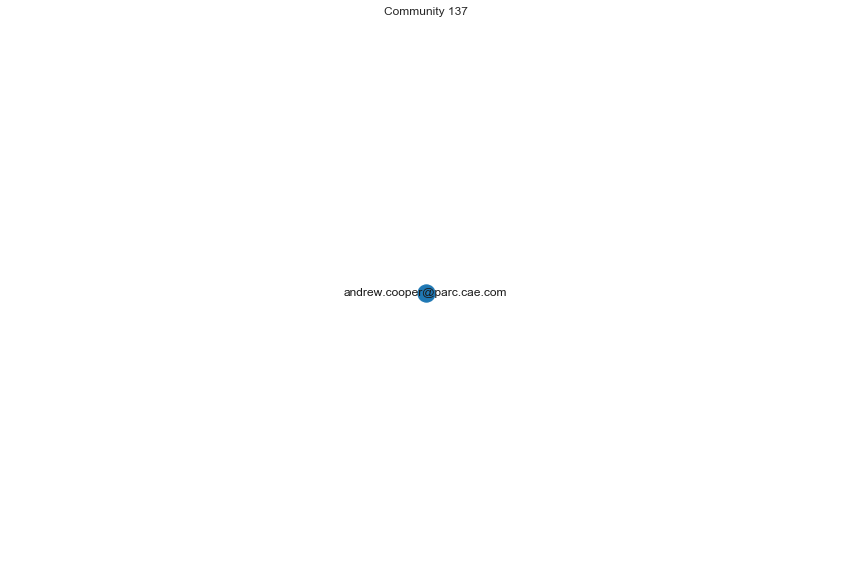

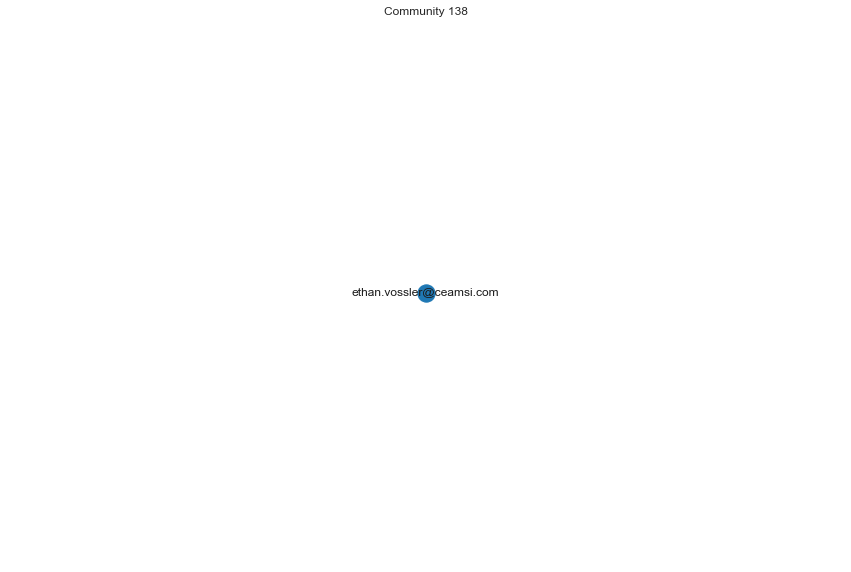

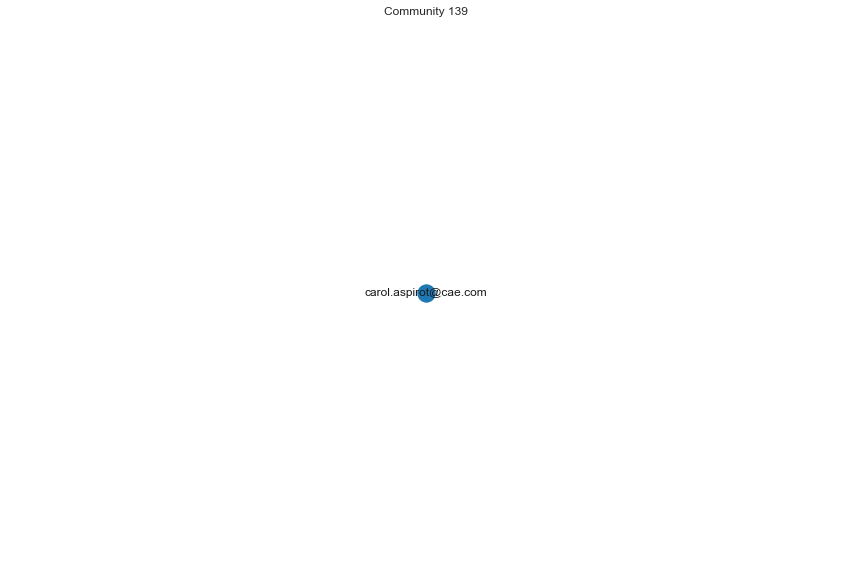

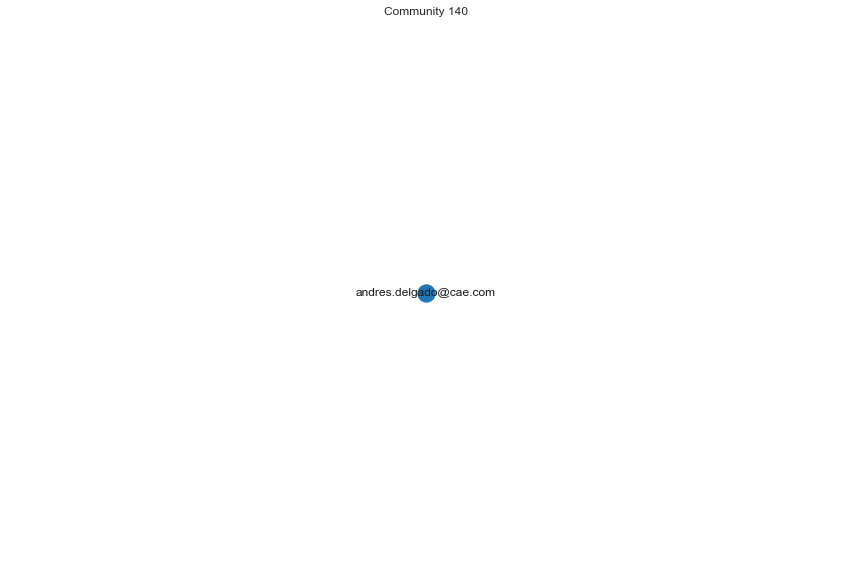

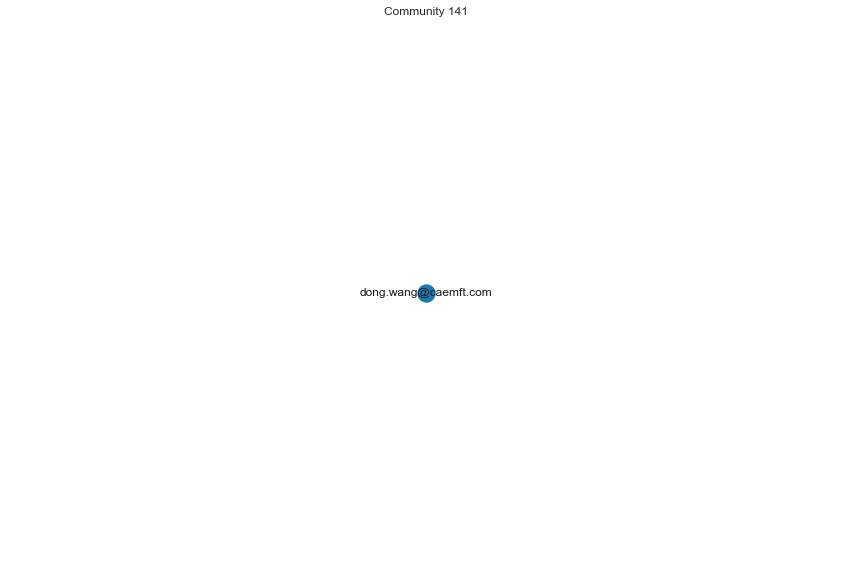

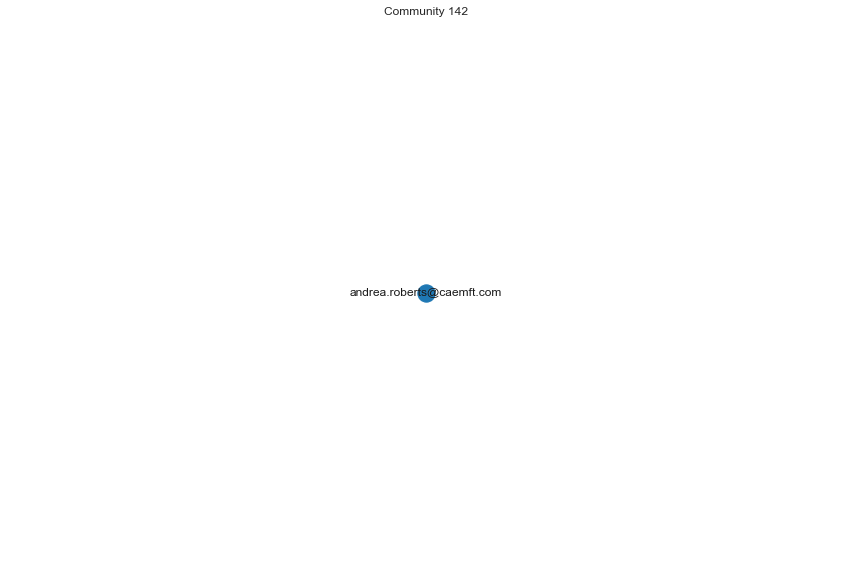

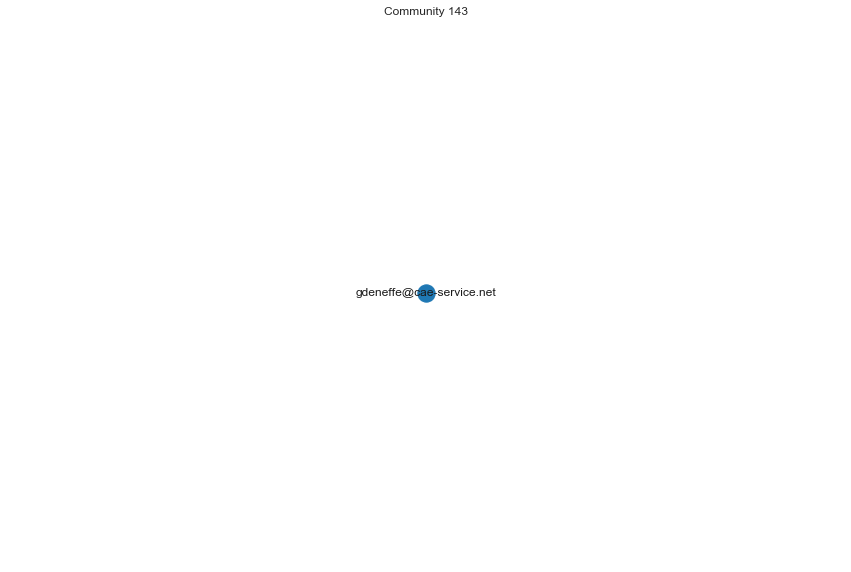

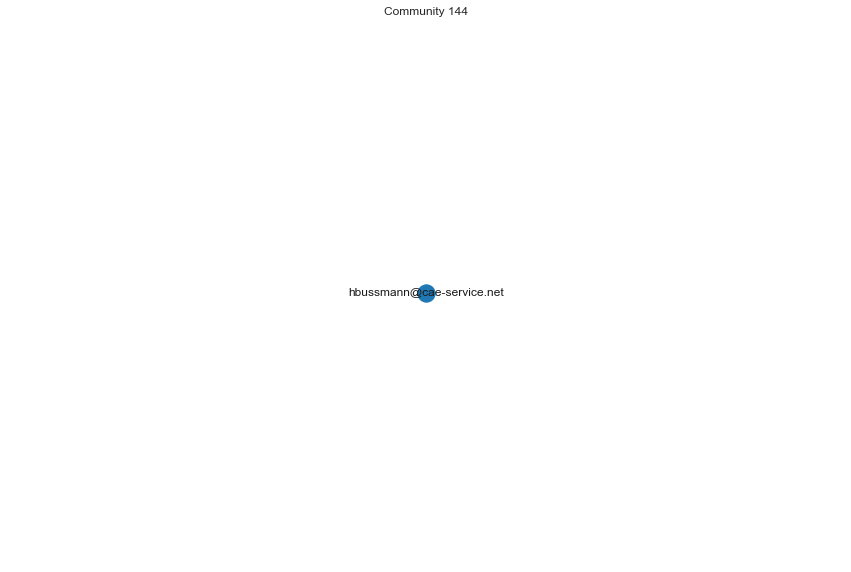

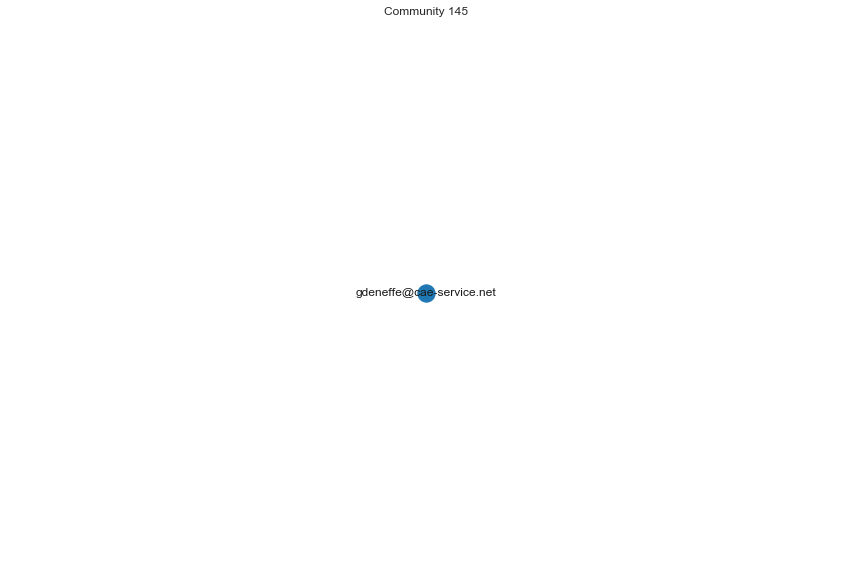

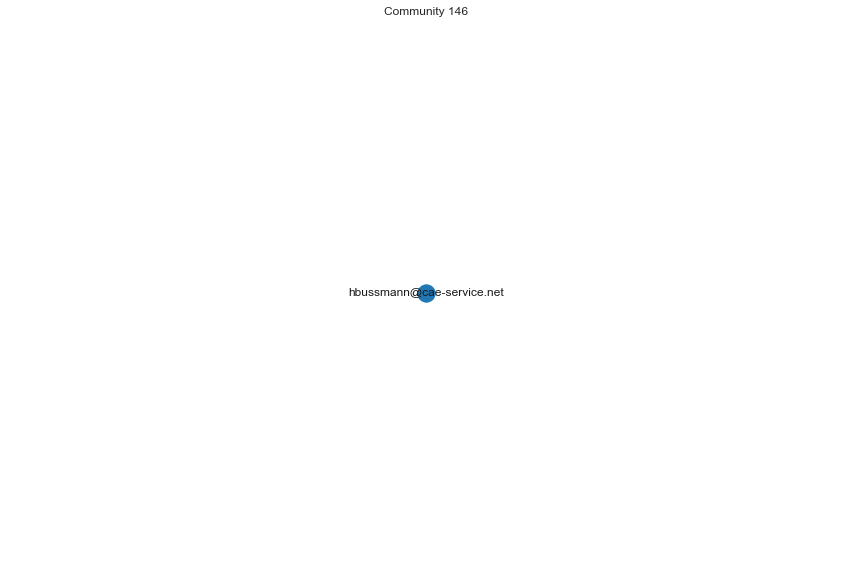

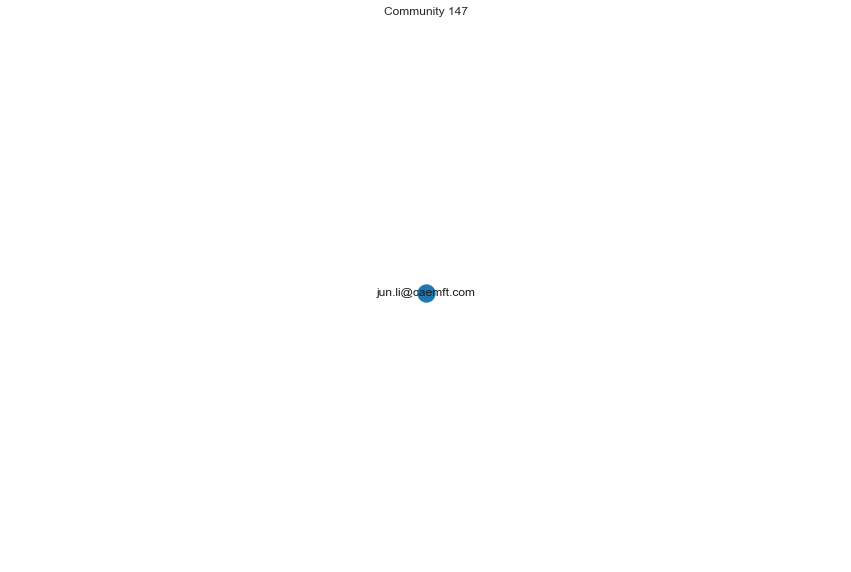

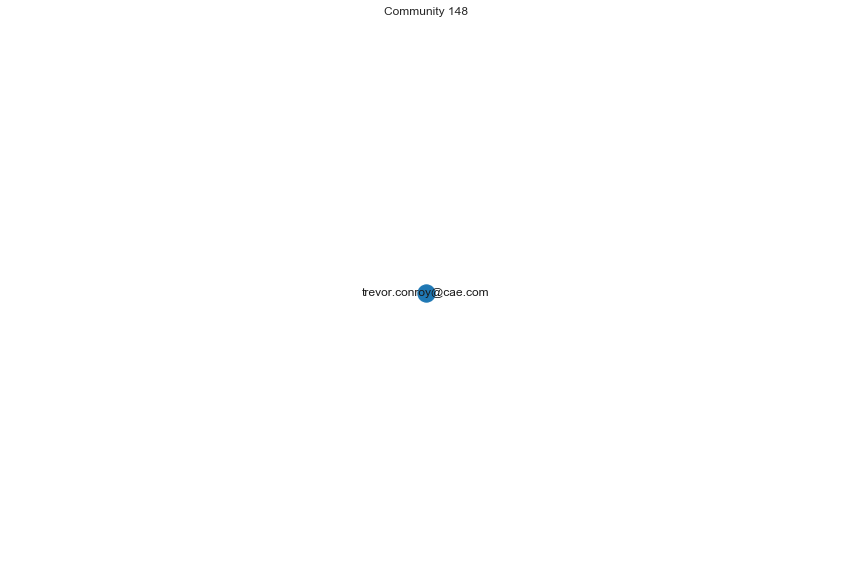

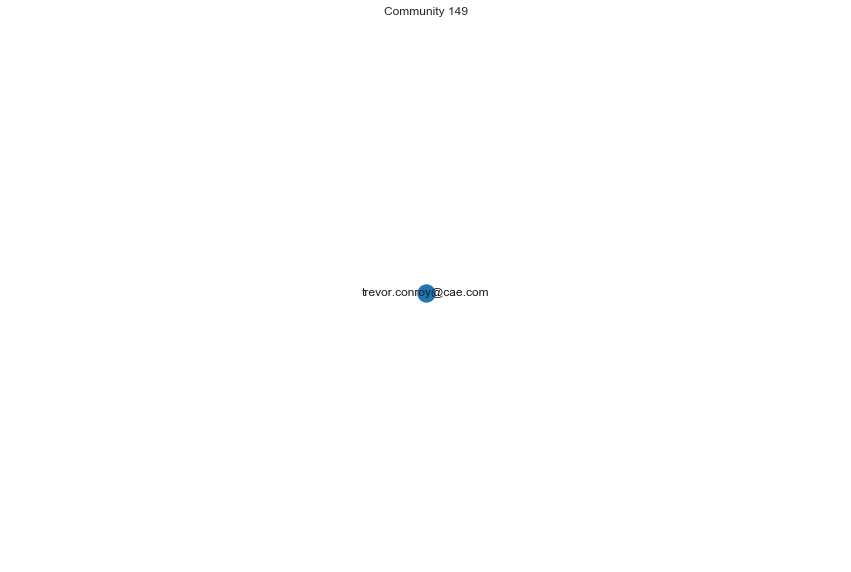

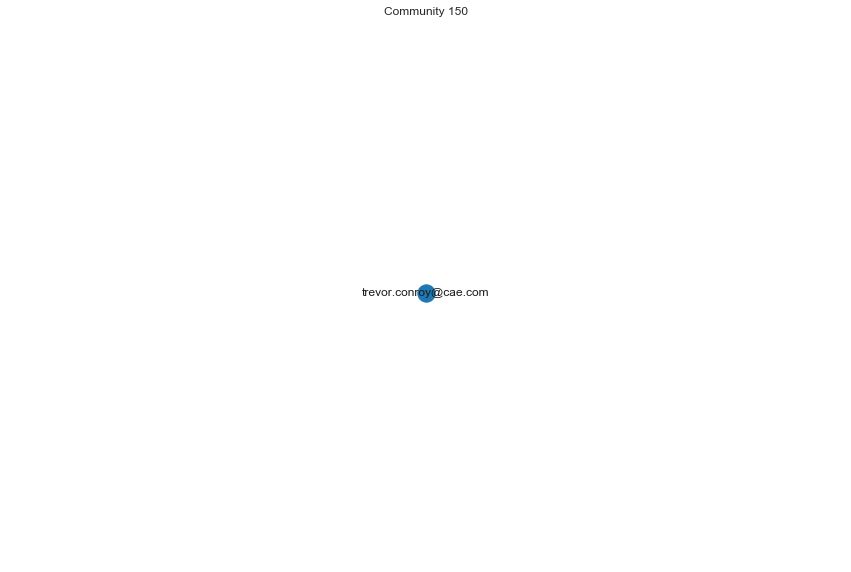

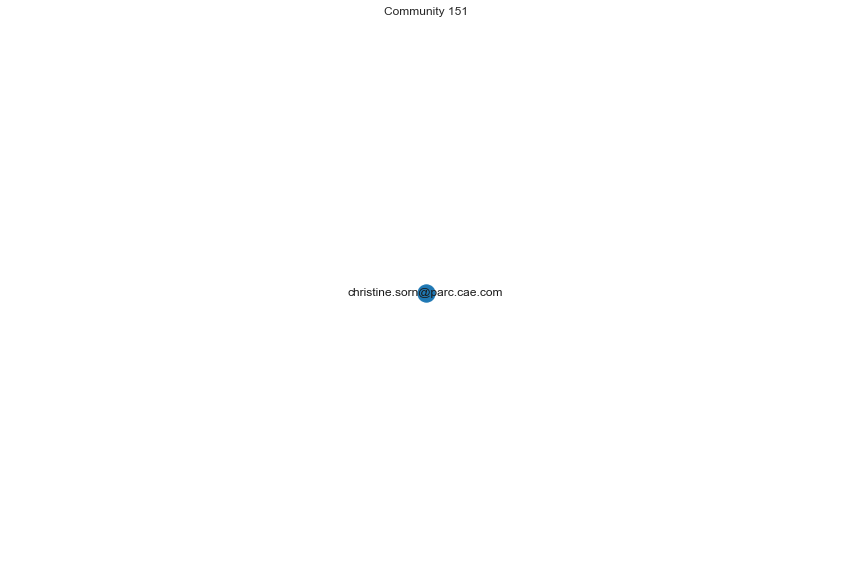

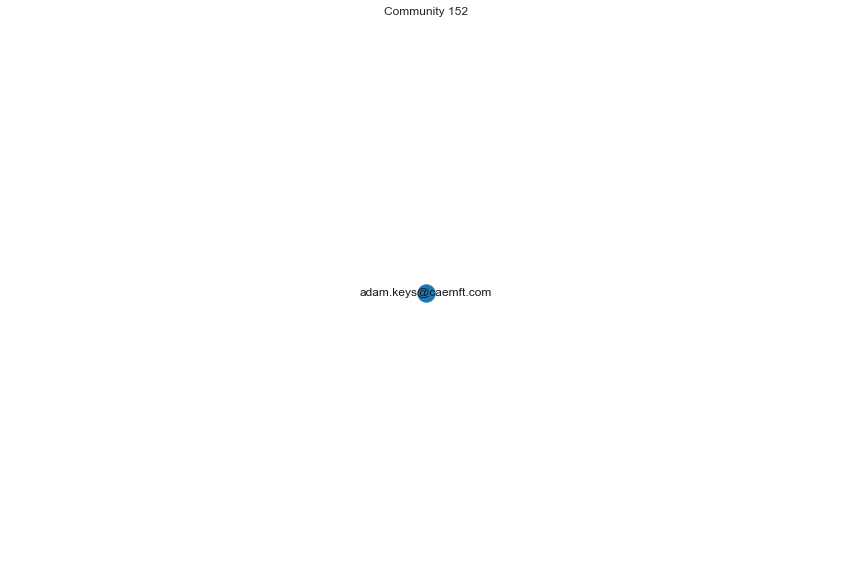

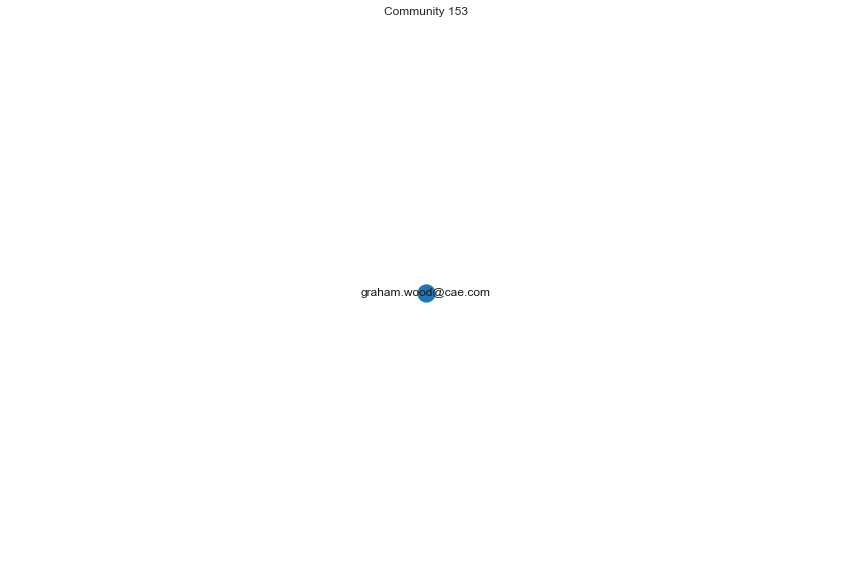

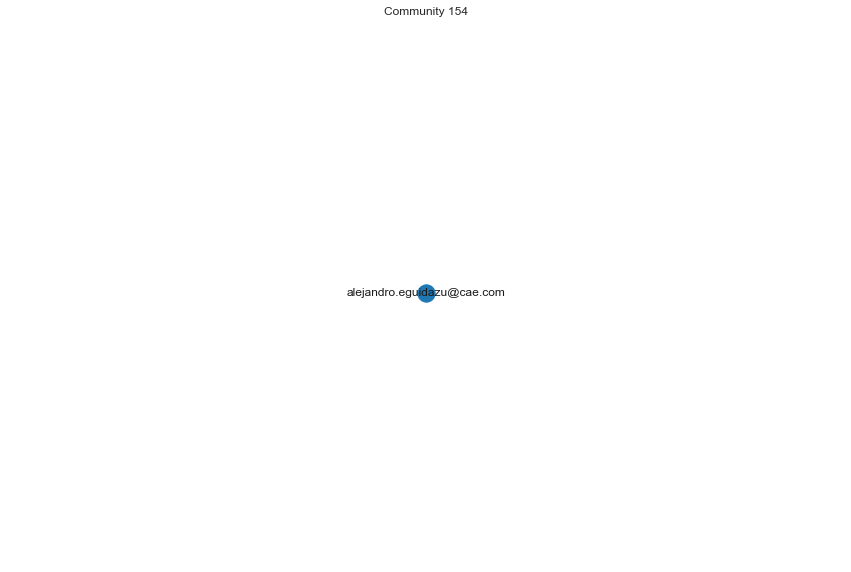

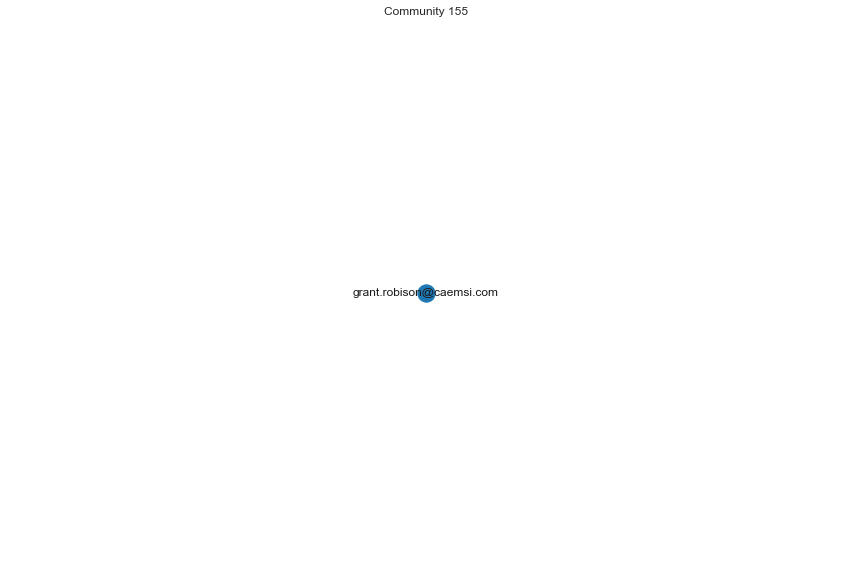

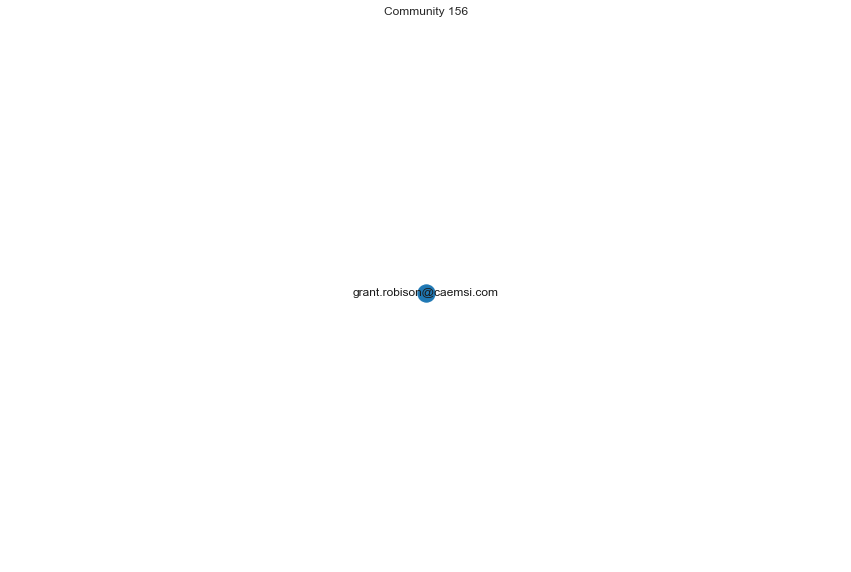

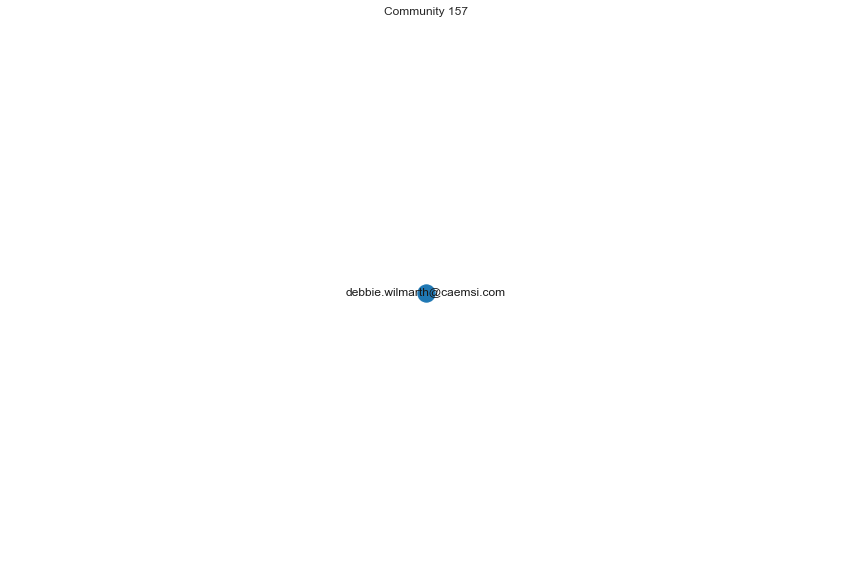

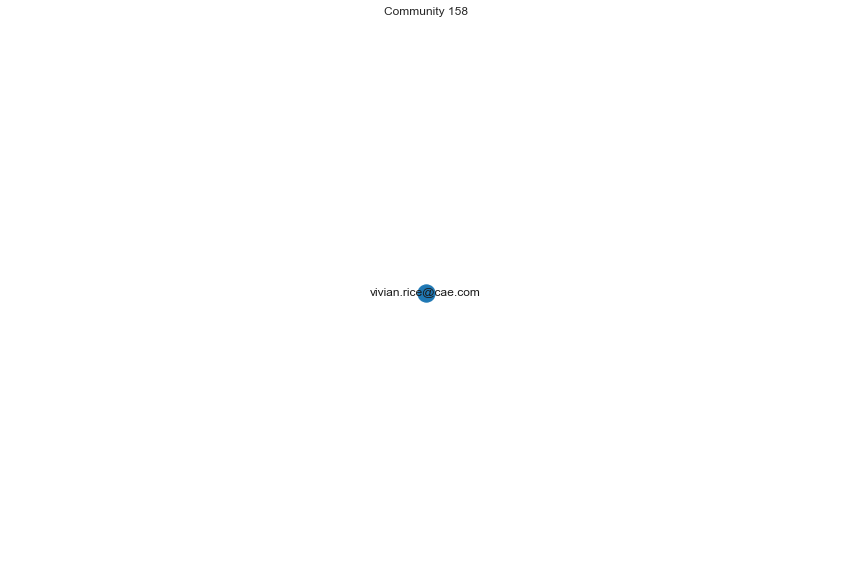

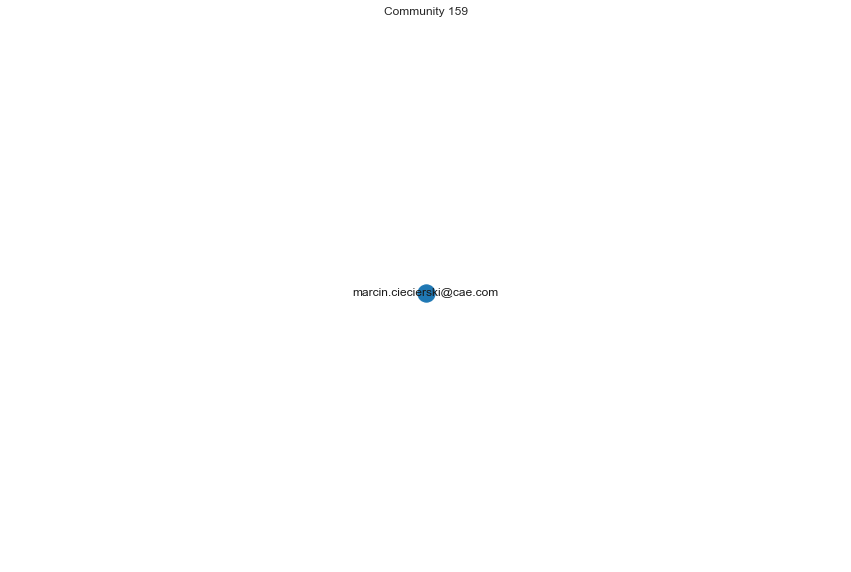

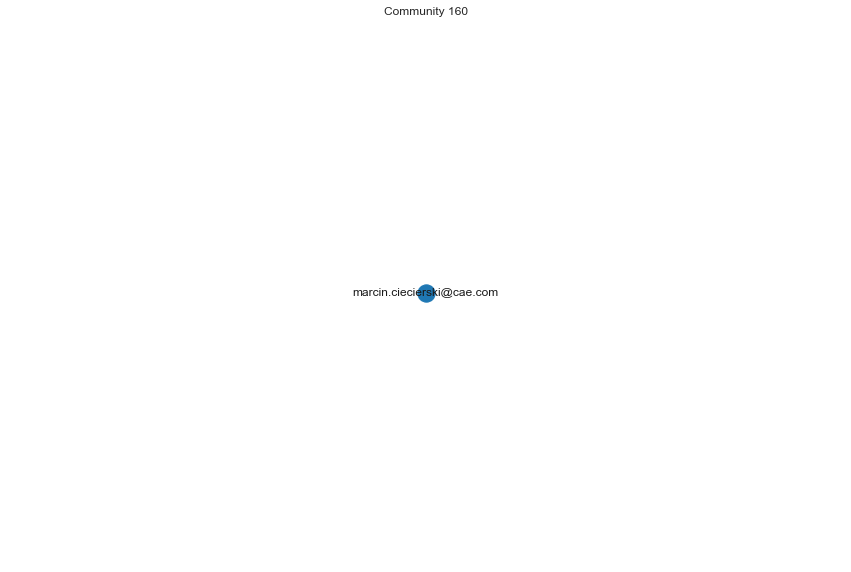

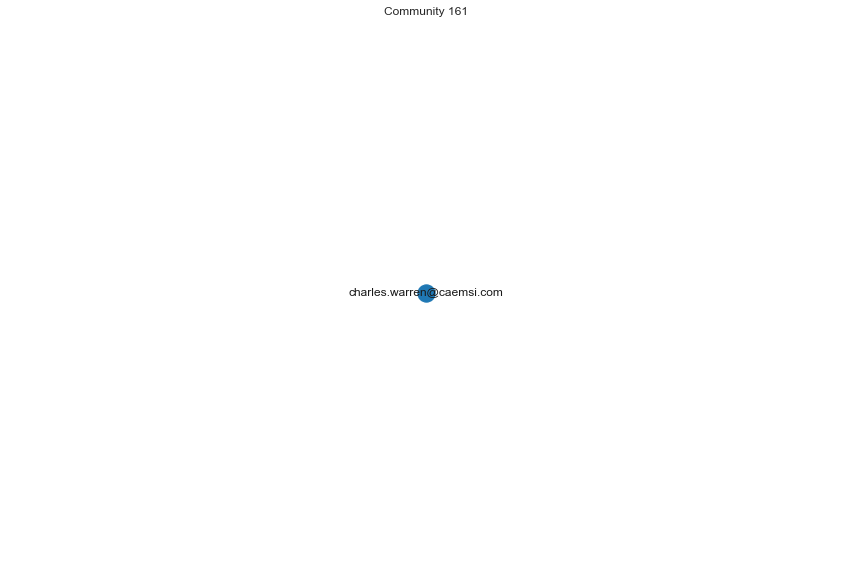

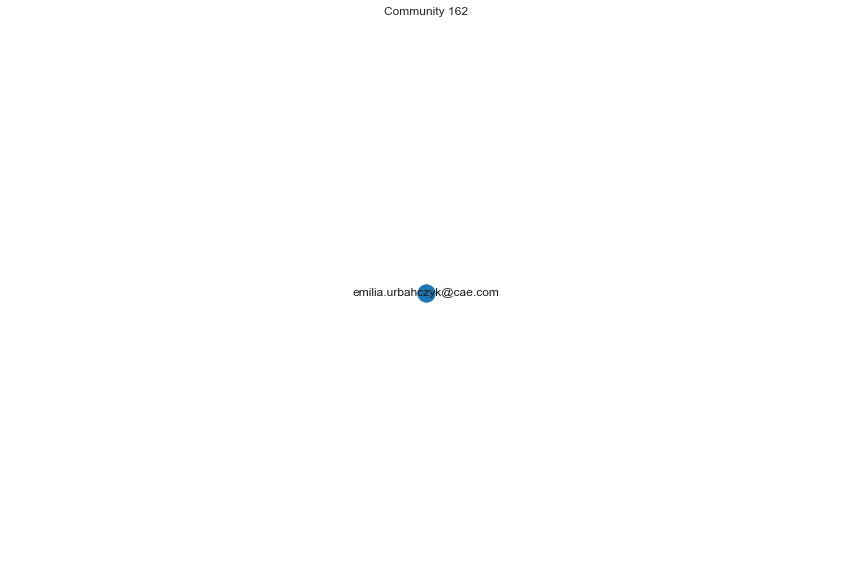

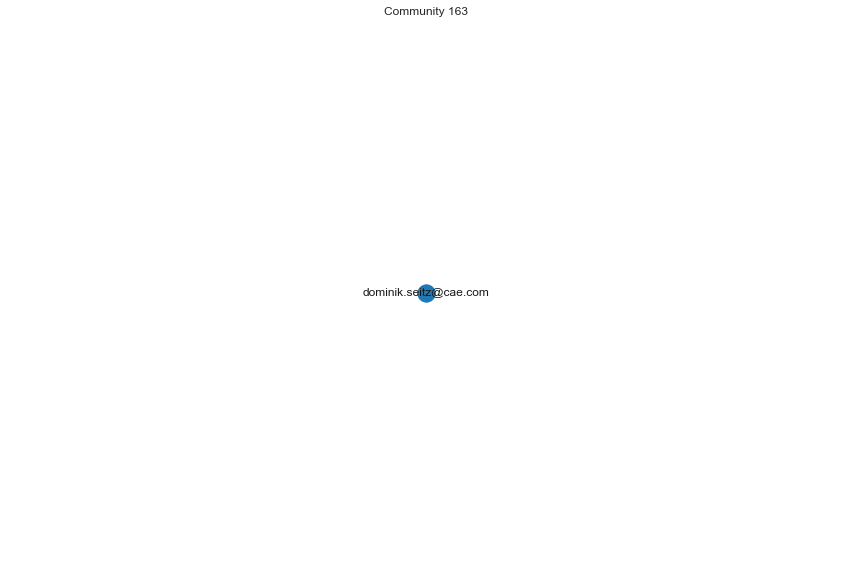

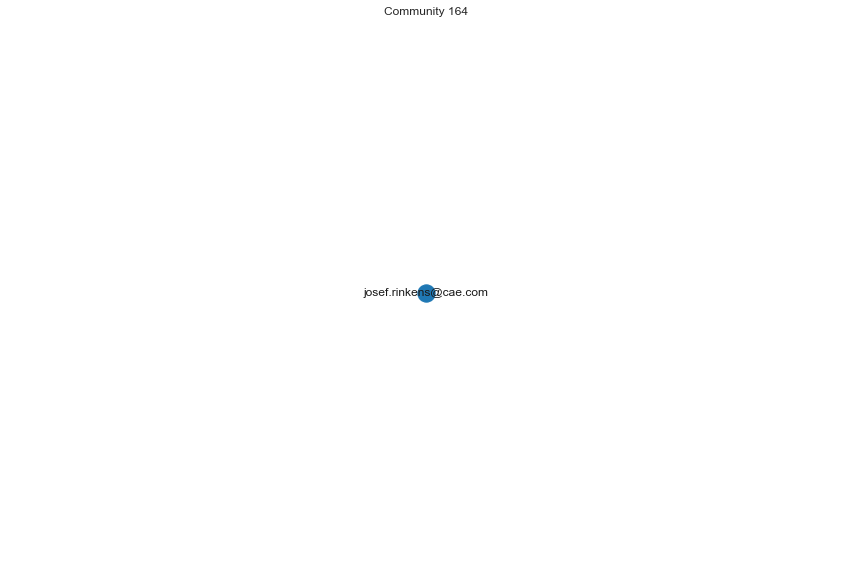

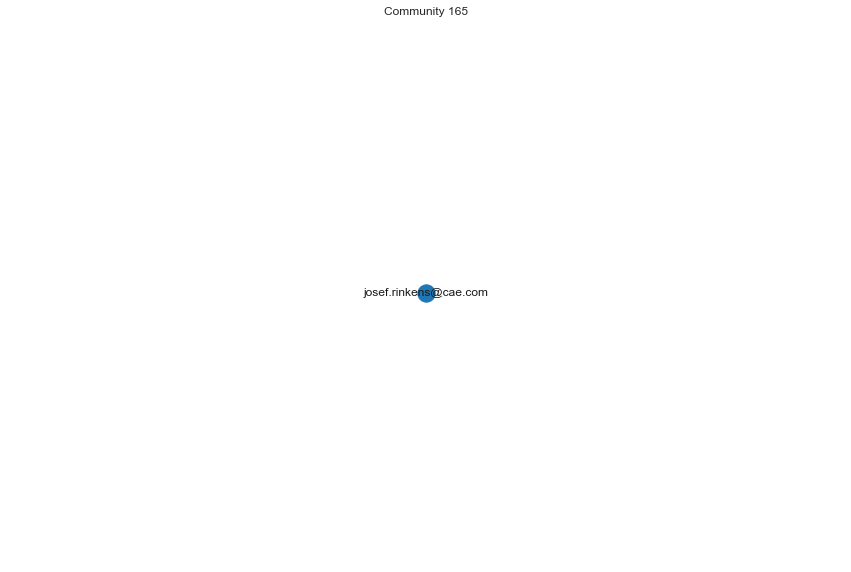

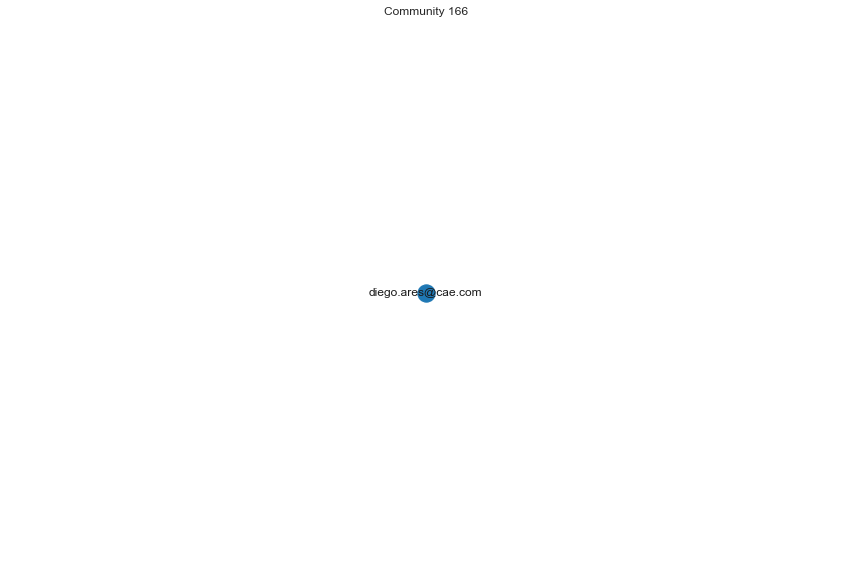

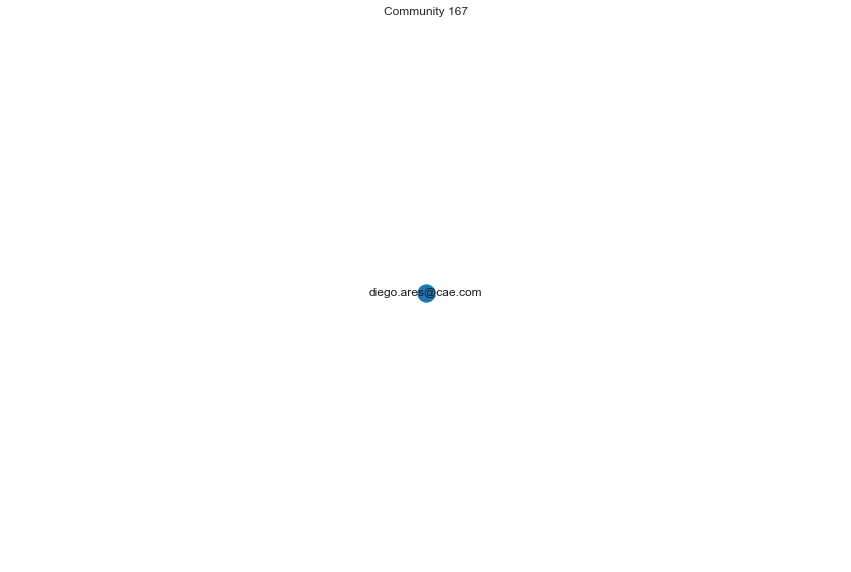

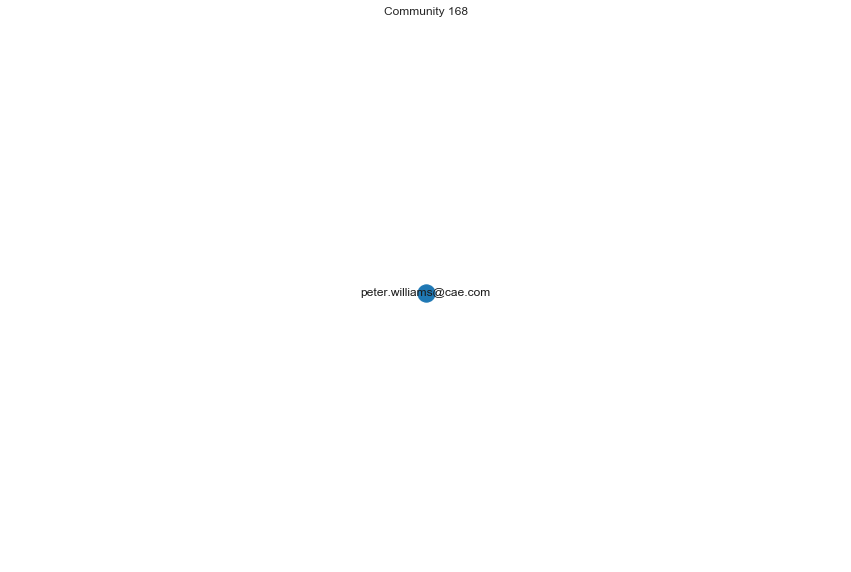

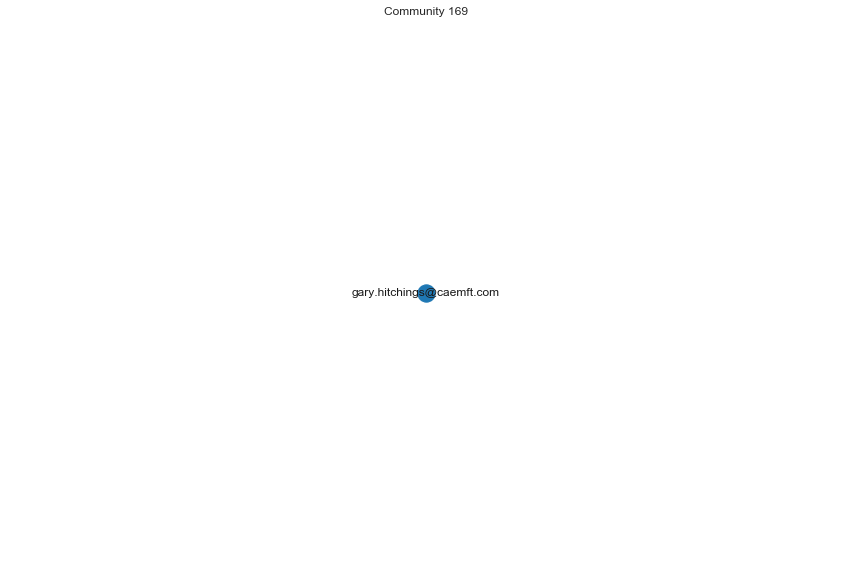

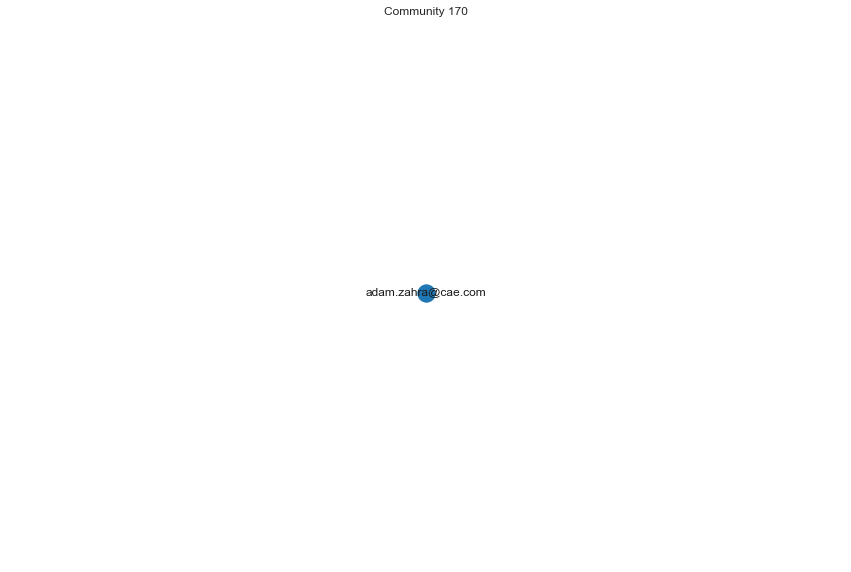

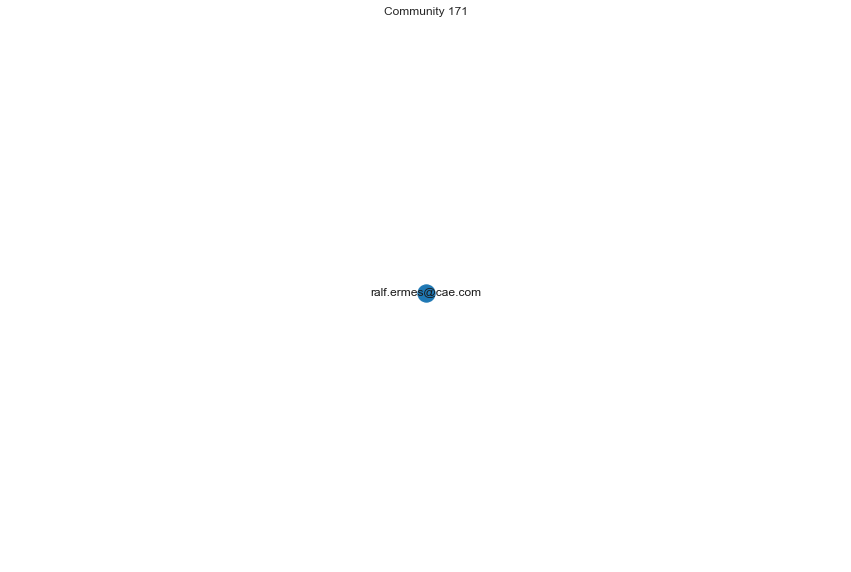

In [33]:
pos = nx.spring_layout(G)  # compute graph layout
for cmt_num in np.unique([v for c,v in cmt.items()]):
    partition = community.best_partition(G)

    nodelist = []
    # one community against the others
    for node, c in partition.items():
        if c == cmt_num:
            nodelist.append(node)
        else:
            partition[node] = -1  # put all the other communities in one communitiy
    
    sg = G.subgraph(nodelist)
   # edge_widths = [sg.edges[e]['Weight'] for e in sg.edges]
   # edge_widths = [w/np.quantile(edge_widths, 0.9) for w in edge_widths]
    
    fig, ax = plt.subplots(figsize=(15,10))
    nx.draw(sg, pos, with_labels=True) #, width=edge_widths)
    ax.set_title(f'Community {cmt_num}');